In [ ]:
# Importaciones y preparaciones previas
!pip install umap-learn

import os
import time
import torch
import random
import numpy as np
import pandas as pd
import seaborn as sns
import umap.umap_ as umap
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import sys
from sklearn.manifold import TSNE
from torch import Tensor
from typing import Type
import torch.nn.init as init
from google.colab import drive
drive.mount('/content/drive')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.7 MB/s eta 0:00:00
Mounted at /content/drive


100%|██████████| 170M/170M [00:18<00:00, 9.18MB/s]


Extracting ./cifar10/cifar-10-python.tar.gz to ./cifar10
Files already downloaded and verified
ResNet110_SD(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_sta

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Iteración 35 - Lote 35/352 - Pérdida de Entrenamiento: 4.9637, Precisión de Entrenamiento: 0.1047
Iteración 70 - Lote 70/352 - Pérdida de Entrenamiento: 3.8782, Precisión de Entrenamiento: 0.1085
Iteración 105 - Lote 105/352 - Pérdida de Entrenamiento: 3.4000, Precisión de Entrenamiento: 0.1070
Iteración 140 - Lote 140/352 - Pérdida de Entrenamiento: 3.1515, Precisión de Entrenamiento: 0.1105
Iteración 175 - Lote 175/352 - Pérdida de Entrenamiento: 2.9884, Precisión de Entrenamiento: 0.1128
Iteración 210 - Lote 210/352 - Pérdida de Entrenamiento: 2.8742, Precisión de Entrenamiento: 0.1157
Iteración 245 - Lote 245/352 - Pérdida de Entrenamiento: 2.7901, Precisión de Entrenamiento: 0.1196
Iteración 280 - Lote 280/352 - Pérdida de Entrenamiento: 2.7193, Precisión de Entrenamiento: 0.1249
Iteración 315 - Lote 315/352 - Pérdida de Entrenamiento: 2.6551, Precisión de Entrenamiento: 0.1333
Iteración 350 - Lote 350/352 - Pérdida de Entrenamiento: 2.5964, Precisión de Entrenamiento: 0.1397
Tiem

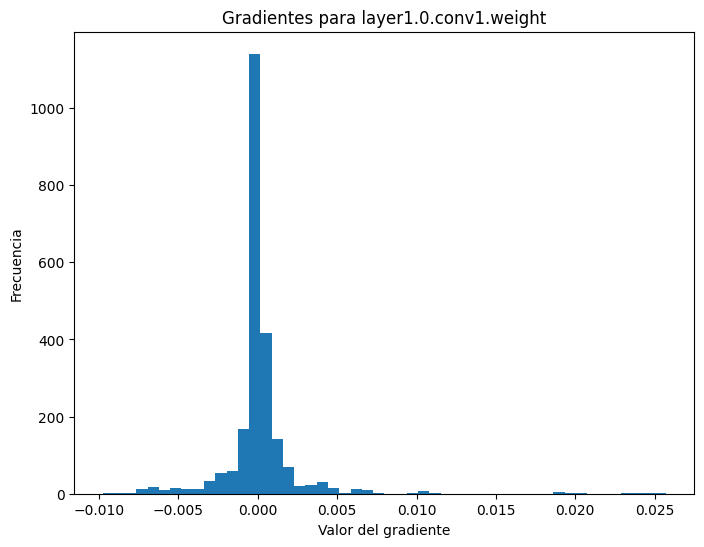

Gradientes para layer1.0.bn1.weight: min=-0.01875697635114193, max=0.02070355974137783, mean=0.0005953582003712654, std=0.008032713085412979


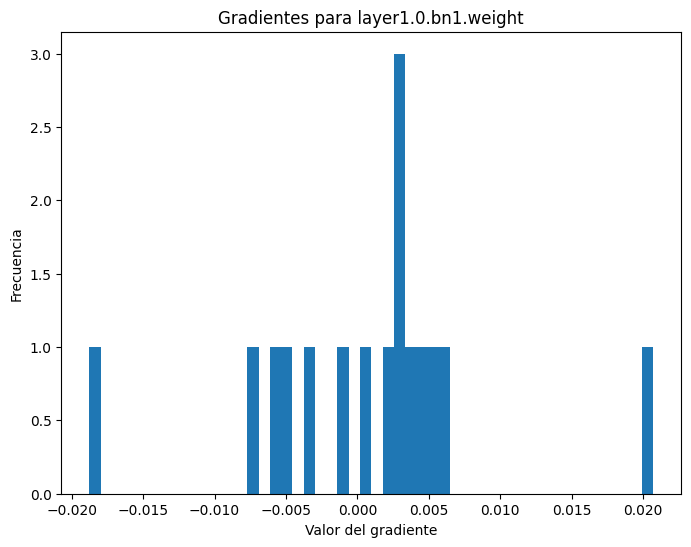

Gradientes para layer1.0.bn1.bias: min=-0.0208427757024765, max=0.02606261521577835, mean=-0.0015229552518576384, std=0.01200074516236782


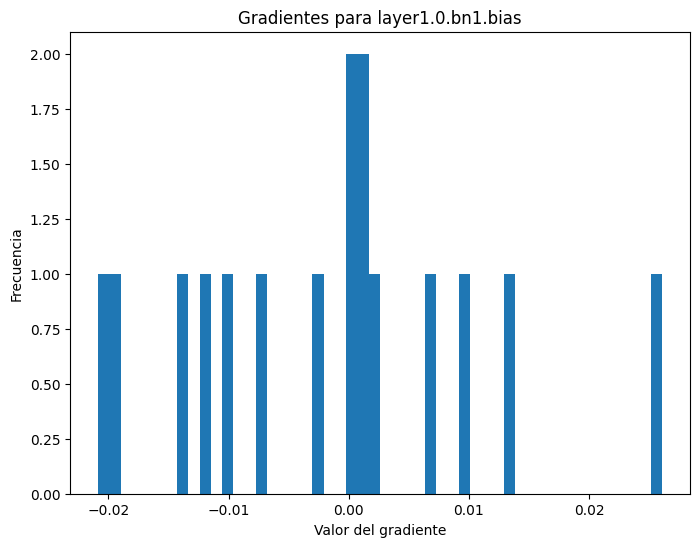

Gradientes para linear.weight: min=-0.1514715701341629, max=0.1297779083251953, mean=0.0, std=0.01563945598900318


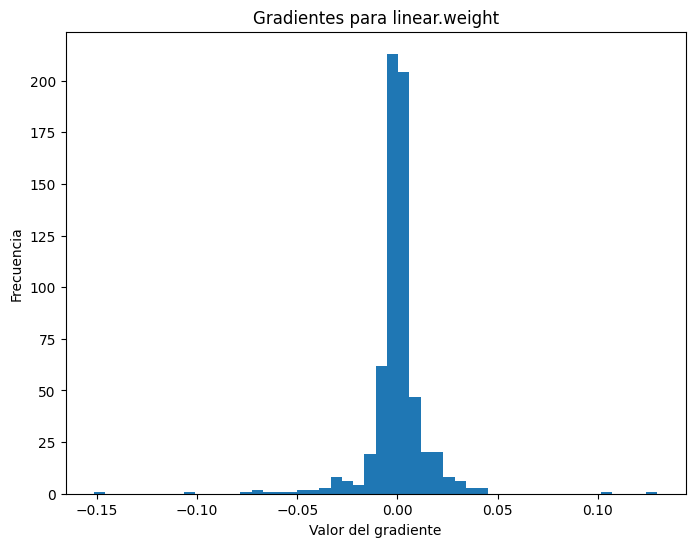

Gradientes para linear.bias: min=-0.029059631749987602, max=0.06312297284603119, mean=5.587935669737476e-10, std=0.026796549558639526


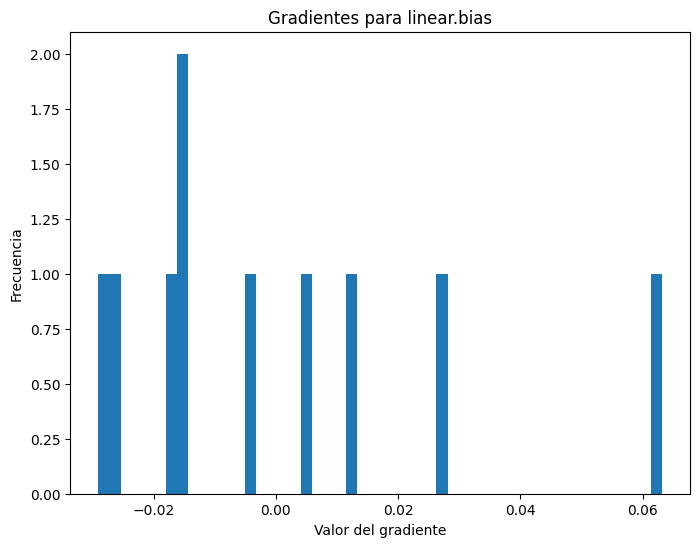

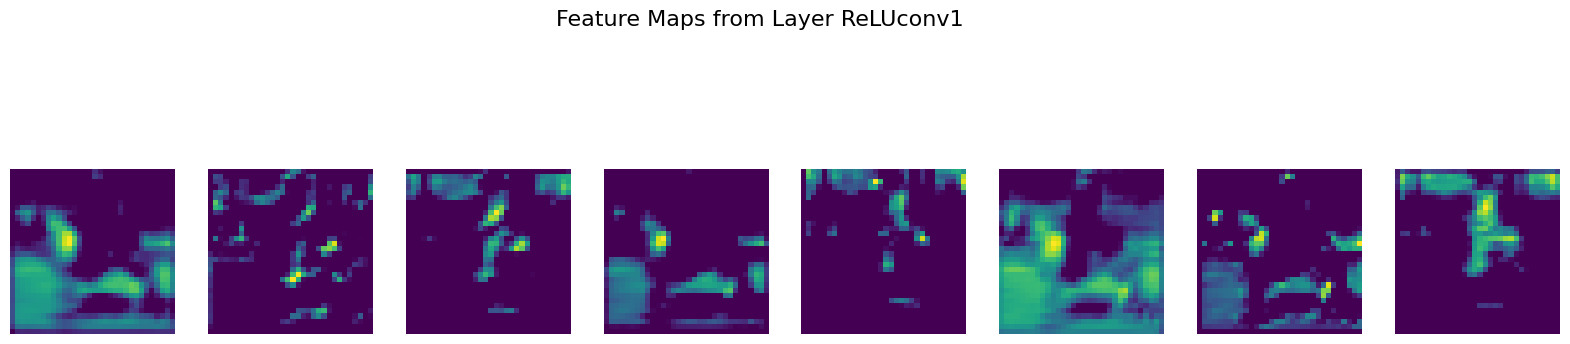

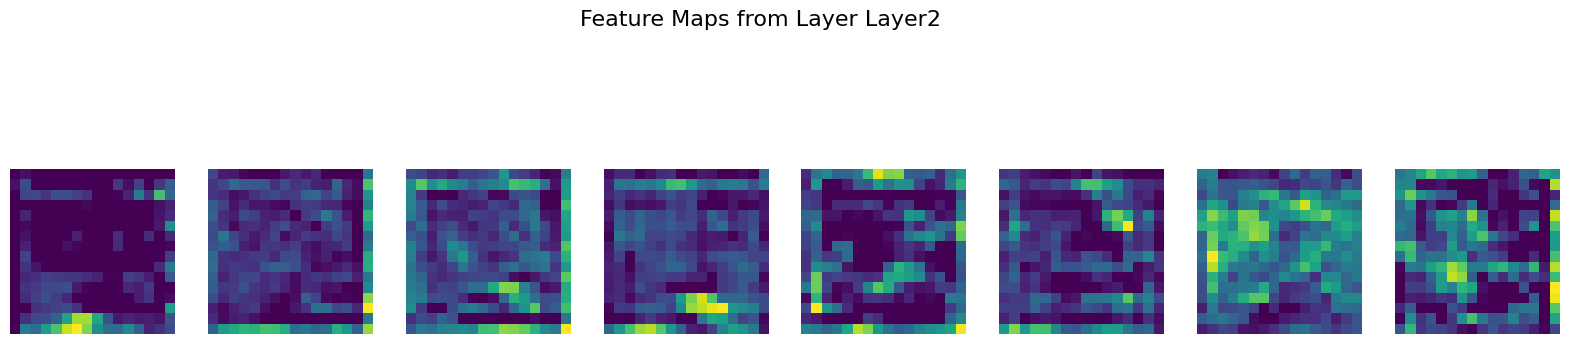

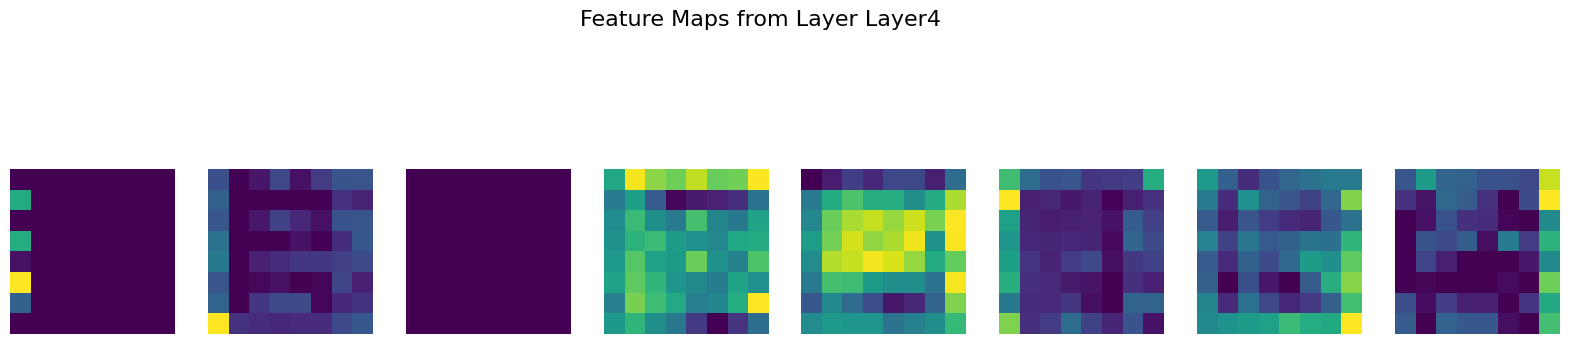

0.04
Epoch 2/70
Iteración 387 - Lote 35/352 - Pérdida de Entrenamiento: 1.9912, Precisión de Entrenamiento: 0.2275
Iteración 422 - Lote 70/352 - Pérdida de Entrenamiento: 1.9794, Precisión de Entrenamiento: 0.2350
Iteración 457 - Lote 105/352 - Pérdida de Entrenamiento: 1.9573, Precisión de Entrenamiento: 0.2447
Iteración 492 - Lote 140/352 - Pérdida de Entrenamiento: 1.9354, Precisión de Entrenamiento: 0.2544
Iteración 527 - Lote 175/352 - Pérdida de Entrenamiento: 1.9196, Precisión de Entrenamiento: 0.2605
Iteración 562 - Lote 210/352 - Pérdida de Entrenamiento: 1.9046, Precisión de Entrenamiento: 0.2662
Iteración 597 - Lote 245/352 - Pérdida de Entrenamiento: 1.8918, Precisión de Entrenamiento: 0.2715
Iteración 632 - Lote 280/352 - Pérdida de Entrenamiento: 1.8815, Precisión de Entrenamiento: 0.2780
Iteración 667 - Lote 315/352 - Pérdida de Entrenamiento: 1.8708, Precisión de Entrenamiento: 0.2831
Iteración 702 - Lote 350/352 - Pérdida de Entrenamiento: 1.8633, Precisión de Entrenam

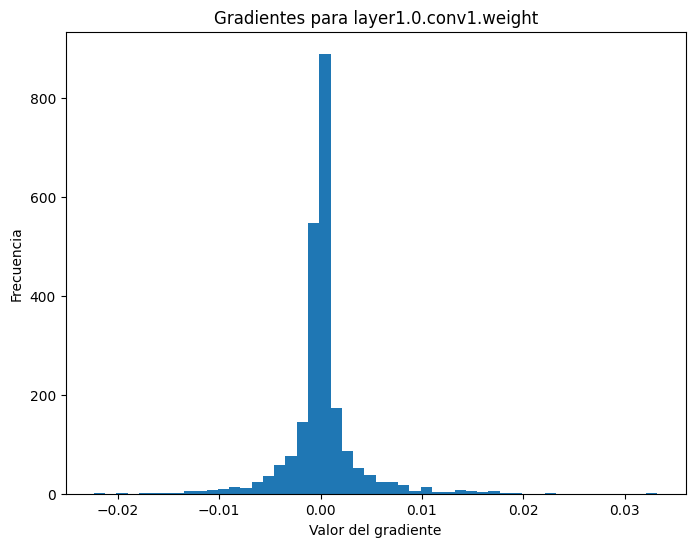

Gradientes para layer1.0.bn1.weight: min=-0.010147184133529663, max=0.011101419106125832, mean=-0.00020917138317599893, std=0.005655061919242144


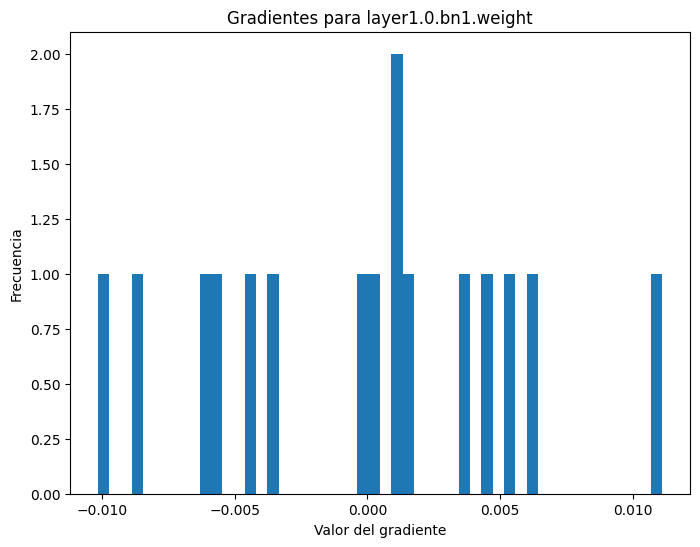

Gradientes para layer1.0.bn1.bias: min=-0.01190493069589138, max=0.00826641172170639, mean=-0.0020925479475408792, std=0.005182928871363401


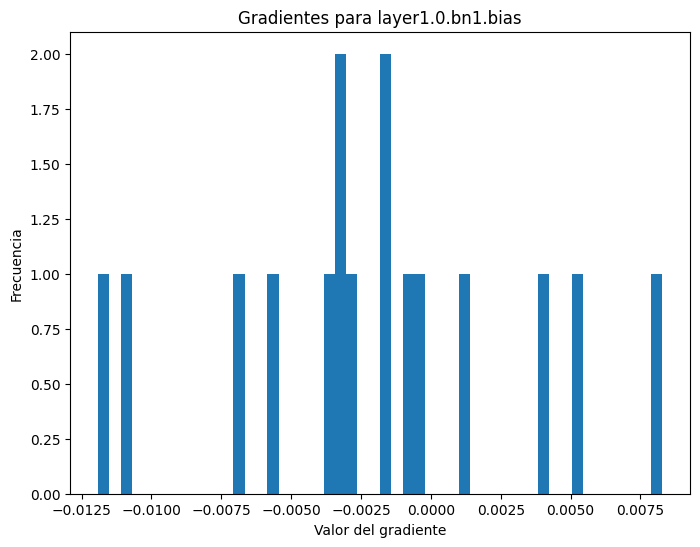

Gradientes para layer2.8.conv1.weight: min=-0.010707656852900982, max=0.007926429621875286, mean=0.00013274294906295836, std=0.001569959451444447


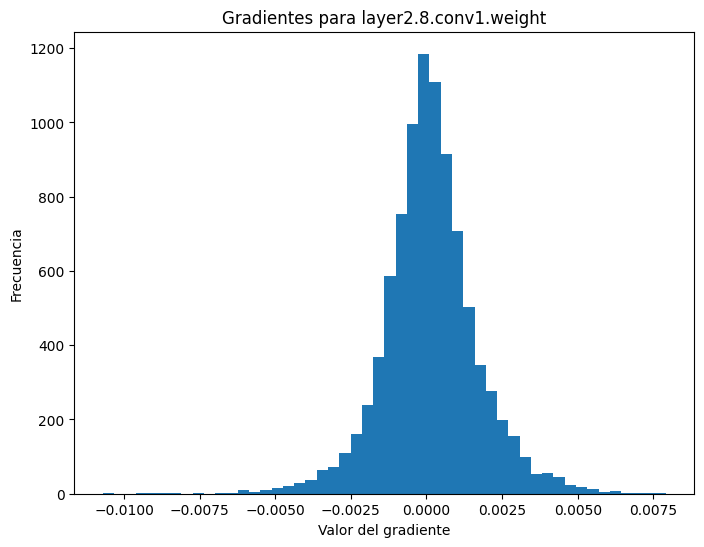

Gradientes para layer2.8.bn1.weight: min=-0.00929945893585682, max=0.007873132824897766, mean=9.66656079981476e-06, std=0.0032782747875899076


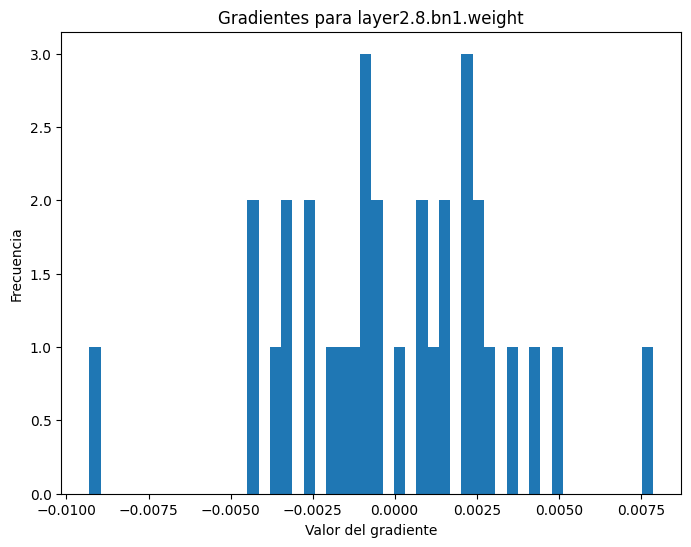

Gradientes para layer2.8.bn1.bias: min=-0.00650652963668108, max=0.008055126294493675, mean=-3.9690989069640636e-05, std=0.00262251915410161


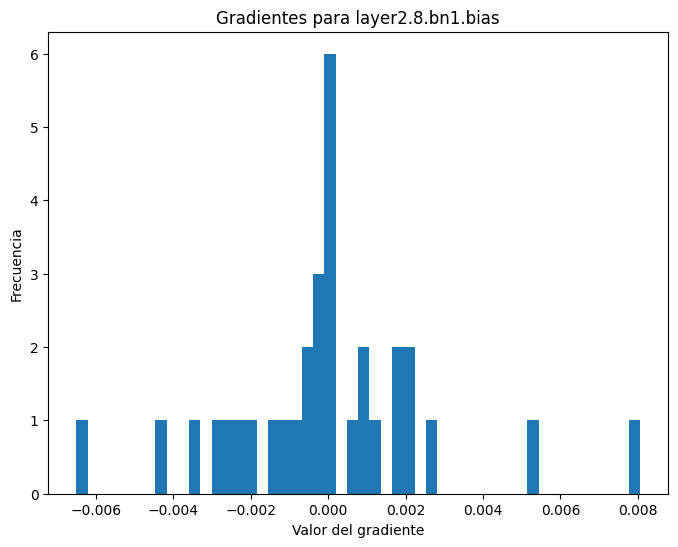

Gradientes para linear.weight: min=-0.14648395776748657, max=0.11622076481580734, mean=5.587935669737476e-10, std=0.023876914754509926


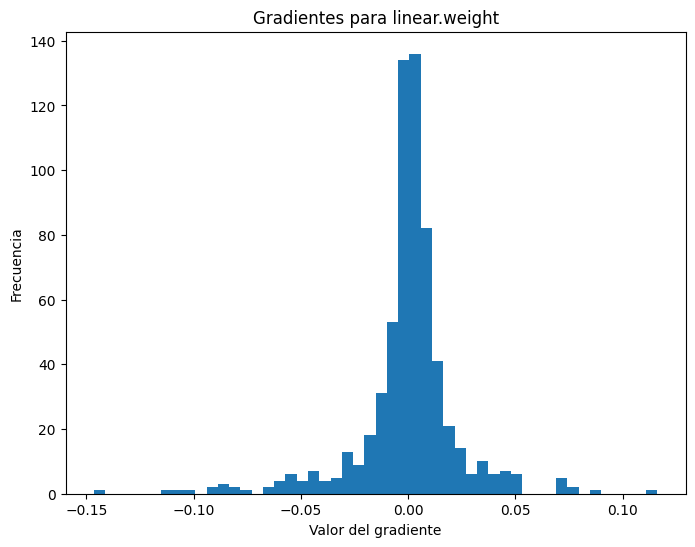

Gradientes para linear.bias: min=-0.06358207762241364, max=0.049165599048137665, mean=-9.778886589373315e-10, std=0.030411817133426666


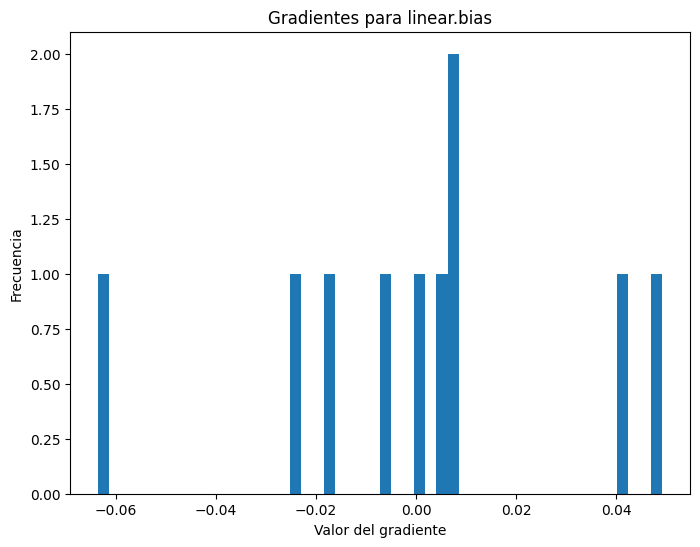

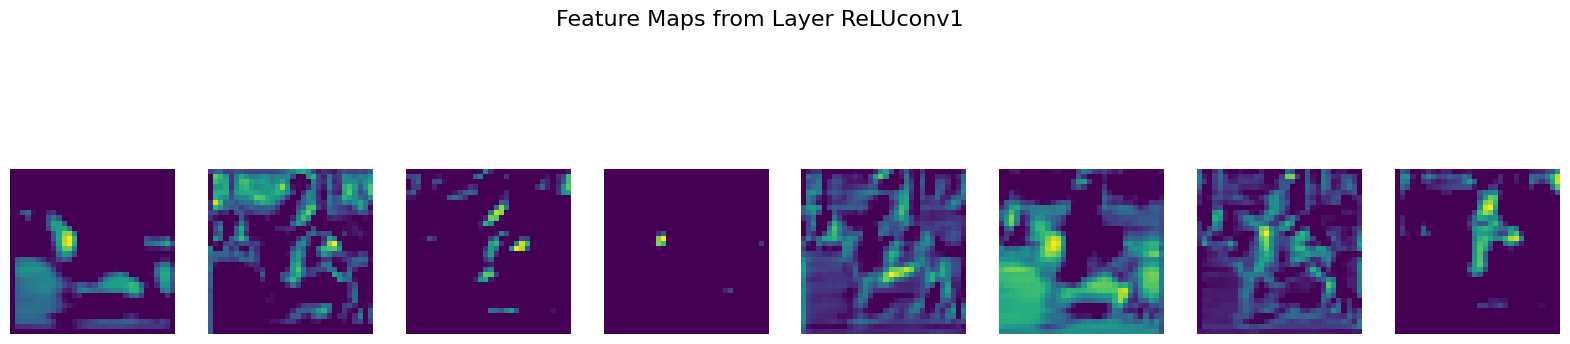

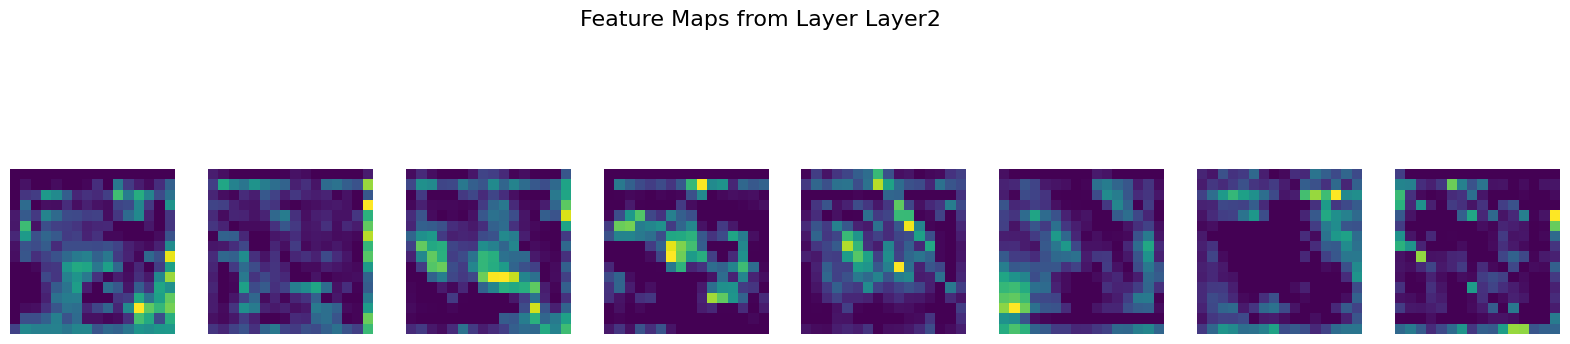

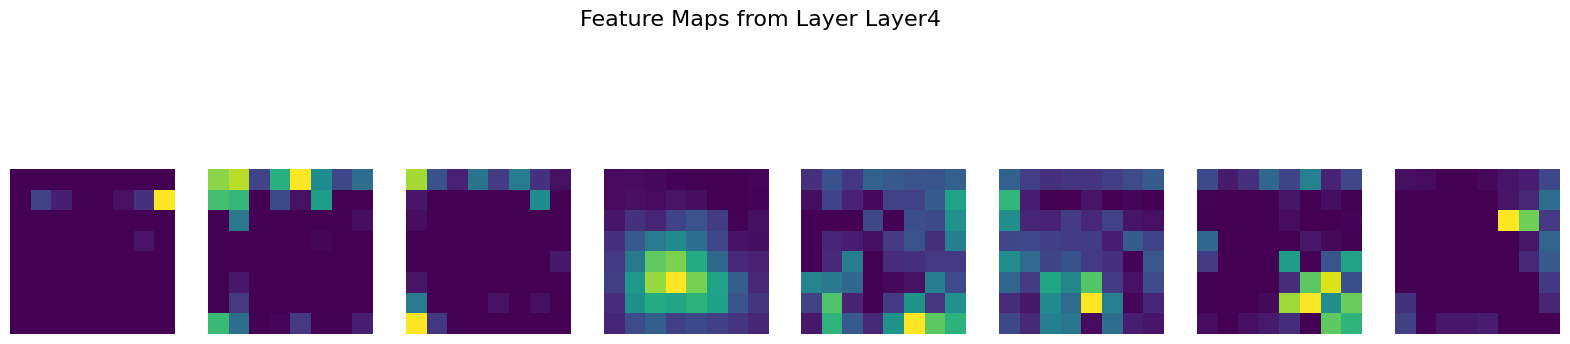

0.04
Epoch 6/70
Iteración 1795 - Lote 35/352 - Pérdida de Entrenamiento: 1.2173, Precisión de Entrenamiento: 0.5549
Iteración 1830 - Lote 70/352 - Pérdida de Entrenamiento: 1.2156, Precisión de Entrenamiento: 0.5608
Iteración 1865 - Lote 105/352 - Pérdida de Entrenamiento: 1.2088, Precisión de Entrenamiento: 0.5621
Iteración 1900 - Lote 140/352 - Pérdida de Entrenamiento: 1.2024, Precisión de Entrenamiento: 0.5674
Iteración 1935 - Lote 175/352 - Pérdida de Entrenamiento: 1.1919, Precisión de Entrenamiento: 0.5702
Iteración 1970 - Lote 210/352 - Pérdida de Entrenamiento: 1.1836, Precisión de Entrenamiento: 0.5729
Iteración 2005 - Lote 245/352 - Pérdida de Entrenamiento: 1.1771, Precisión de Entrenamiento: 0.5746
Iteración 2040 - Lote 280/352 - Pérdida de Entrenamiento: 1.1683, Precisión de Entrenamiento: 0.5779
Iteración 2075 - Lote 315/352 - Pérdida de Entrenamiento: 1.1616, Precisión de Entrenamiento: 0.5808
Iteración 2110 - Lote 350/352 - Pérdida de Entrenamiento: 1.1610, Precisión d

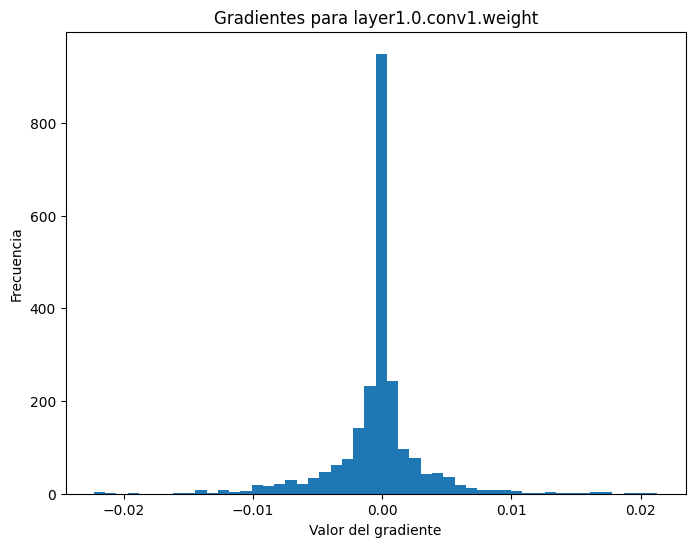

Gradientes para layer1.0.bn1.weight: min=-0.015640931203961372, max=0.02143484726548195, mean=0.0002369010471738875, std=0.008612195961177349


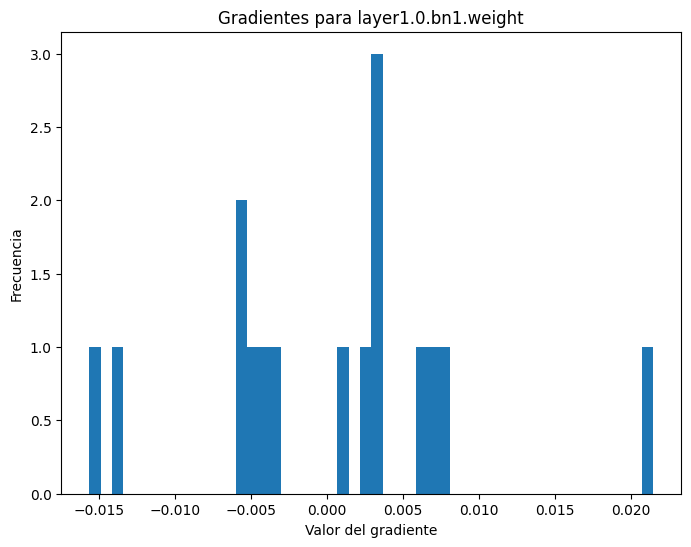

Gradientes para layer1.0.bn1.bias: min=-0.028645027428865433, max=0.03938274085521698, mean=0.002385820960626006, std=0.014767761342227459


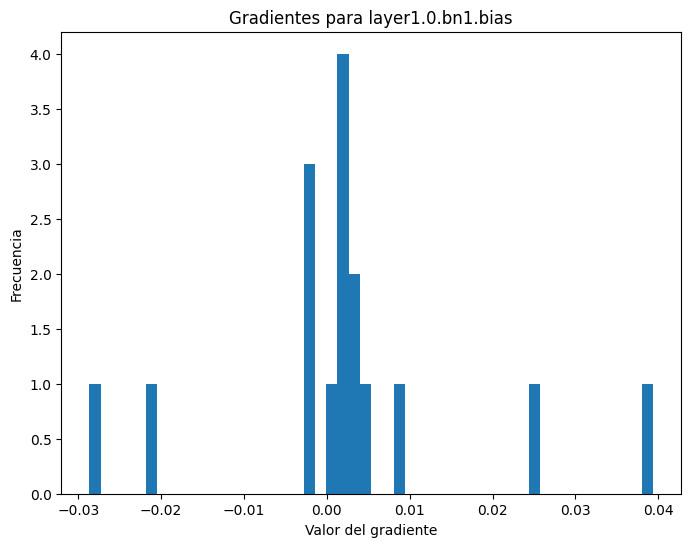

Gradientes para linear.weight: min=-0.05057255178689957, max=0.08054263889789581, mean=-1.8626451769865326e-10, std=0.015204749070107937


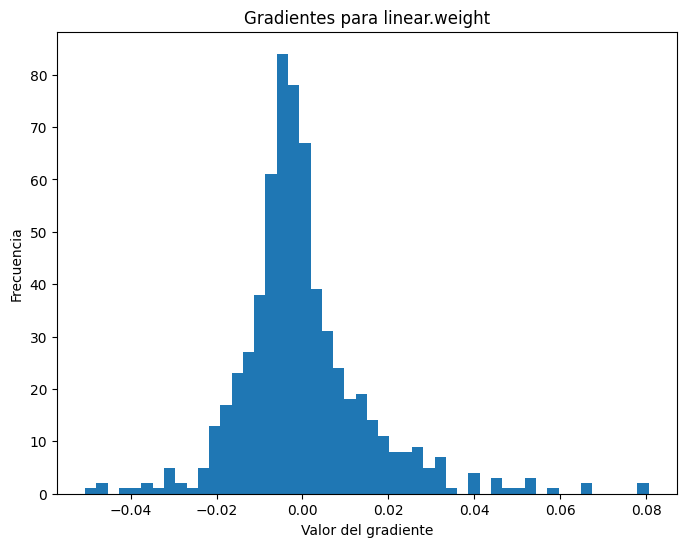

Gradientes para linear.bias: min=-0.019898055121302605, max=0.05470922961831093, mean=-1.8626451769865326e-10, std=0.022689837962388992


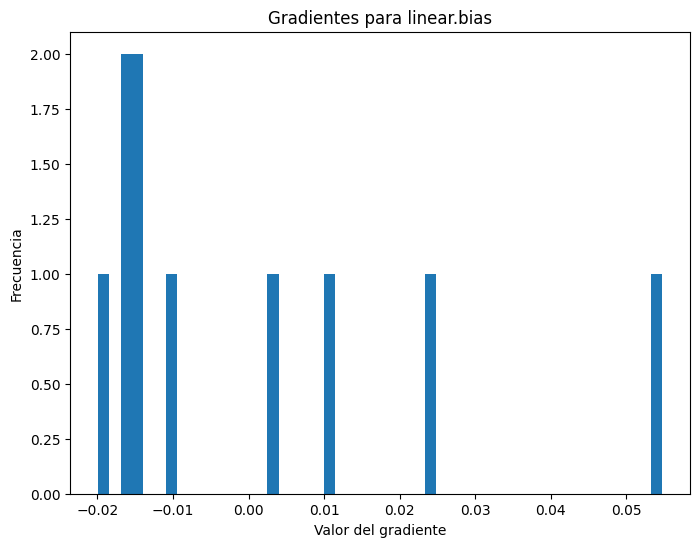

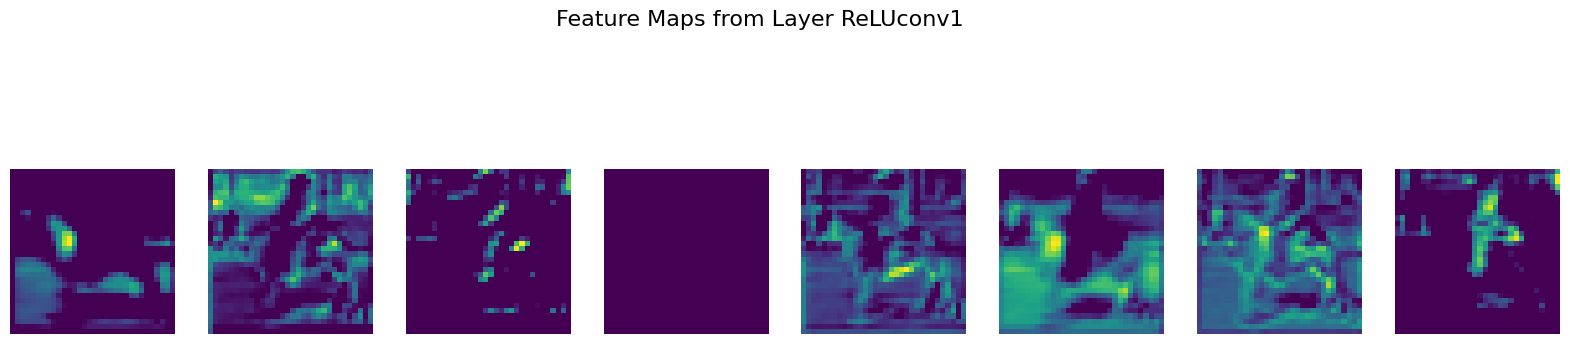

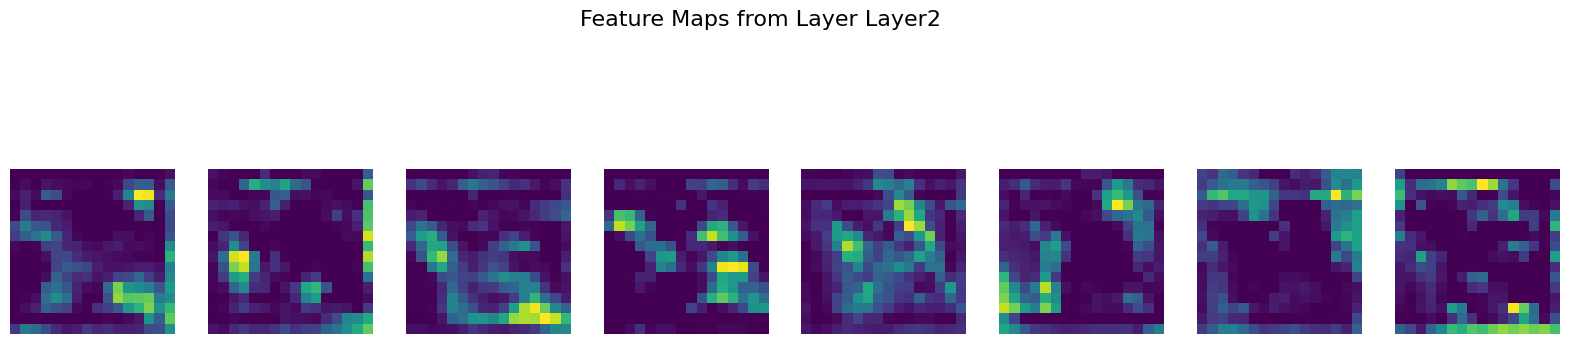

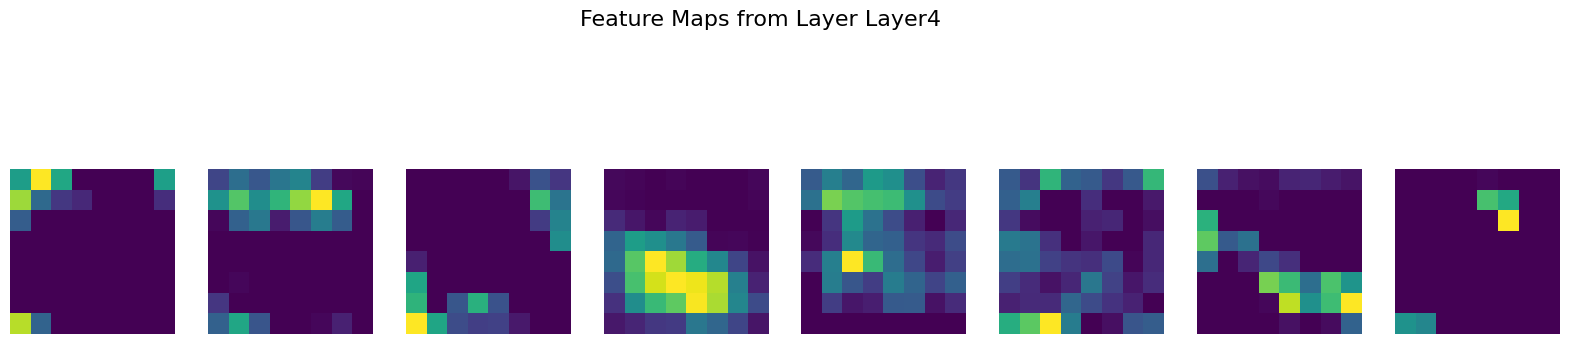

0.04
Epoch 11/70
Iteración 3555 - Lote 35/352 - Pérdida de Entrenamiento: 0.8472, Precisión de Entrenamiento: 0.6960
Iteración 3590 - Lote 70/352 - Pérdida de Entrenamiento: 0.8554, Precisión de Entrenamiento: 0.6977
Iteración 3625 - Lote 105/352 - Pérdida de Entrenamiento: 0.8451, Precisión de Entrenamiento: 0.7033
Iteración 3660 - Lote 140/352 - Pérdida de Entrenamiento: 0.8494, Precisión de Entrenamiento: 0.6991
Iteración 3695 - Lote 175/352 - Pérdida de Entrenamiento: 0.8495, Precisión de Entrenamiento: 0.7000
Iteración 3730 - Lote 210/352 - Pérdida de Entrenamiento: 0.8423, Precisión de Entrenamiento: 0.7027
Iteración 3765 - Lote 245/352 - Pérdida de Entrenamiento: 0.8342, Precisión de Entrenamiento: 0.7054
Iteración 3800 - Lote 280/352 - Pérdida de Entrenamiento: 0.8287, Precisión de Entrenamiento: 0.7071
Iteración 3835 - Lote 315/352 - Pérdida de Entrenamiento: 0.8249, Precisión de Entrenamiento: 0.7084
Iteración 3870 - Lote 350/352 - Pérdida de Entrenamiento: 0.8248, Precisión 

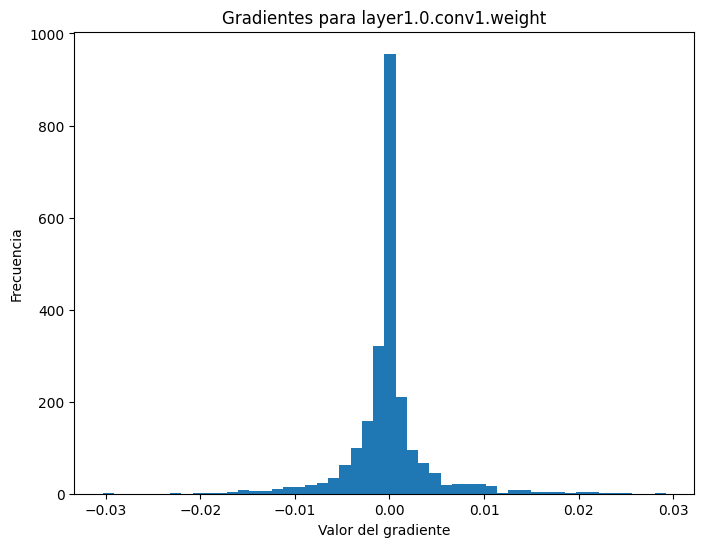

Gradientes para layer1.0.bn1.weight: min=-0.036452800035476685, max=0.017411699518561363, mean=0.0026270472444593906, std=0.0135631263256073


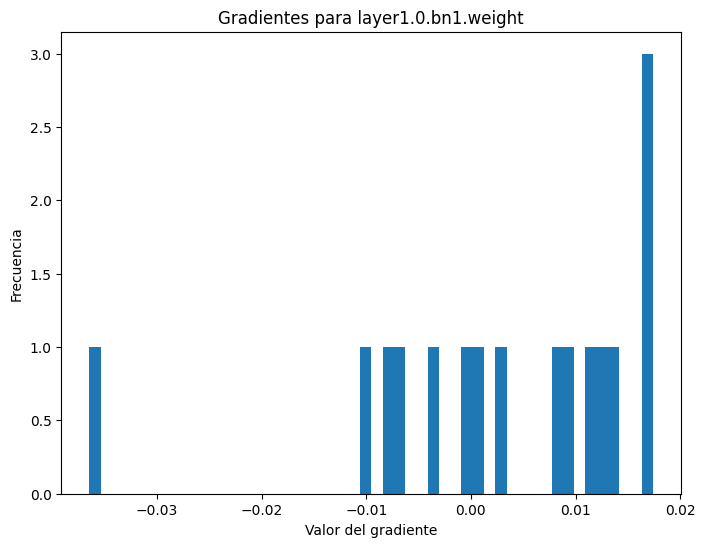

Gradientes para layer1.0.bn1.bias: min=-0.01144131738692522, max=0.026395132765173912, mean=0.002263608854264021, std=0.010267178528010845


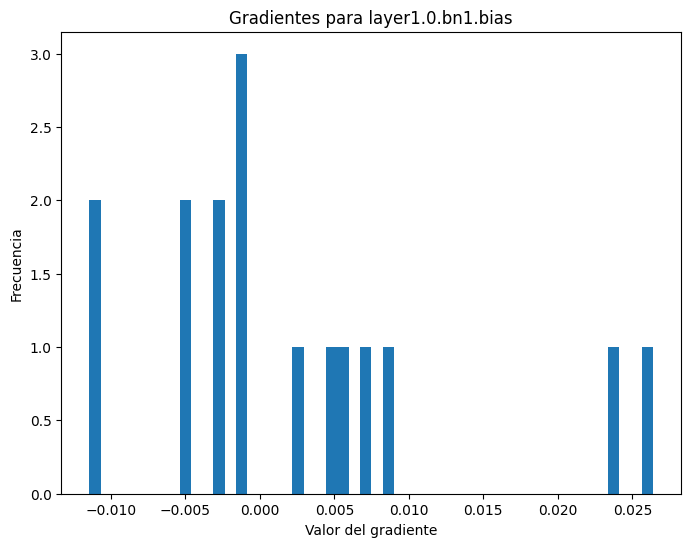

Gradientes para layer2.8.conv1.weight: min=-0.00747467577457428, max=0.010519753210246563, mean=-2.6537188659858657e-06, std=0.001772960415109992


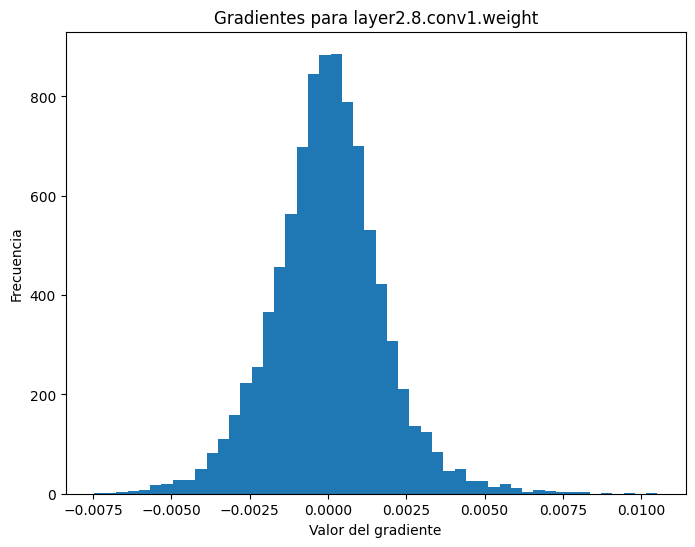

Gradientes para layer2.8.bn1.weight: min=-0.006032097153365612, max=0.009430707432329655, mean=-1.4554621884599328e-05, std=0.003764078253880143


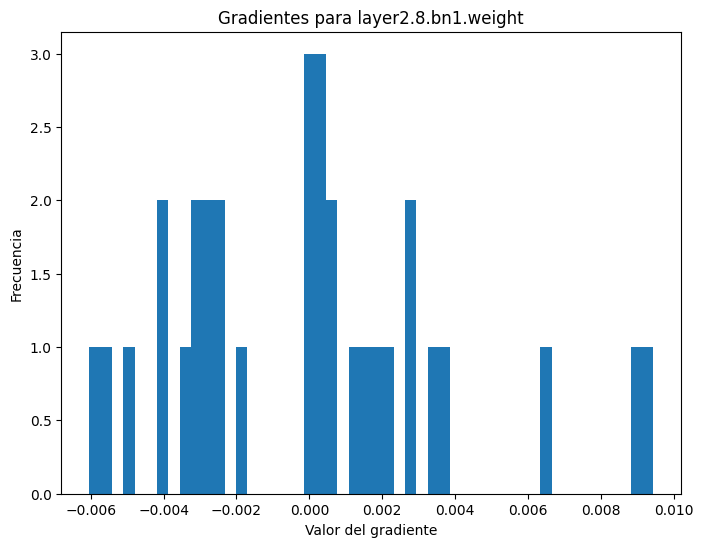

Gradientes para layer2.8.bn1.bias: min=-0.006814822554588318, max=0.007370747625827789, mean=0.0001621601259103045, std=0.0031088318210095167


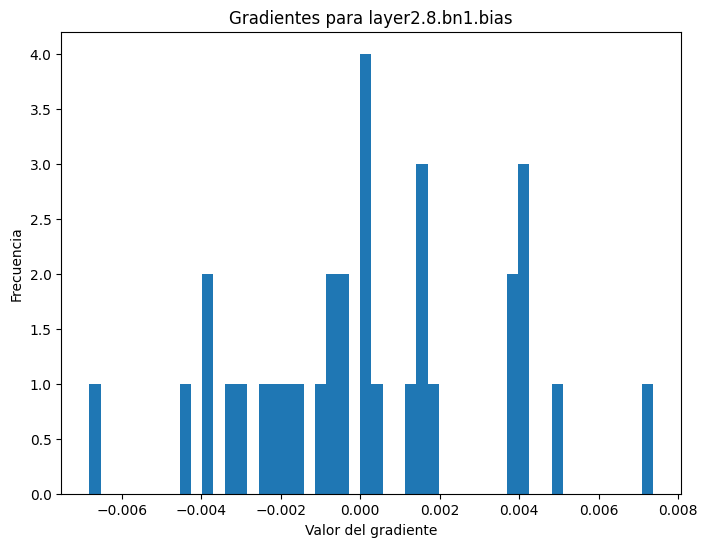

Gradientes para linear.weight: min=-0.07493235915899277, max=0.0646287128329277, mean=7.450580707946131e-10, std=0.01347615011036396


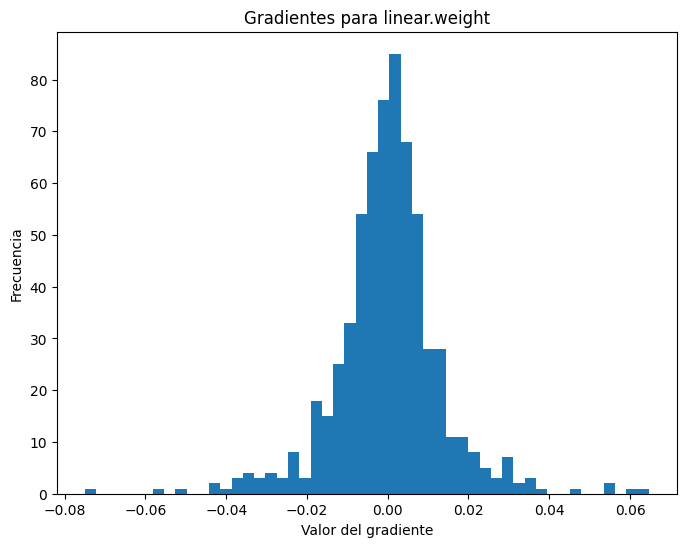

Gradientes para linear.bias: min=-0.01985281892120838, max=0.026055792346596718, mean=1.0244548542814869e-09, std=0.014297687448561192


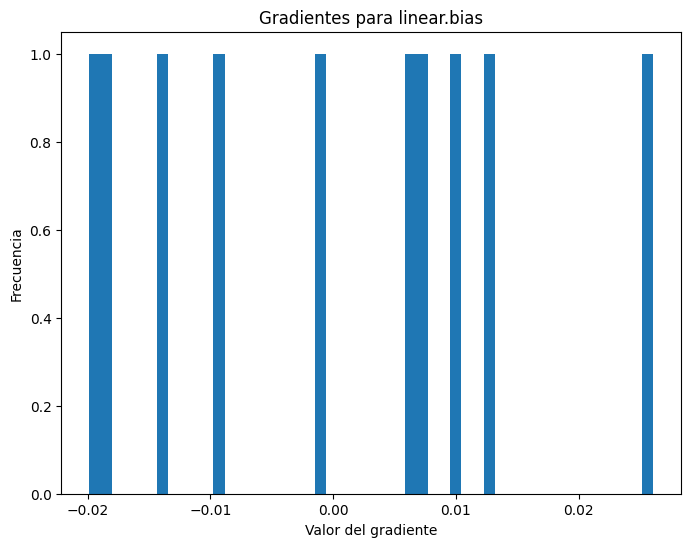

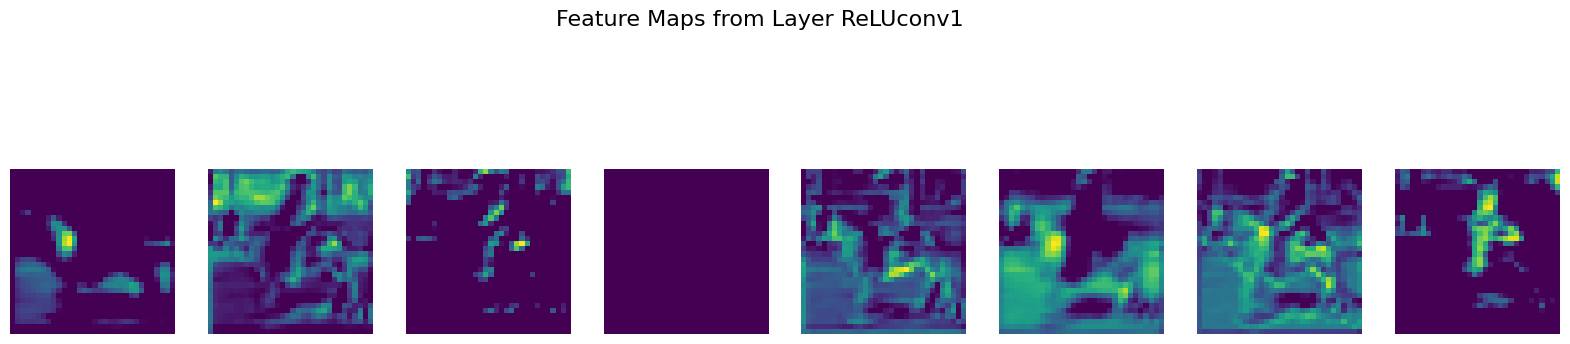

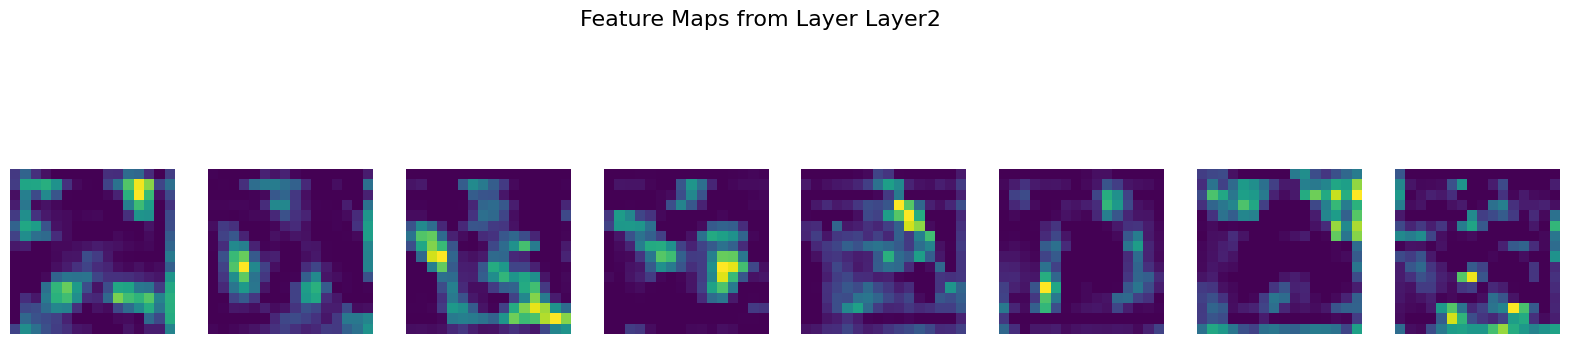

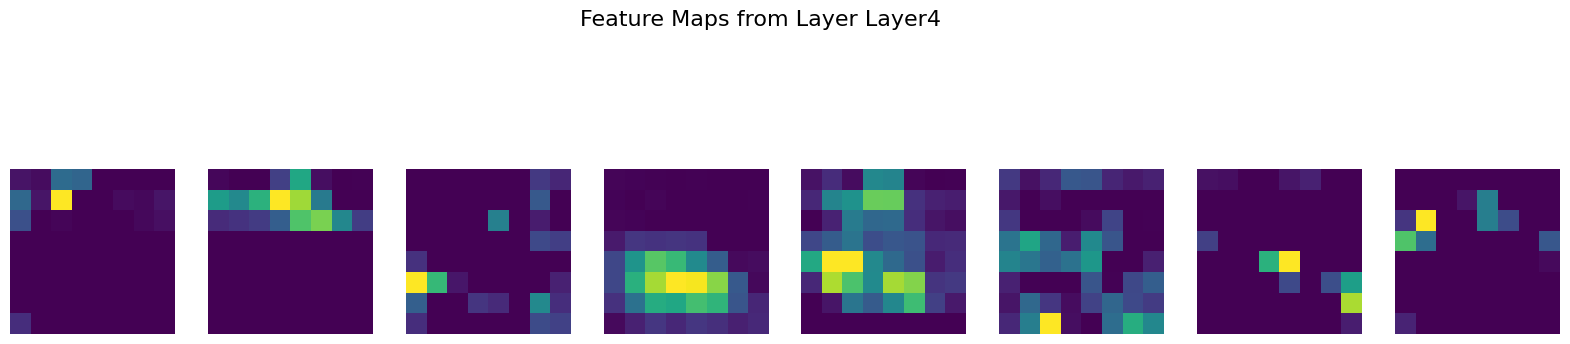

0.04
Epoch 16/70
Iteración 5315 - Lote 35/352 - Pérdida de Entrenamiento: 0.6341, Precisión de Entrenamiento: 0.7830
Iteración 5350 - Lote 70/352 - Pérdida de Entrenamiento: 0.6570, Precisión de Entrenamiento: 0.7748
Iteración 5385 - Lote 105/352 - Pérdida de Entrenamiento: 0.6605, Precisión de Entrenamiento: 0.7719
Iteración 5420 - Lote 140/352 - Pérdida de Entrenamiento: 0.6553, Precisión de Entrenamiento: 0.7732
Iteración 5455 - Lote 175/352 - Pérdida de Entrenamiento: 0.6598, Precisión de Entrenamiento: 0.7721
Iteración 5490 - Lote 210/352 - Pérdida de Entrenamiento: 0.6634, Precisión de Entrenamiento: 0.7714
Iteración 5525 - Lote 245/352 - Pérdida de Entrenamiento: 0.6598, Precisión de Entrenamiento: 0.7732
Iteración 5560 - Lote 280/352 - Pérdida de Entrenamiento: 0.6568, Precisión de Entrenamiento: 0.7734
Iteración 5595 - Lote 315/352 - Pérdida de Entrenamiento: 0.6563, Precisión de Entrenamiento: 0.7739
Iteración 5630 - Lote 350/352 - Pérdida de Entrenamiento: 0.6591, Precisión 

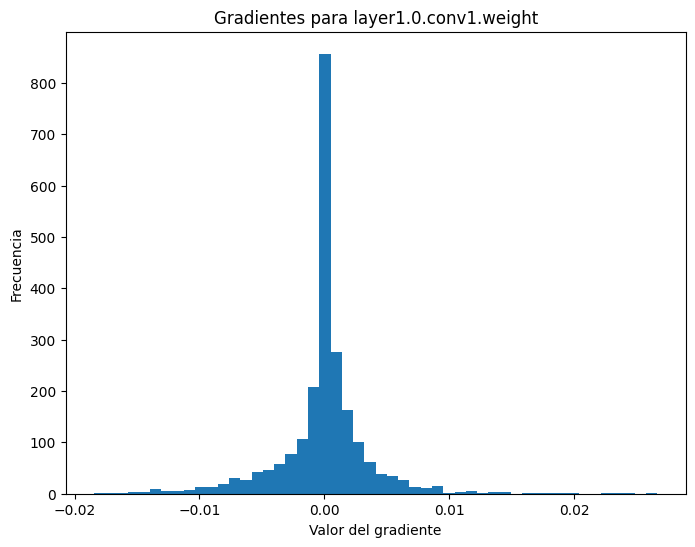

Gradientes para layer1.0.bn1.weight: min=-0.018031621351838112, max=0.02437768504023552, mean=-0.0008762385696172714, std=0.011065015569329262


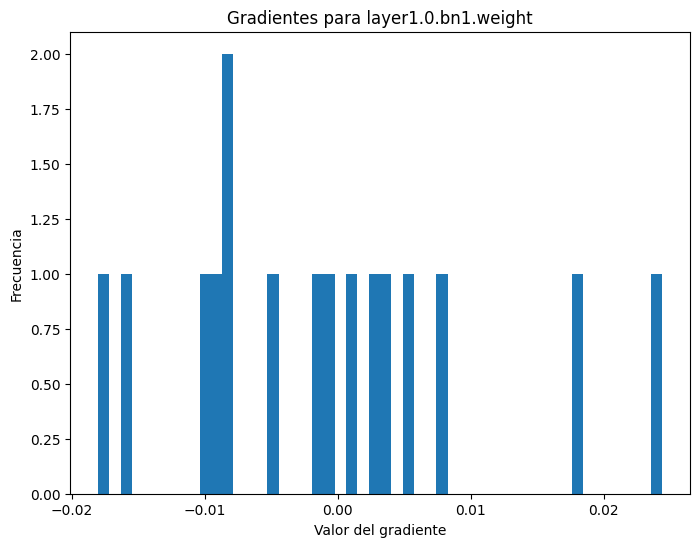

Gradientes para layer1.0.bn1.bias: min=-0.015416045673191547, max=0.009093394502997398, mean=-6.564849172718823e-05, std=0.00609668530523777


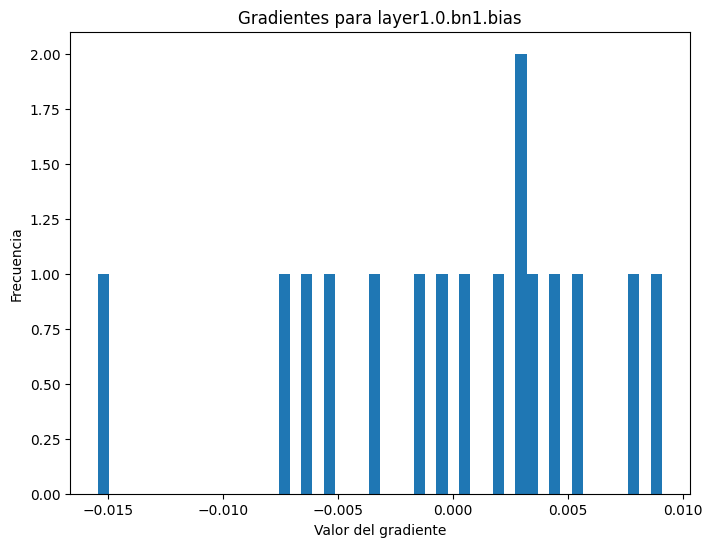

Gradientes para layer2.8.conv1.weight: min=-0.00850419607013464, max=0.01275235041975975, mean=0.00010044490045402199, std=0.0020038664806634188


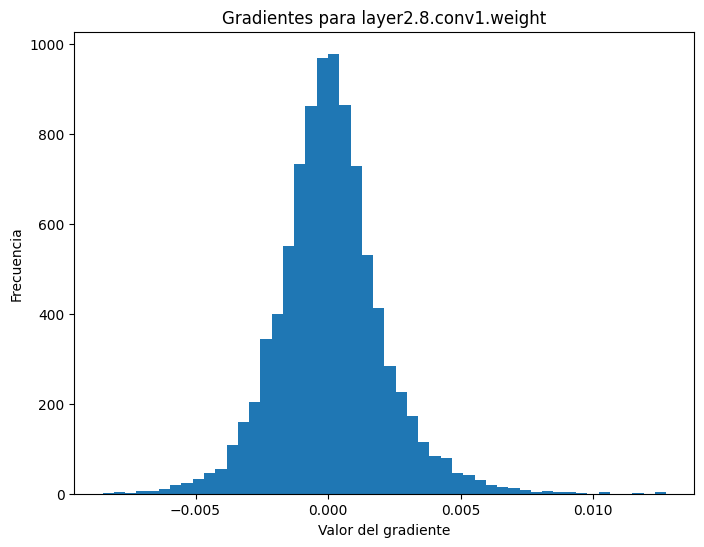

Gradientes para layer2.8.bn1.weight: min=-0.00943793449550867, max=0.010707559064030647, mean=3.573656431399286e-05, std=0.004260515794157982


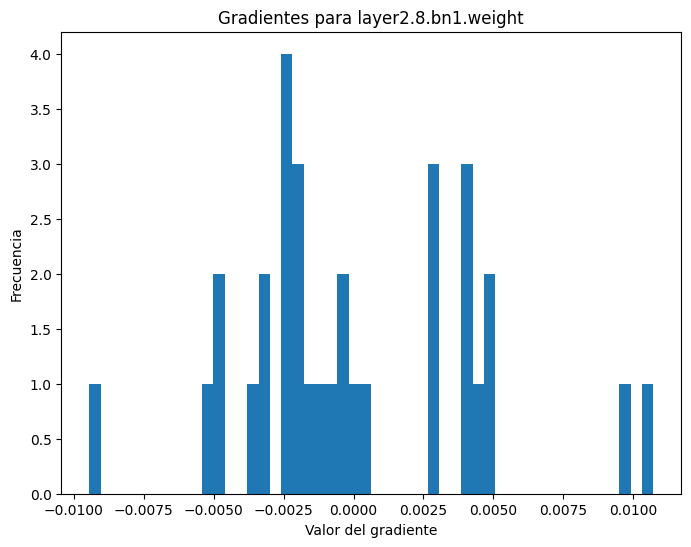

Gradientes para layer2.8.bn1.bias: min=-0.005051326472312212, max=0.00702312495559454, mean=0.00010356737766414881, std=0.002986176870763302


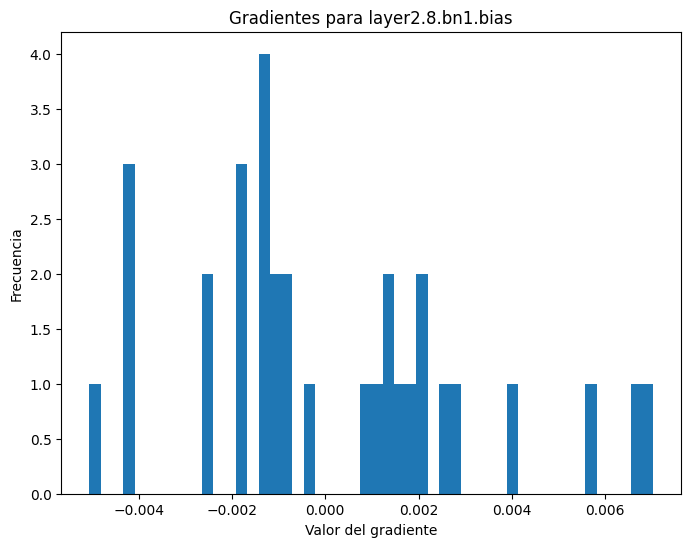

Gradientes para linear.weight: min=-0.09366186708211899, max=0.09103991091251373, mean=5.587935669737476e-10, std=0.01803191378712654


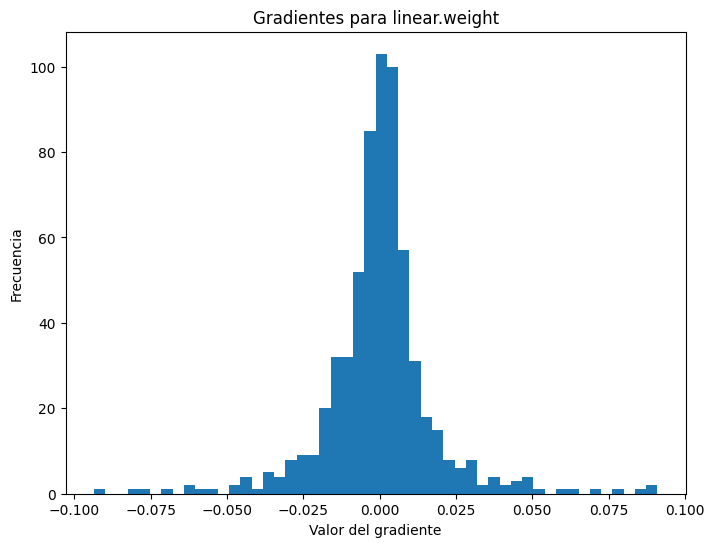

Gradientes para linear.bias: min=-0.04352158308029175, max=0.05487769842147827, mean=7.450580707946131e-10, std=0.02772601507604122


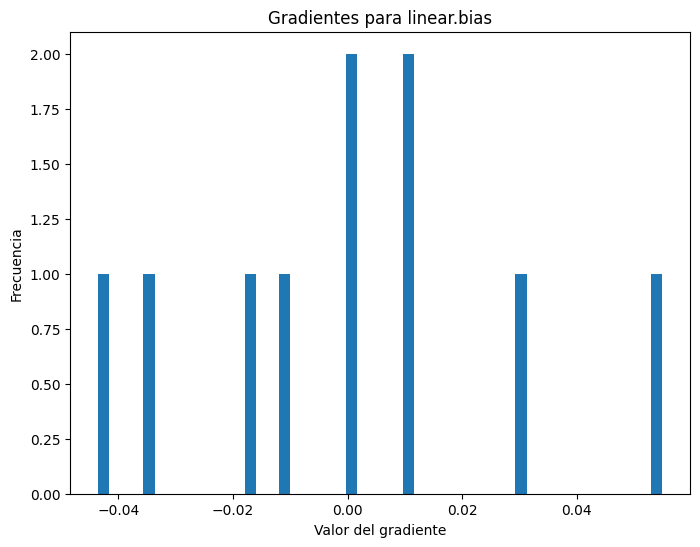

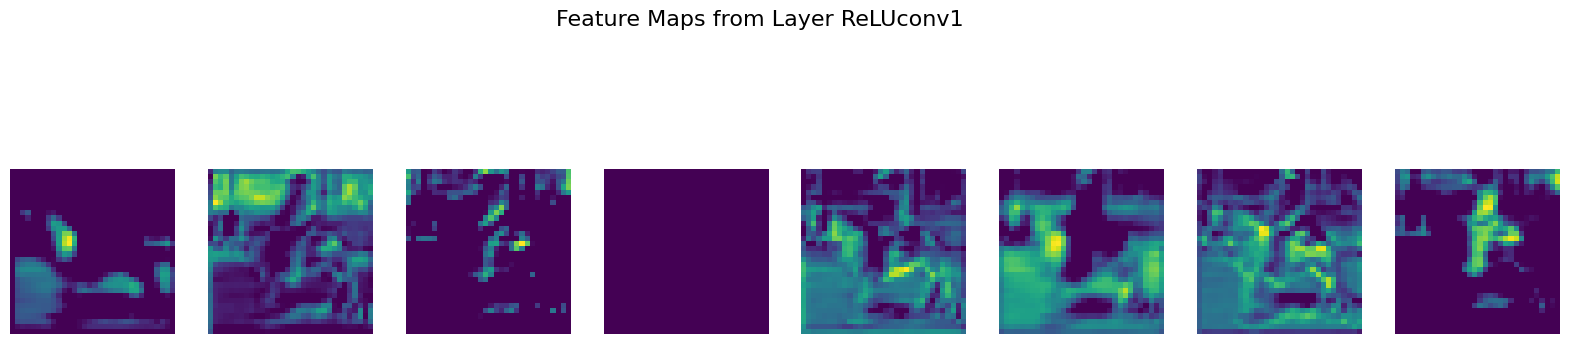

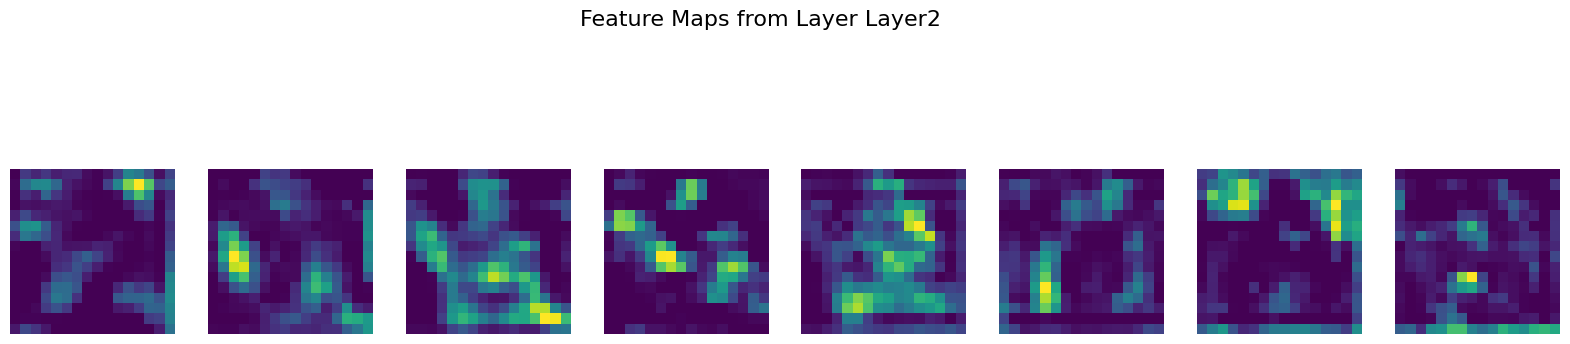

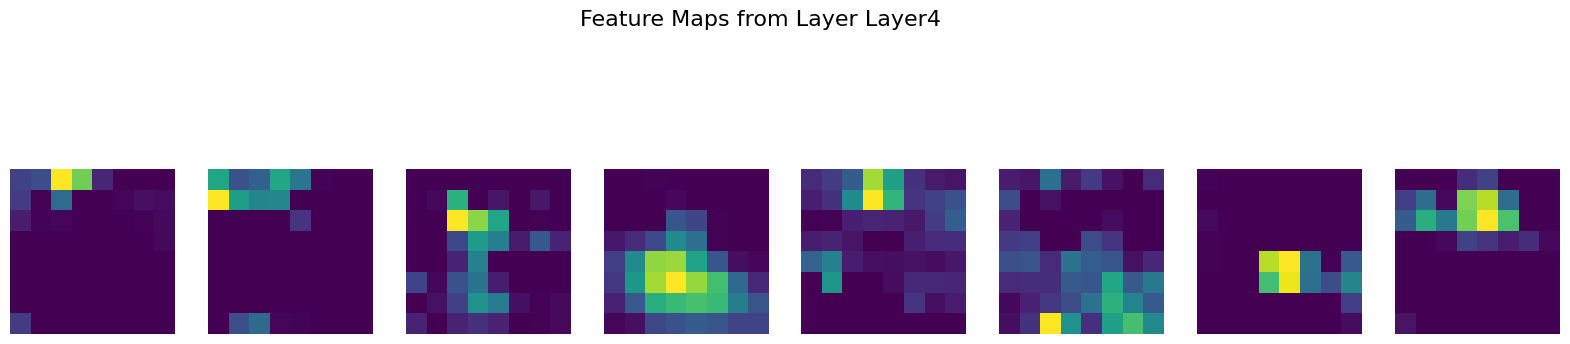

0.04
Epoch 21/70
Iteración 7075 - Lote 35/352 - Pérdida de Entrenamiento: 0.5683, Precisión de Entrenamiento: 0.8083
Iteración 7110 - Lote 70/352 - Pérdida de Entrenamiento: 0.5599, Precisión de Entrenamiento: 0.8104
Iteración 7145 - Lote 105/352 - Pérdida de Entrenamiento: 0.5609, Precisión de Entrenamiento: 0.8076
Iteración 7180 - Lote 140/352 - Pérdida de Entrenamiento: 0.5562, Precisión de Entrenamiento: 0.8080
Iteración 7215 - Lote 175/352 - Pérdida de Entrenamiento: 0.5501, Precisión de Entrenamiento: 0.8081
Iteración 7250 - Lote 210/352 - Pérdida de Entrenamiento: 0.5573, Precisión de Entrenamiento: 0.8072
Iteración 7285 - Lote 245/352 - Pérdida de Entrenamiento: 0.5610, Precisión de Entrenamiento: 0.8055
Iteración 7320 - Lote 280/352 - Pérdida de Entrenamiento: 0.5601, Precisión de Entrenamiento: 0.8059
Iteración 7355 - Lote 315/352 - Pérdida de Entrenamiento: 0.5591, Precisión de Entrenamiento: 0.8065
Iteración 7390 - Lote 350/352 - Pérdida de Entrenamiento: 0.5590, Precisión 

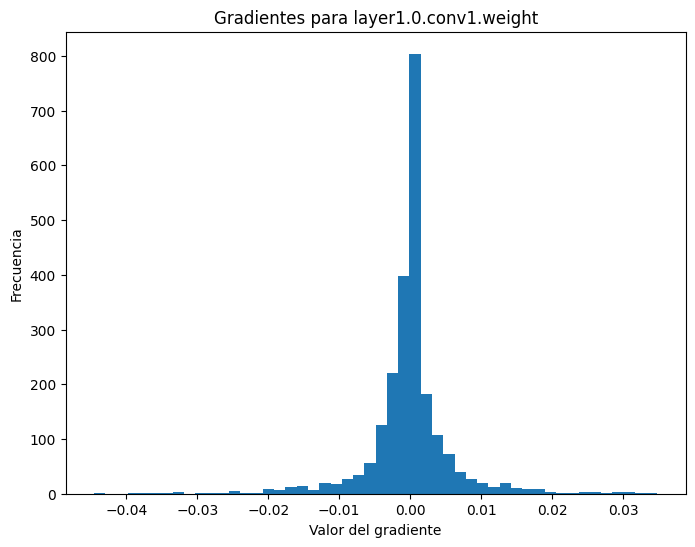

Gradientes para layer1.0.bn1.weight: min=-0.05042463168501854, max=0.0317726731300354, mean=-0.0006840433925390244, std=0.02366453781723976


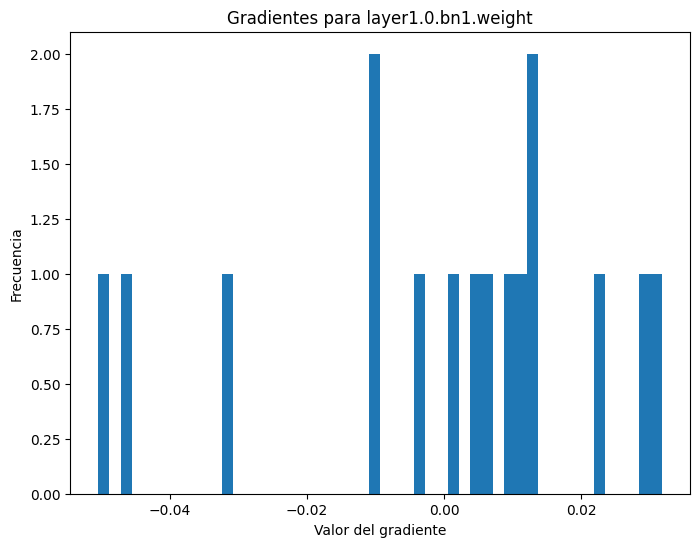

Gradientes para layer1.0.bn1.bias: min=-0.018990913406014442, max=0.0218699611723423, mean=0.007186857983469963, std=0.010271995328366756


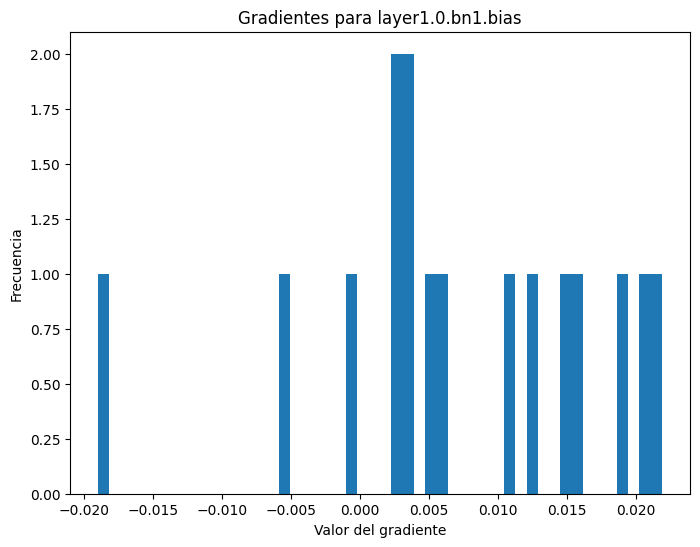

Gradientes para layer2.8.conv1.weight: min=-0.0246691033244133, max=0.01805023103952408, mean=-4.682324652094394e-05, std=0.004030999727547169


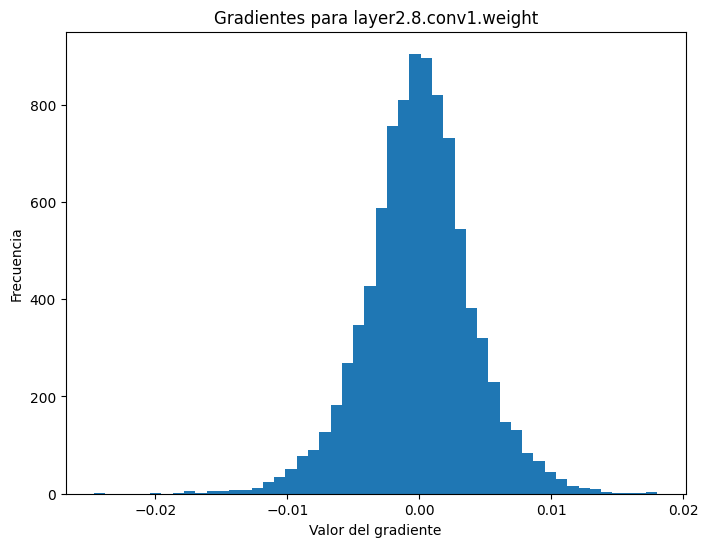

Gradientes para layer2.8.bn1.weight: min=-0.020368456840515137, max=0.040736373513936996, mean=0.00046870444202795625, std=0.012028263881802559


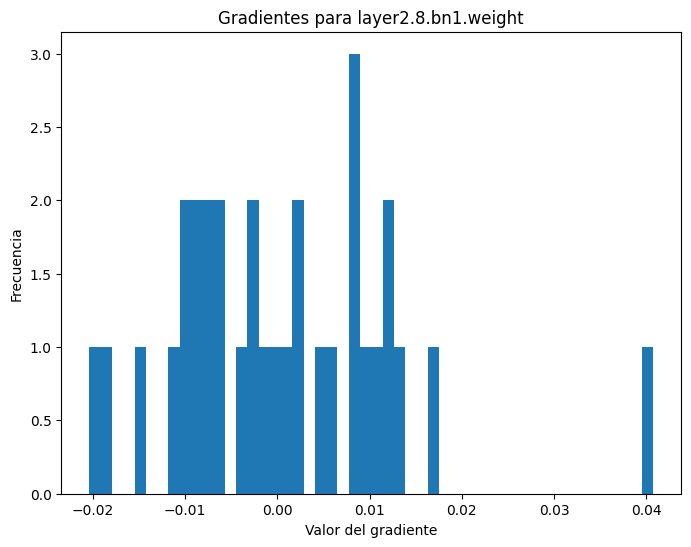

Gradientes para layer2.8.bn1.bias: min=-0.01760636642575264, max=0.025830311700701714, mean=0.0001295287220273167, std=0.009137789718806744


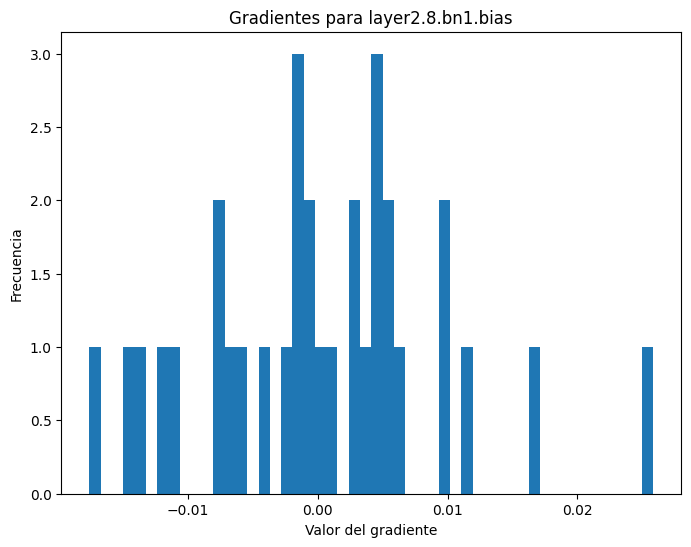

Gradientes para linear.weight: min=-0.055248651653528214, max=0.050870224833488464, mean=-3.7252903539730653e-10, std=0.014590924605727196


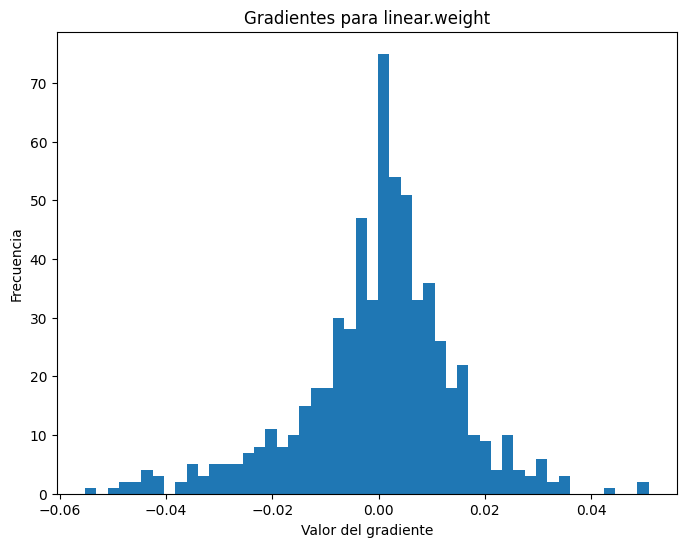

Gradientes para linear.bias: min=-0.05172203481197357, max=0.03745969012379646, mean=-7.450580707946131e-10, std=0.031067010015249252


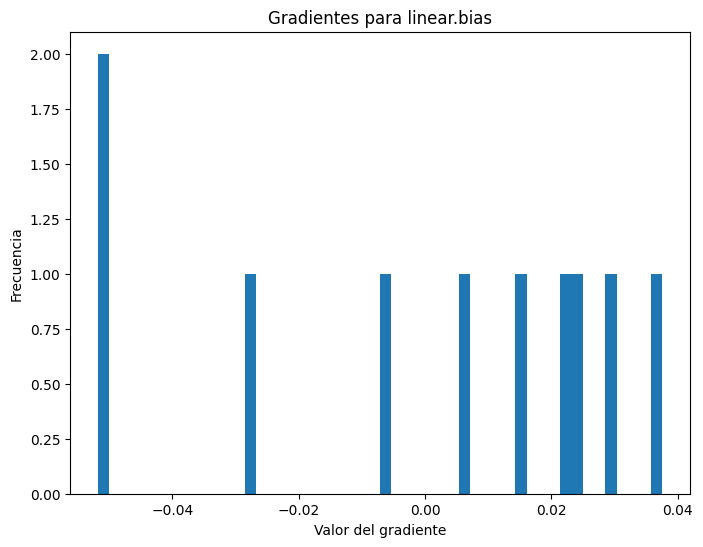

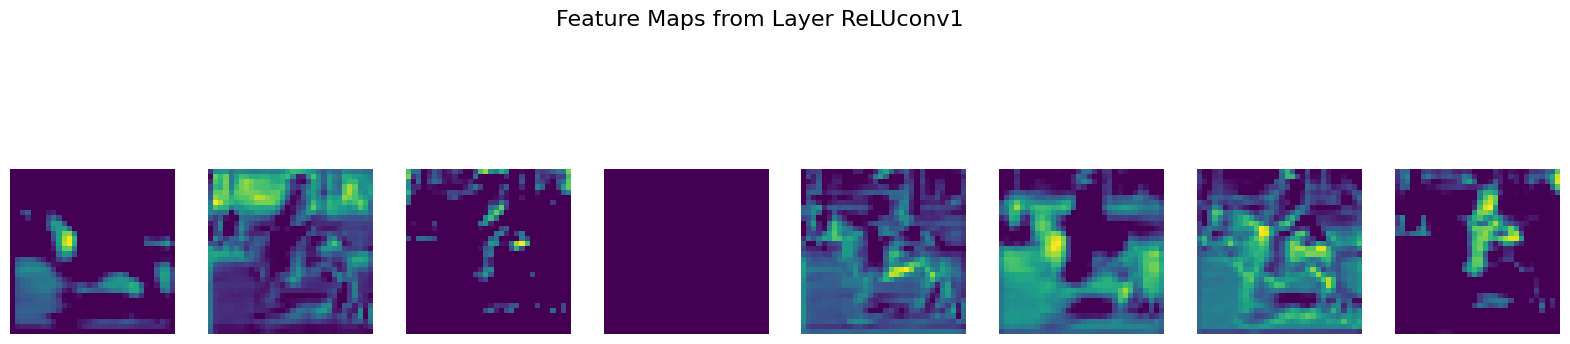

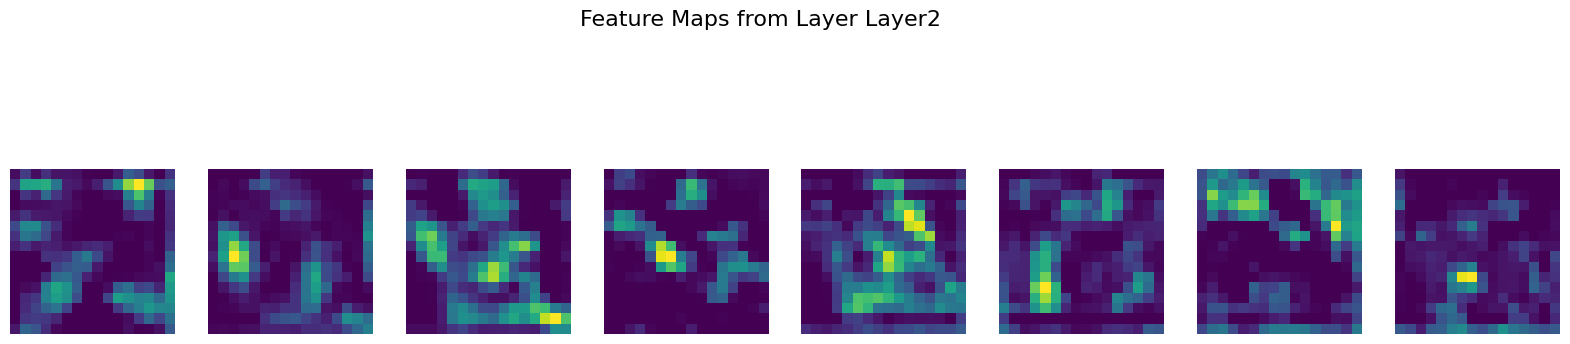

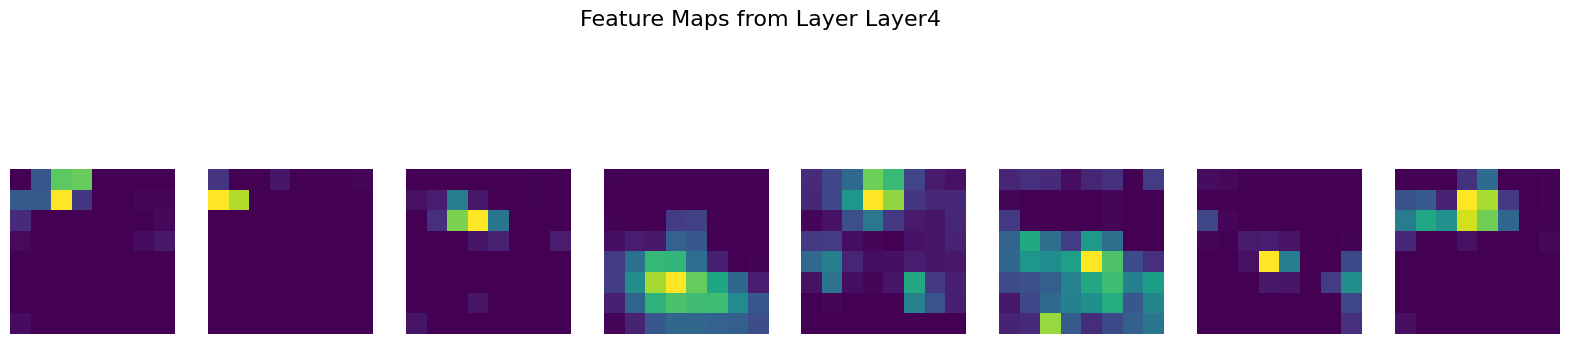

0.004
Epoch 26/70
Iteración 8835 - Lote 35/352 - Pérdida de Entrenamiento: 0.4284, Precisión de Entrenamiento: 0.8507
Iteración 8870 - Lote 70/352 - Pérdida de Entrenamiento: 0.4257, Precisión de Entrenamiento: 0.8539
Iteración 8905 - Lote 105/352 - Pérdida de Entrenamiento: 0.4238, Precisión de Entrenamiento: 0.8564
Iteración 8940 - Lote 140/352 - Pérdida de Entrenamiento: 0.4247, Precisión de Entrenamiento: 0.8547
Iteración 8975 - Lote 175/352 - Pérdida de Entrenamiento: 0.4238, Precisión de Entrenamiento: 0.8536
Iteración 9010 - Lote 210/352 - Pérdida de Entrenamiento: 0.4270, Precisión de Entrenamiento: 0.8523
Iteración 9045 - Lote 245/352 - Pérdida de Entrenamiento: 0.4259, Precisión de Entrenamiento: 0.8533
Iteración 9080 - Lote 280/352 - Pérdida de Entrenamiento: 0.4256, Precisión de Entrenamiento: 0.8528
Iteración 9115 - Lote 315/352 - Pérdida de Entrenamiento: 0.4276, Precisión de Entrenamiento: 0.8521
Iteración 9150 - Lote 350/352 - Pérdida de Entrenamiento: 0.4238, Precisión

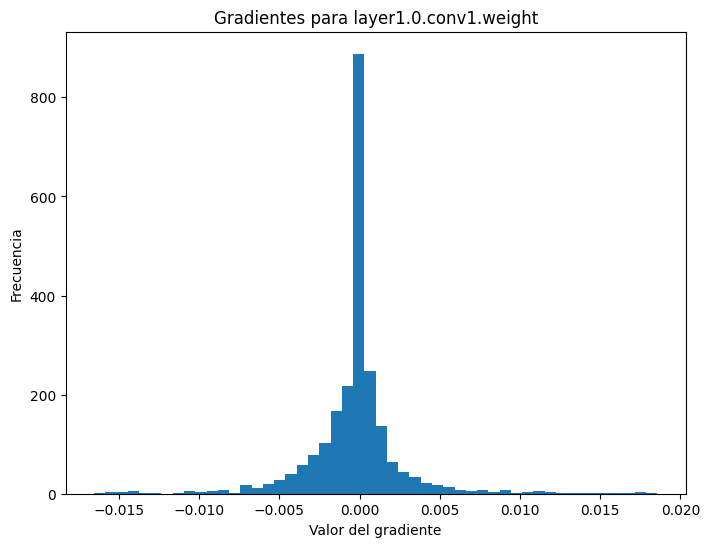

Gradientes para layer1.0.bn1.weight: min=-0.02765905112028122, max=0.015983836725354195, mean=-0.0018081801244989038, std=0.01224894542247057


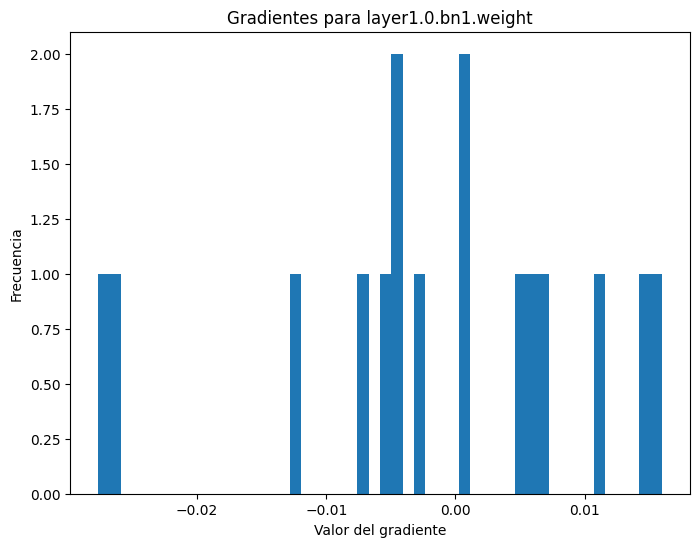

Gradientes para layer1.0.bn1.bias: min=-0.01372312381863594, max=0.023705830797553062, mean=0.0016094136517494917, std=0.009033276699483395


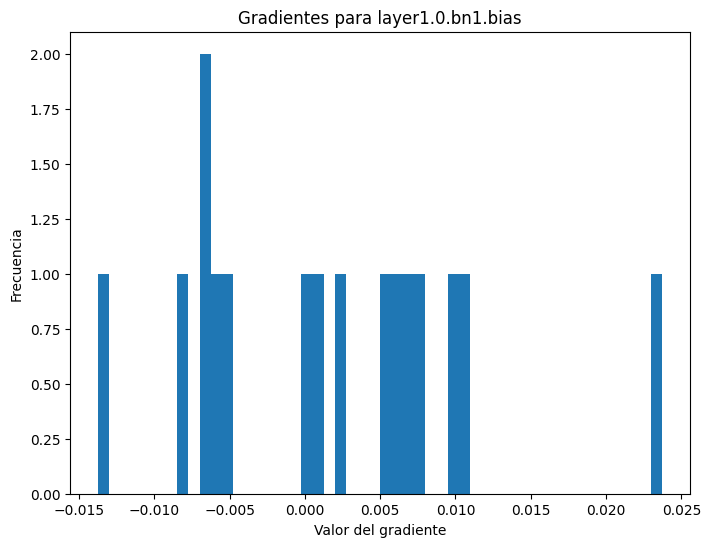

Gradientes para layer2.8.conv1.weight: min=-0.011507892049849033, max=0.01005325373262167, mean=8.769215492065996e-05, std=0.0019321269355714321


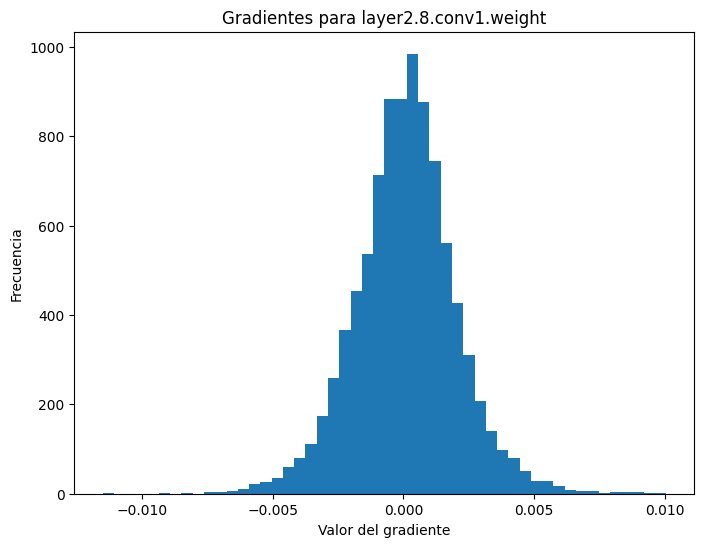

Gradientes para layer2.8.bn1.weight: min=-0.008489598520100117, max=0.013325963169336319, mean=0.00014802237274125218, std=0.004483127500861883


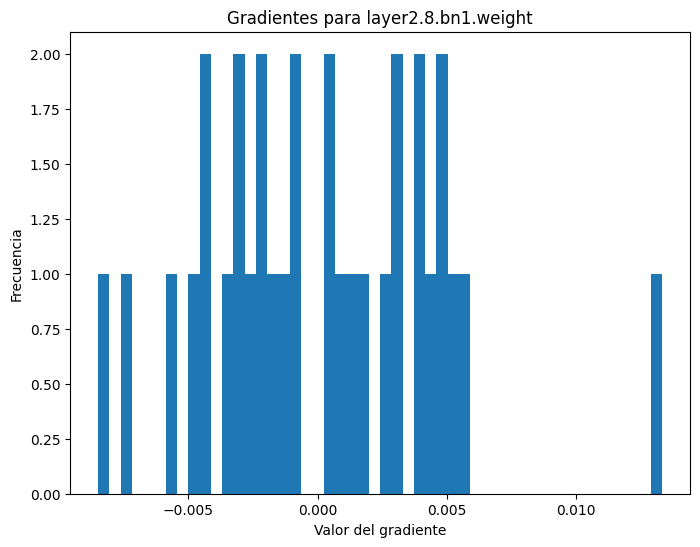

Gradientes para layer2.8.bn1.bias: min=-0.0075669437646865845, max=0.009849123656749725, mean=0.0003275518538430333, std=0.0038840905763208866


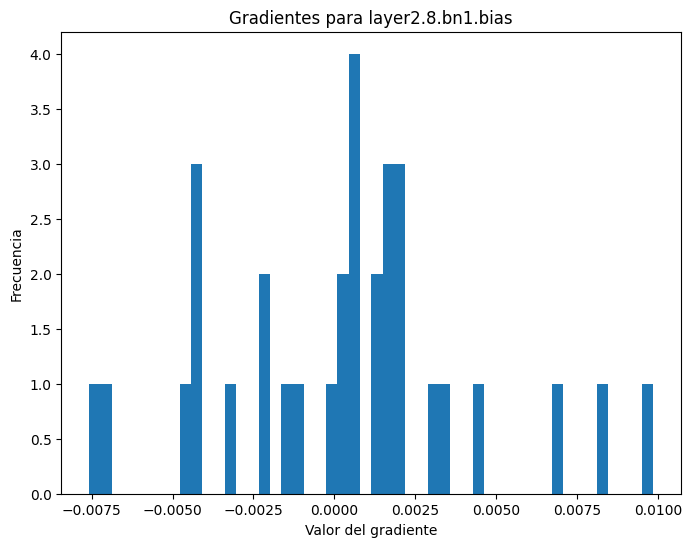

Gradientes para linear.weight: min=-0.04042014852166176, max=0.06271763145923615, mean=4.190951474747351e-10, std=0.00914190523326397


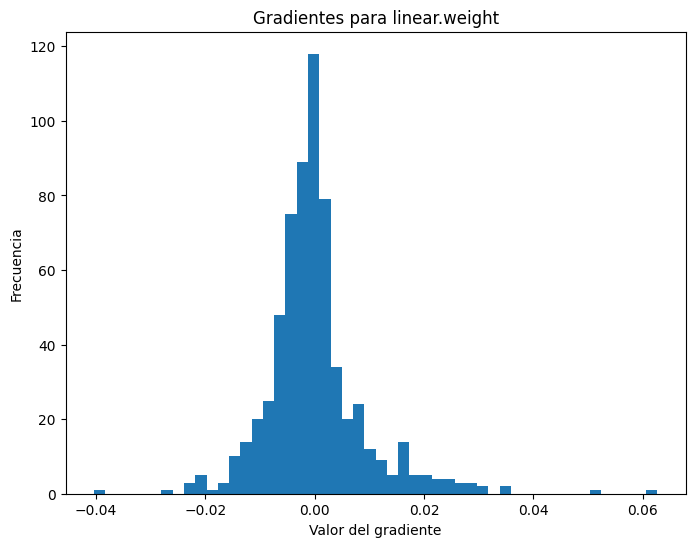

Gradientes para linear.bias: min=-0.009035968221724033, max=0.029988890513777733, mean=8.381902949494702e-10, std=0.010415952652692795


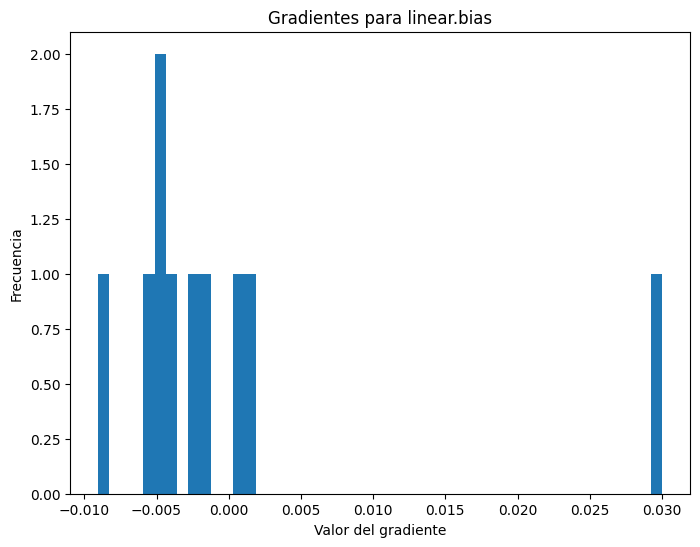

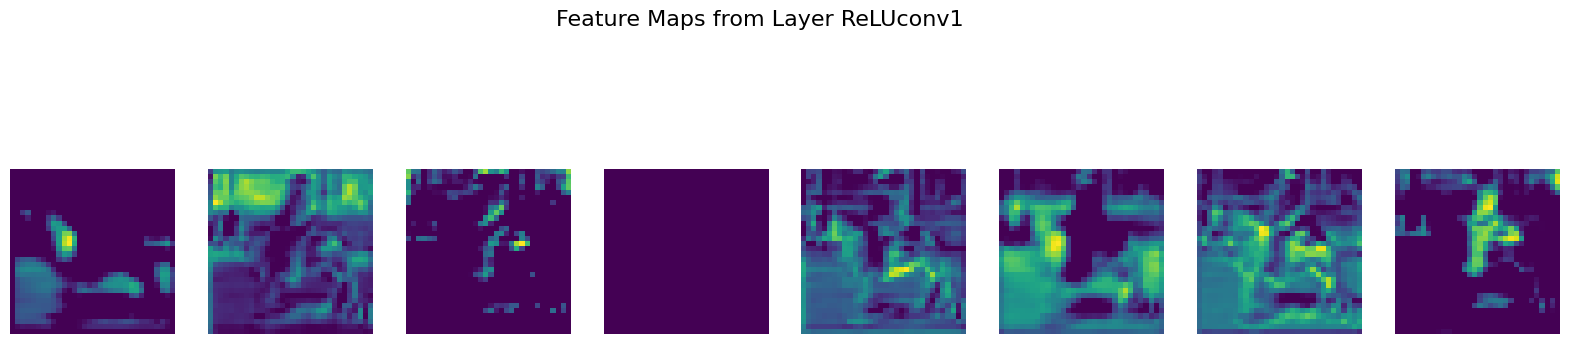

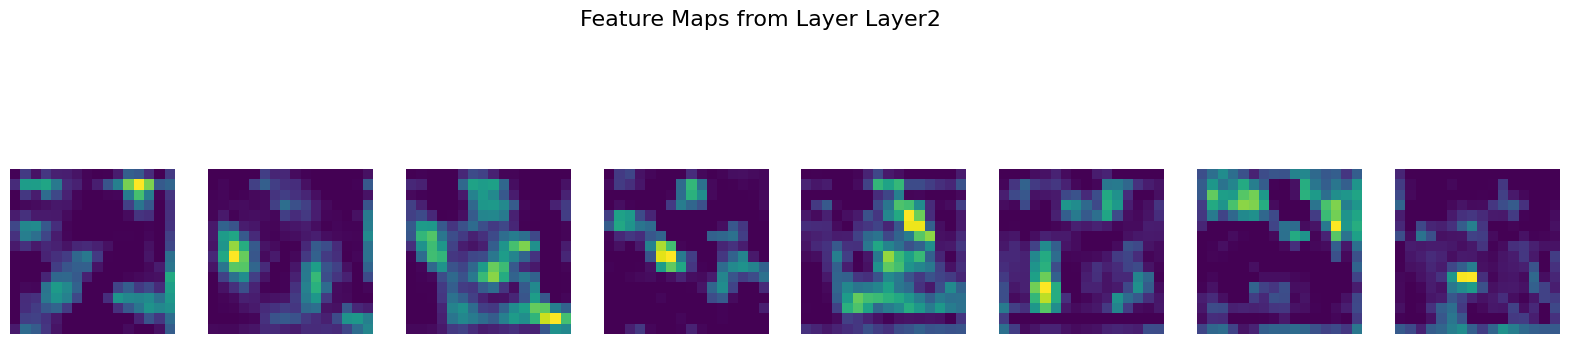

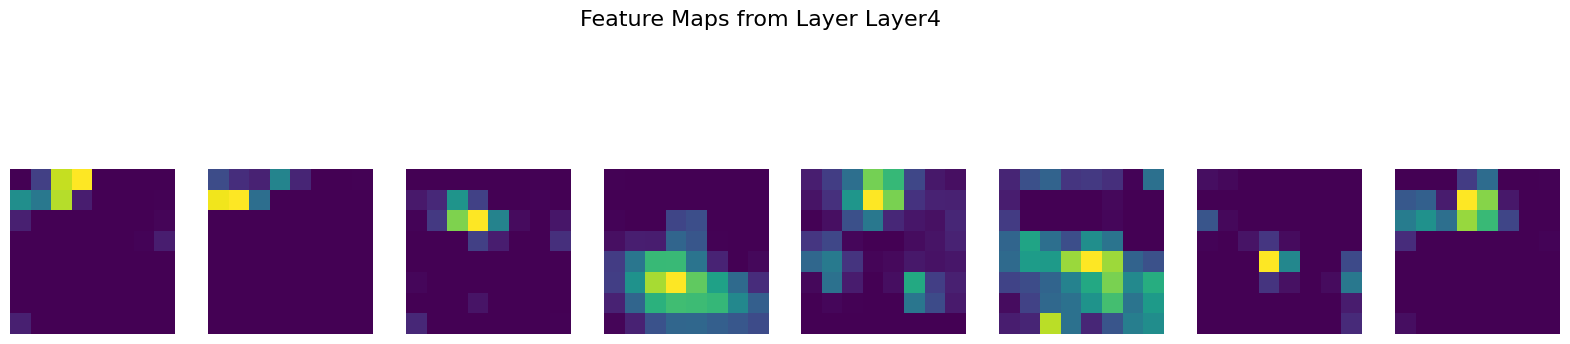

0.004
Epoch 31/70
Iteración 10595 - Lote 35/352 - Pérdida de Entrenamiento: 0.4053, Precisión de Entrenamiento: 0.8618
Iteración 10630 - Lote 70/352 - Pérdida de Entrenamiento: 0.4001, Precisión de Entrenamiento: 0.8614
Iteración 10665 - Lote 105/352 - Pérdida de Entrenamiento: 0.4010, Precisión de Entrenamiento: 0.8609
Iteración 10700 - Lote 140/352 - Pérdida de Entrenamiento: 0.3950, Precisión de Entrenamiento: 0.8630
Iteración 10735 - Lote 175/352 - Pérdida de Entrenamiento: 0.3886, Precisión de Entrenamiento: 0.8645
Iteración 10770 - Lote 210/352 - Pérdida de Entrenamiento: 0.3898, Precisión de Entrenamiento: 0.8653
Iteración 10805 - Lote 245/352 - Pérdida de Entrenamiento: 0.3917, Precisión de Entrenamiento: 0.8643
Iteración 10840 - Lote 280/352 - Pérdida de Entrenamiento: 0.3937, Precisión de Entrenamiento: 0.8642
Iteración 10875 - Lote 315/352 - Pérdida de Entrenamiento: 0.3941, Precisión de Entrenamiento: 0.8640
Iteración 10910 - Lote 350/352 - Pérdida de Entrenamiento: 0.3963,

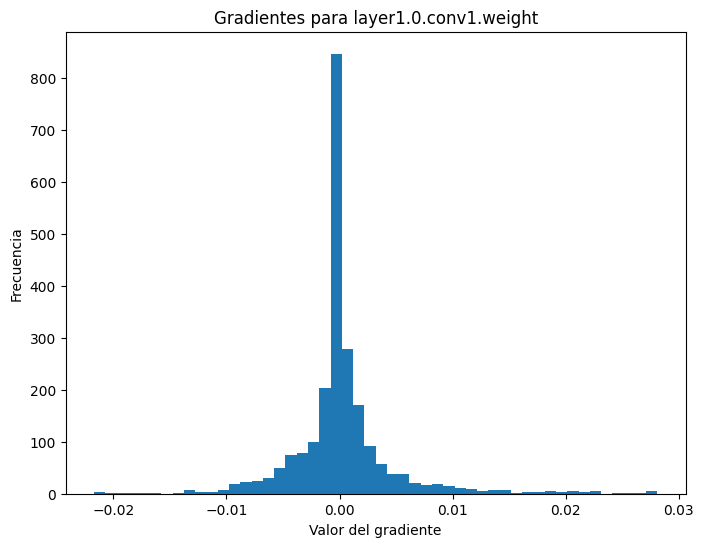

Gradientes para layer1.0.bn1.weight: min=-0.03423147276043892, max=0.028049679473042488, mean=0.000934804673306644, std=0.015259560197591782


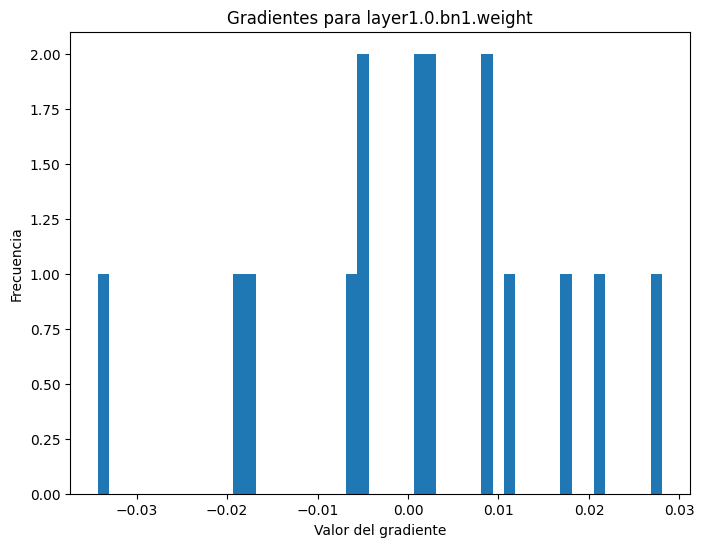

Gradientes para layer1.0.bn1.bias: min=-0.016187667846679688, max=0.026875833049416542, mean=0.006600284017622471, std=0.010530835017561913


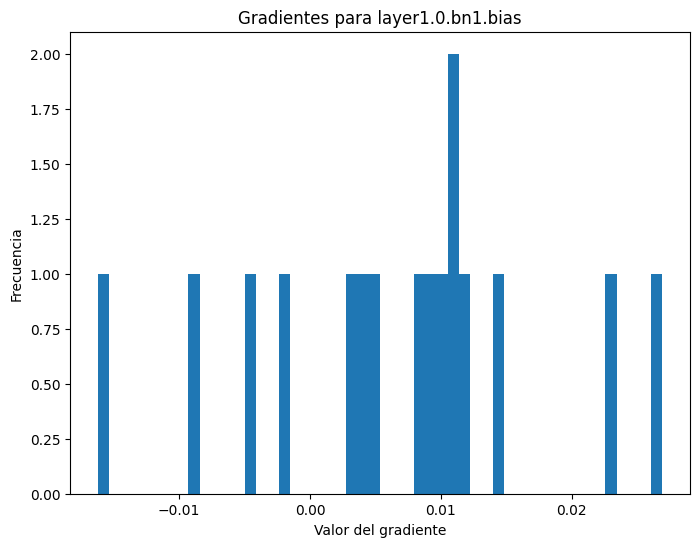

Gradientes para layer2.8.conv1.weight: min=-0.015153204090893269, max=0.01740165613591671, mean=9.349243191536516e-05, std=0.0030677062459290028


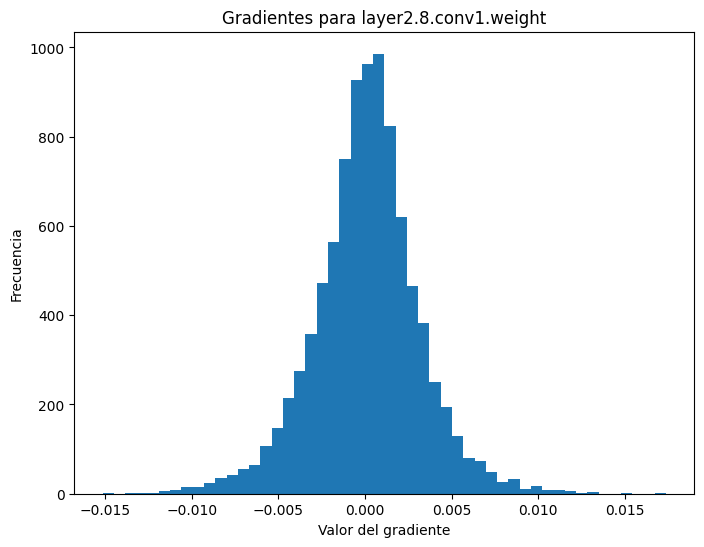

Gradientes para layer2.8.bn1.weight: min=-0.011621410958468914, max=0.009934370405972004, mean=-1.0851072147488594e-06, std=0.0050326925702393055


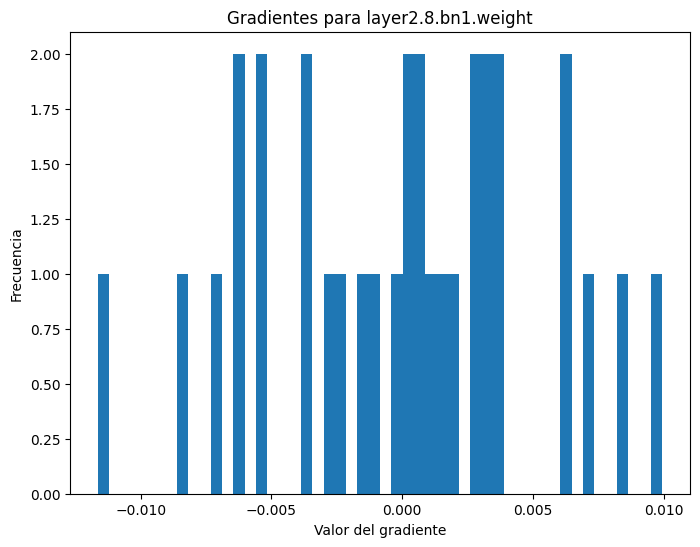

Gradientes para layer2.8.bn1.bias: min=-0.011753814294934273, max=0.011173129081726074, mean=0.0003820705460384488, std=0.004429963883012533


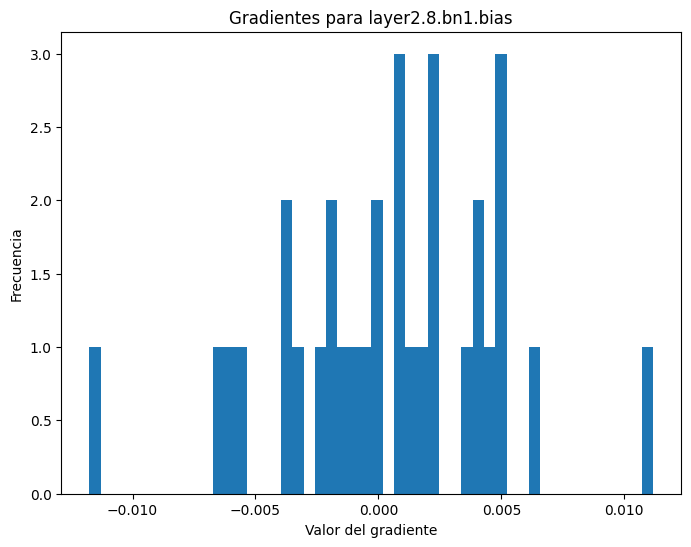

Gradientes para linear.weight: min=-0.09231646358966827, max=0.07324743270874023, mean=0.0, std=0.014503397978842258


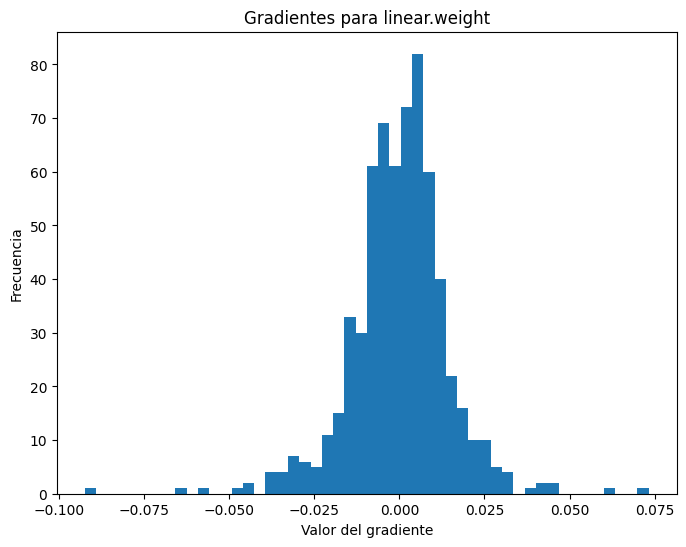

Gradientes para linear.bias: min=-0.02957896888256073, max=0.03931857645511627, mean=1.4901161415892261e-09, std=0.021621782332658768


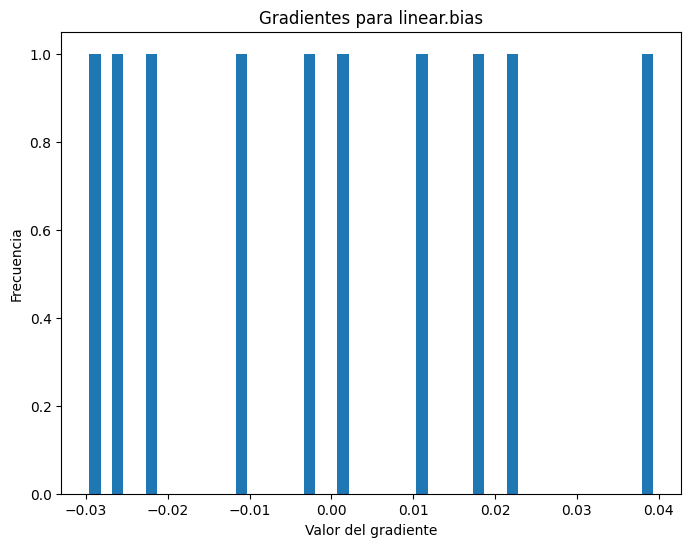

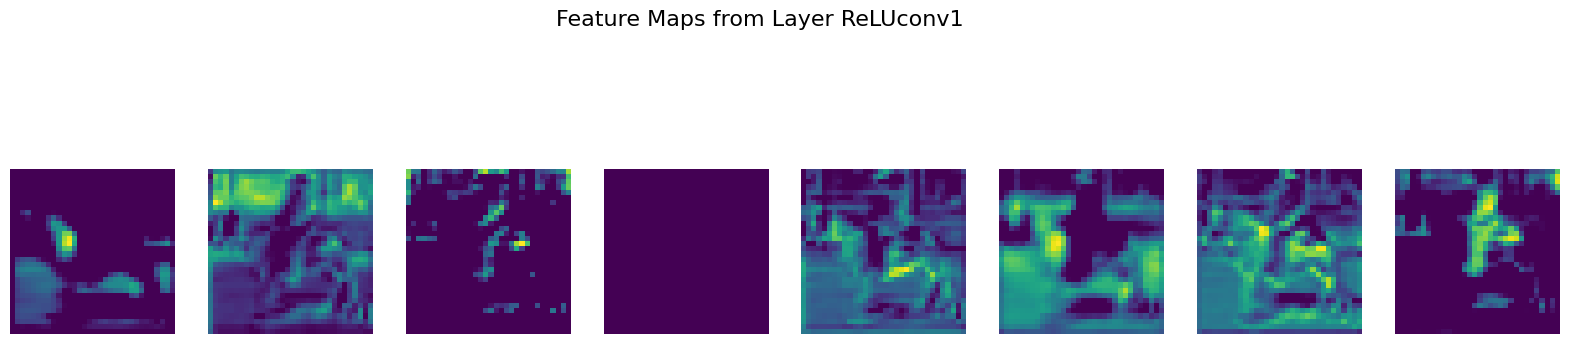

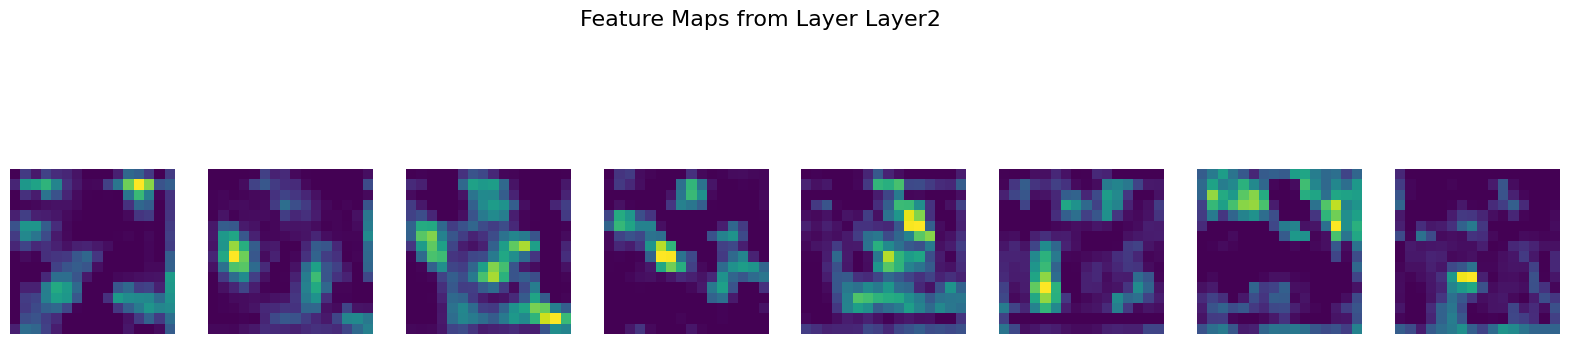

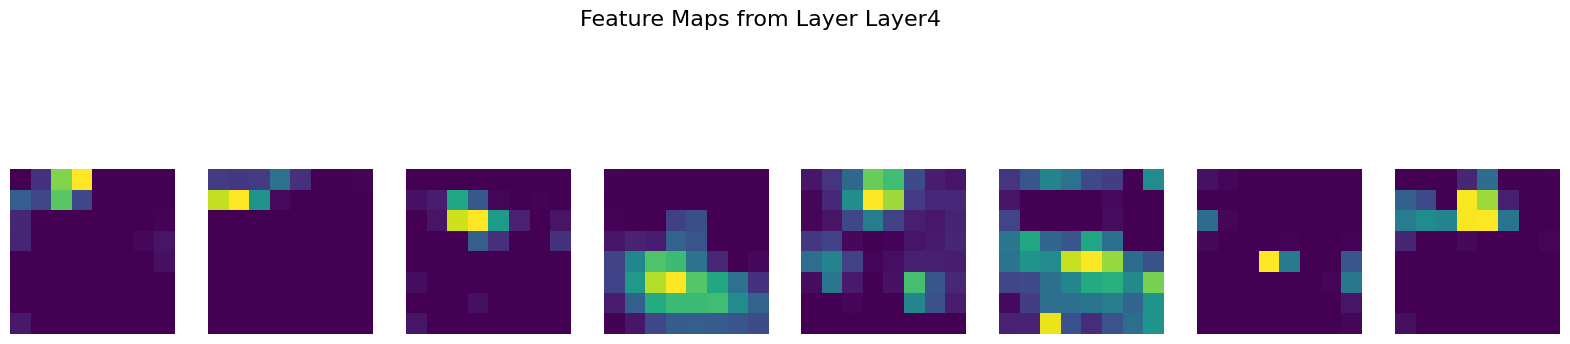

0.004
Epoch 36/70
Iteración 12355 - Lote 35/352 - Pérdida de Entrenamiento: 0.3837, Precisión de Entrenamiento: 0.8688
Iteración 12390 - Lote 70/352 - Pérdida de Entrenamiento: 0.3893, Precisión de Entrenamiento: 0.8661
Iteración 12425 - Lote 105/352 - Pérdida de Entrenamiento: 0.3819, Precisión de Entrenamiento: 0.8676
Iteración 12460 - Lote 140/352 - Pérdida de Entrenamiento: 0.3827, Precisión de Entrenamiento: 0.8679
Iteración 12495 - Lote 175/352 - Pérdida de Entrenamiento: 0.3884, Precisión de Entrenamiento: 0.8649
Iteración 12530 - Lote 210/352 - Pérdida de Entrenamiento: 0.3864, Precisión de Entrenamiento: 0.8659
Iteración 12565 - Lote 245/352 - Pérdida de Entrenamiento: 0.3833, Precisión de Entrenamiento: 0.8672
Iteración 12600 - Lote 280/352 - Pérdida de Entrenamiento: 0.3825, Precisión de Entrenamiento: 0.8677
Iteración 12635 - Lote 315/352 - Pérdida de Entrenamiento: 0.3802, Precisión de Entrenamiento: 0.8689
Iteración 12670 - Lote 350/352 - Pérdida de Entrenamiento: 0.3809,

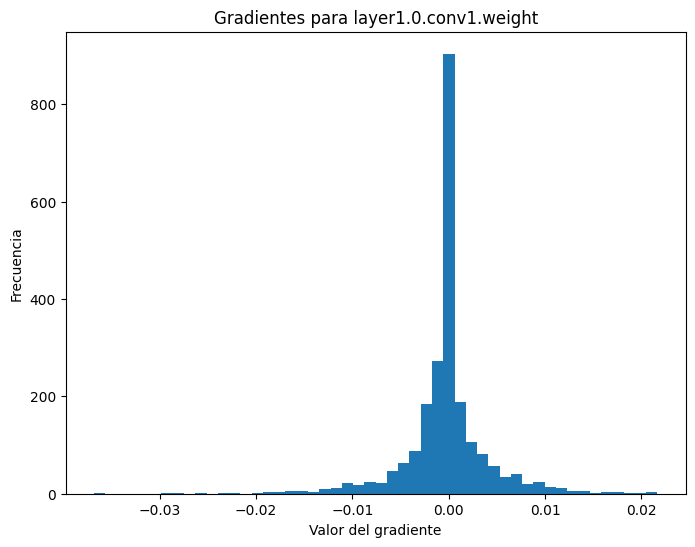

Gradientes para layer1.0.bn1.weight: min=-0.018693996593356133, max=0.03646836429834366, mean=-0.0010148464934900403, std=0.01648804545402527


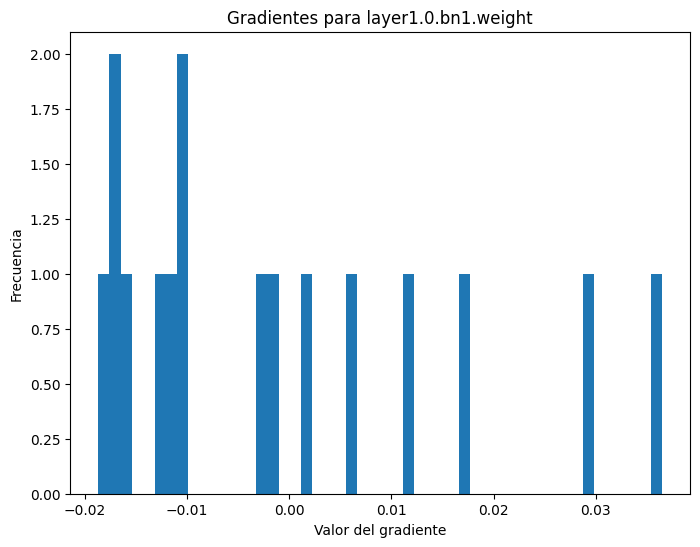

Gradientes para layer1.0.bn1.bias: min=-0.01703992299735546, max=0.02138797752559185, mean=0.002471423475071788, std=0.012579982168972492


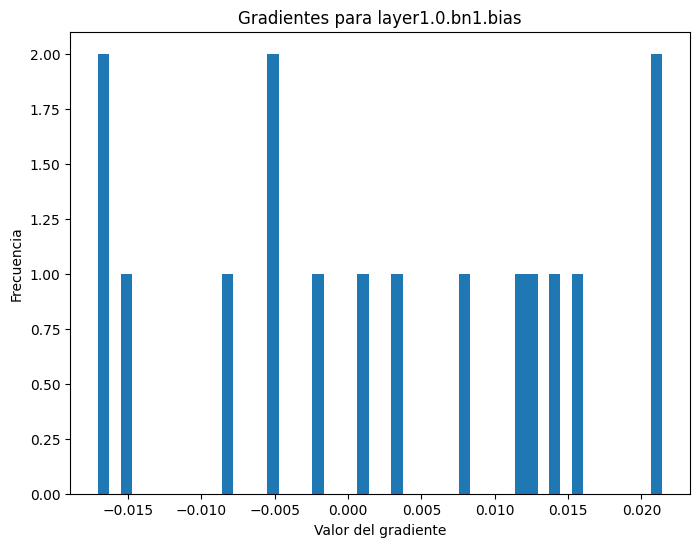

Gradientes para layer2.8.conv1.weight: min=-0.008411848917603493, max=0.0114601980894804, mean=-6.435119576053694e-05, std=0.001968204975128174


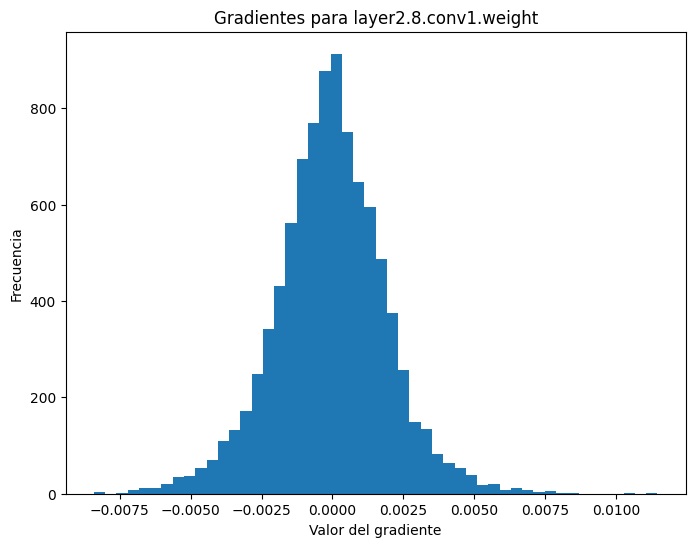

Gradientes para layer2.8.bn1.weight: min=-0.01567033864557743, max=0.014490933157503605, mean=8.746125968173146e-05, std=0.0046046702191233635


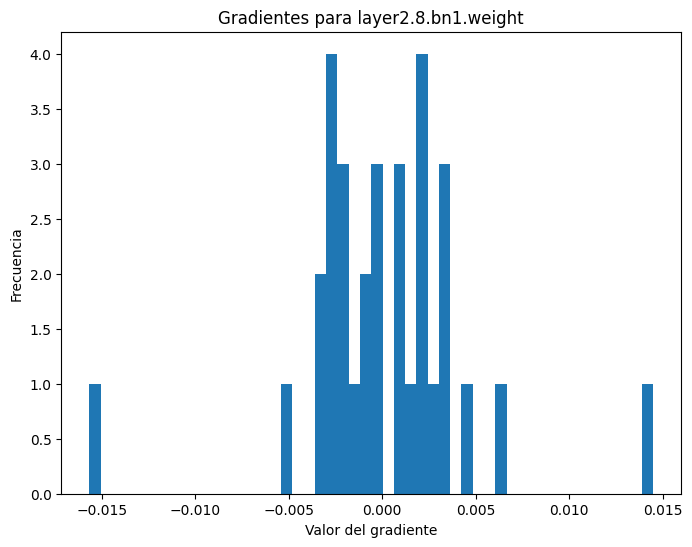

Gradientes para layer2.8.bn1.bias: min=-0.009182014502584934, max=0.006199858151376247, mean=-2.841500099748373e-05, std=0.003333441214635968


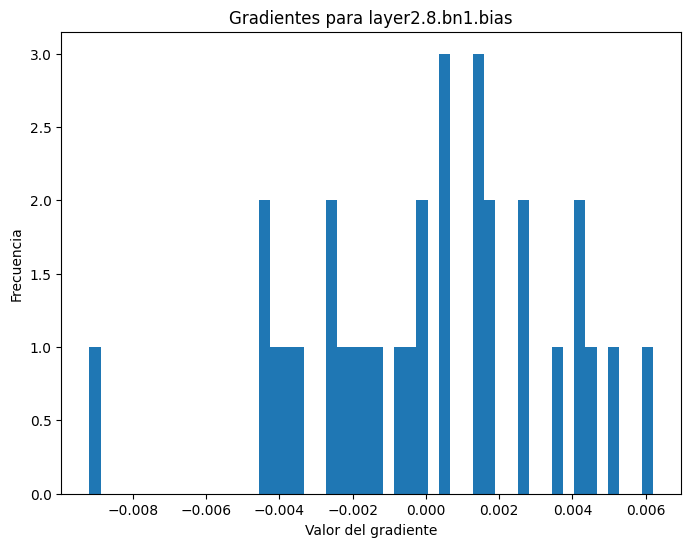

Gradientes para linear.weight: min=-0.07246319949626923, max=0.06231960654258728, mean=7.450580707946131e-10, std=0.017702117562294006


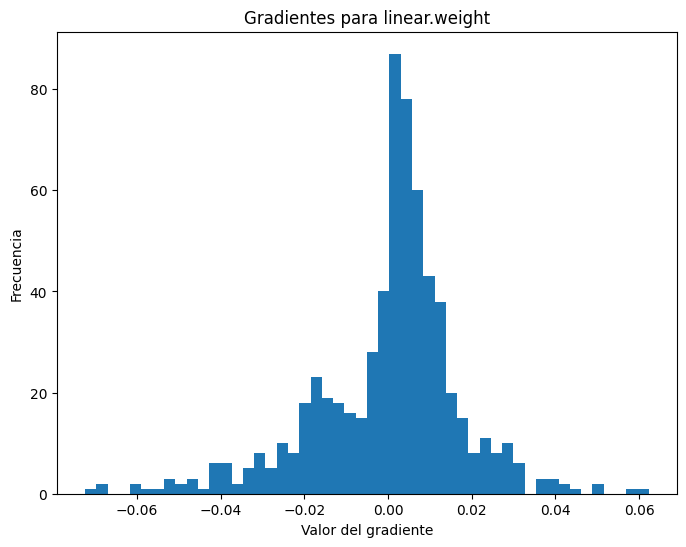

Gradientes para linear.bias: min=-0.038366589695215225, max=0.025791719555854797, mean=1.862645149230957e-09, std=0.01995781436562538


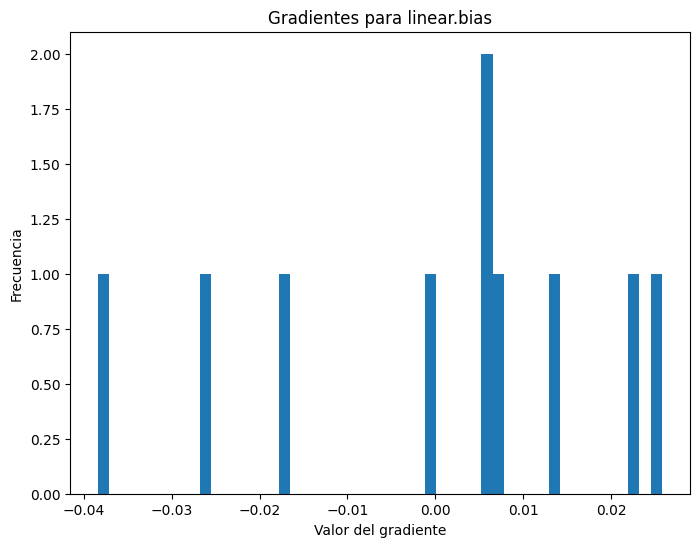

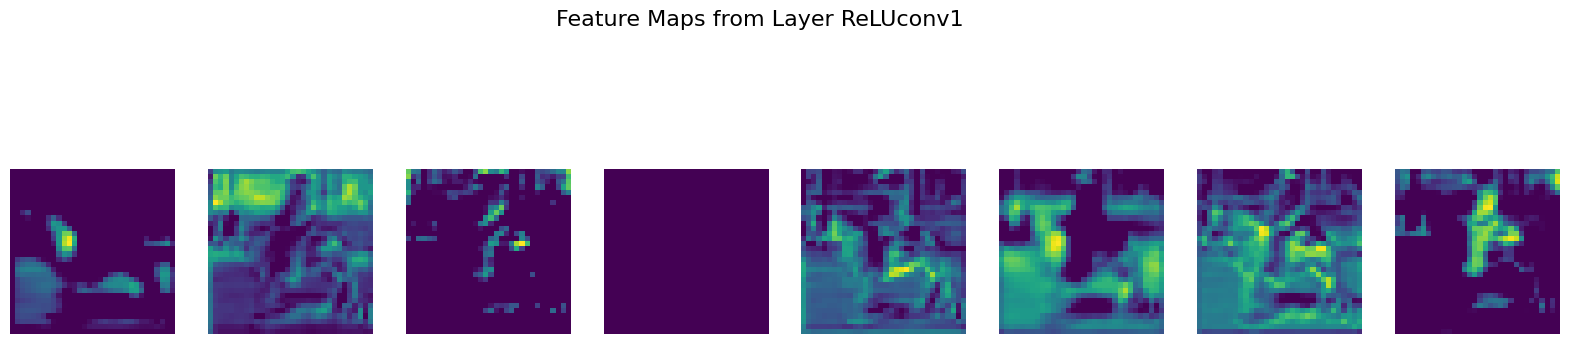

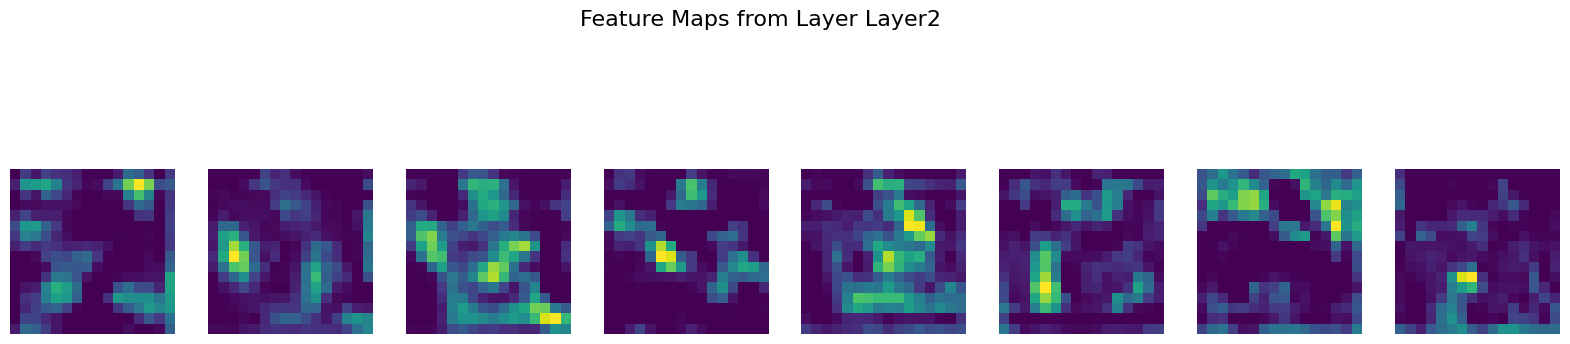

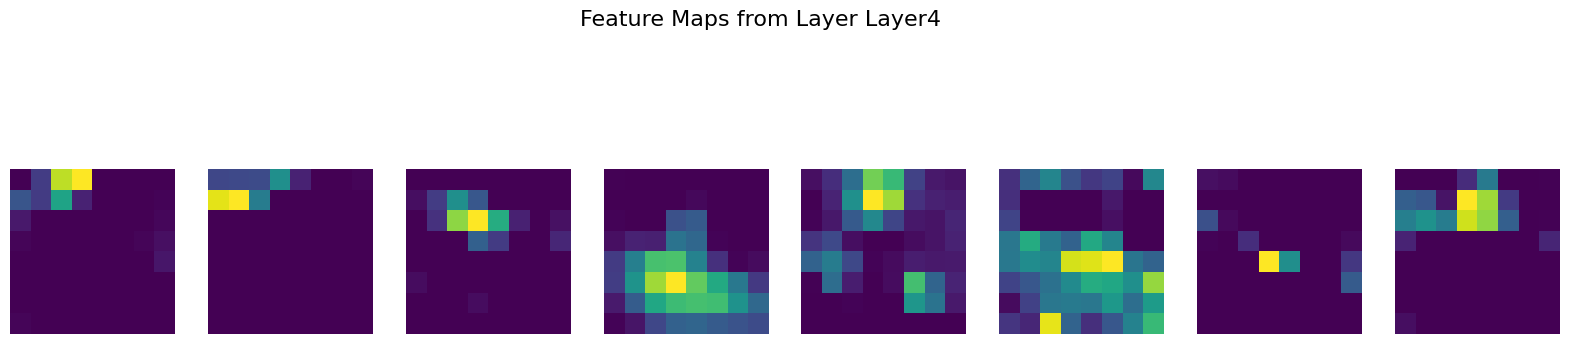

0.004
Epoch 41/70
Iteración 14115 - Lote 35/352 - Pérdida de Entrenamiento: 0.3472, Precisión de Entrenamiento: 0.8801
Iteración 14150 - Lote 70/352 - Pérdida de Entrenamiento: 0.3634, Precisión de Entrenamiento: 0.8767
Iteración 14185 - Lote 105/352 - Pérdida de Entrenamiento: 0.3609, Precisión de Entrenamiento: 0.8754
Iteración 14220 - Lote 140/352 - Pérdida de Entrenamiento: 0.3592, Precisión de Entrenamiento: 0.8761
Iteración 14255 - Lote 175/352 - Pérdida de Entrenamiento: 0.3602, Precisión de Entrenamiento: 0.8756
Iteración 14290 - Lote 210/352 - Pérdida de Entrenamiento: 0.3614, Precisión de Entrenamiento: 0.8750
Iteración 14325 - Lote 245/352 - Pérdida de Entrenamiento: 0.3634, Precisión de Entrenamiento: 0.8747
Iteración 14360 - Lote 280/352 - Pérdida de Entrenamiento: 0.3627, Precisión de Entrenamiento: 0.8748
Iteración 14395 - Lote 315/352 - Pérdida de Entrenamiento: 0.3650, Precisión de Entrenamiento: 0.8743
Iteración 14430 - Lote 350/352 - Pérdida de Entrenamiento: 0.3673,

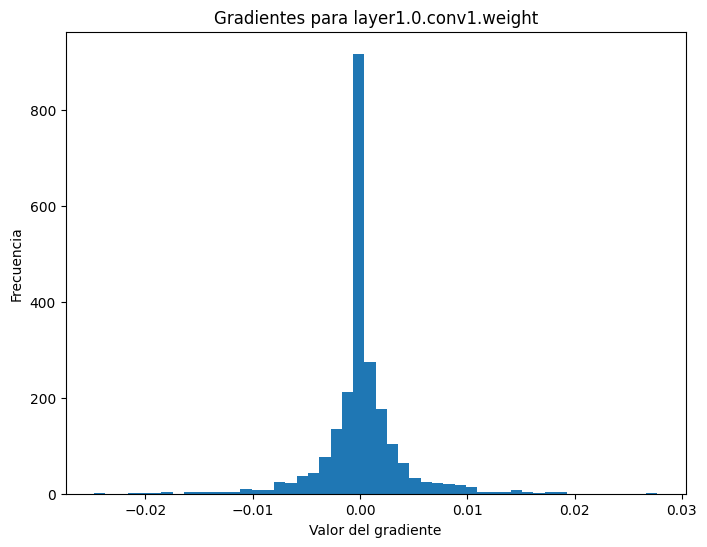

Gradientes para layer1.0.bn1.weight: min=-0.01839691586792469, max=0.022963054478168488, mean=-0.0012267824495211244, std=0.010997406207025051


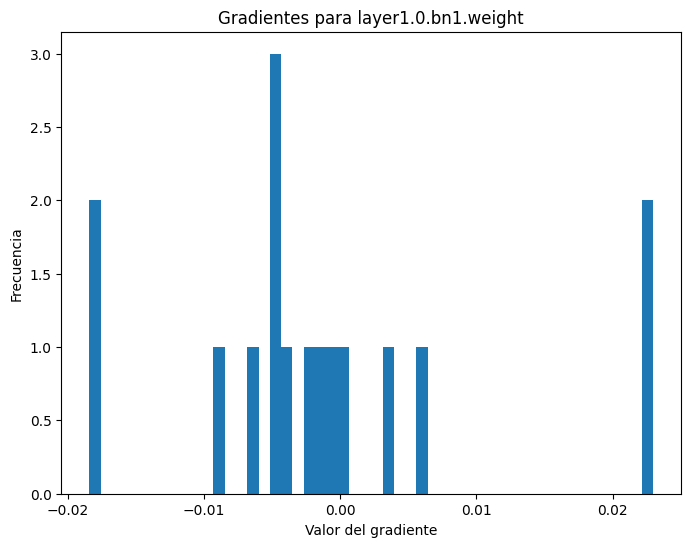

Gradientes para layer1.0.bn1.bias: min=-0.021575361490249634, max=0.025548914447426796, mean=0.002460120478644967, std=0.011431263759732246


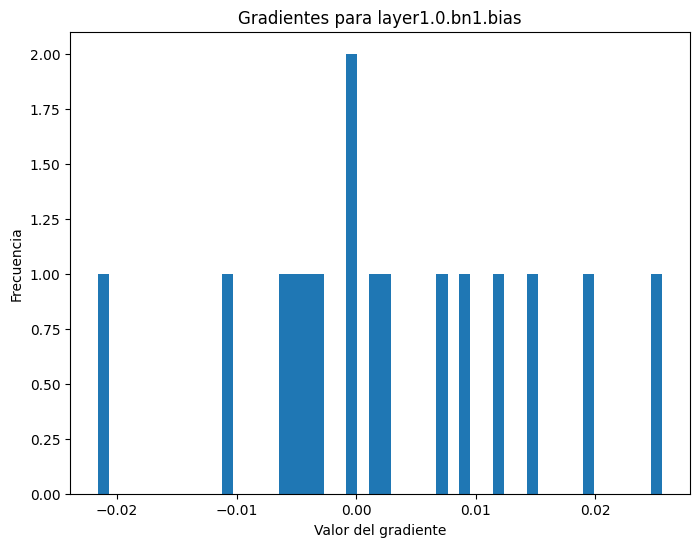

Gradientes para linear.weight: min=-0.03987817466259003, max=0.03258639574050903, mean=-3.7252903539730653e-10, std=0.010883990675210953


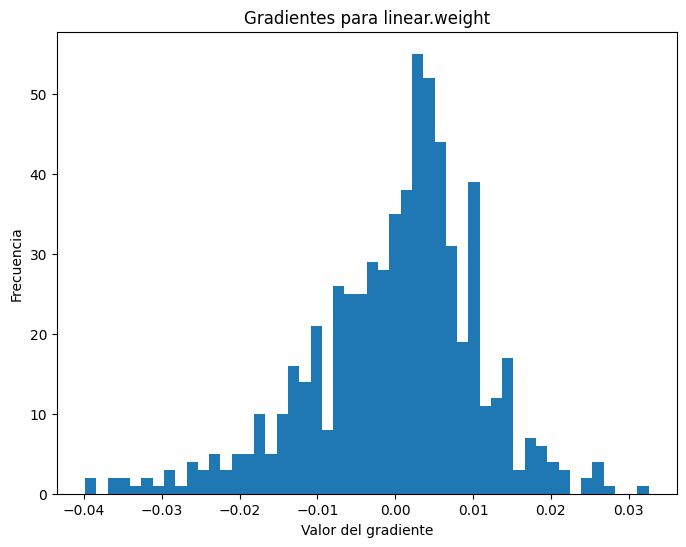

Gradientes para linear.bias: min=-0.01636909879744053, max=0.014266724698245525, mean=-5.587935669737476e-10, std=0.009547718800604343


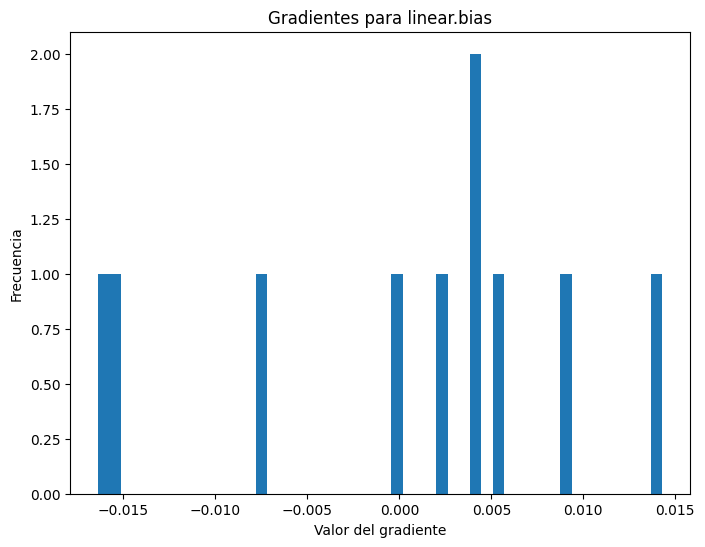

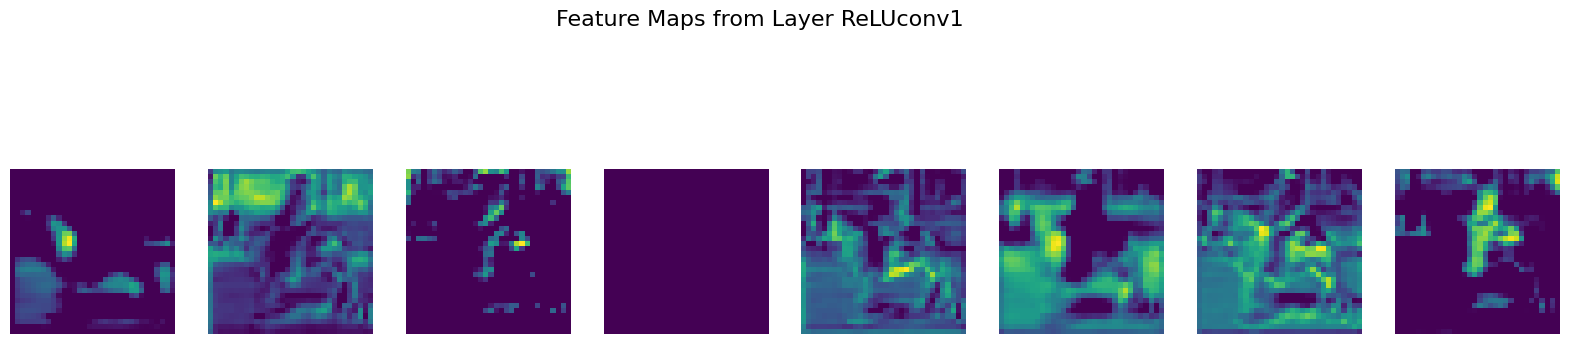

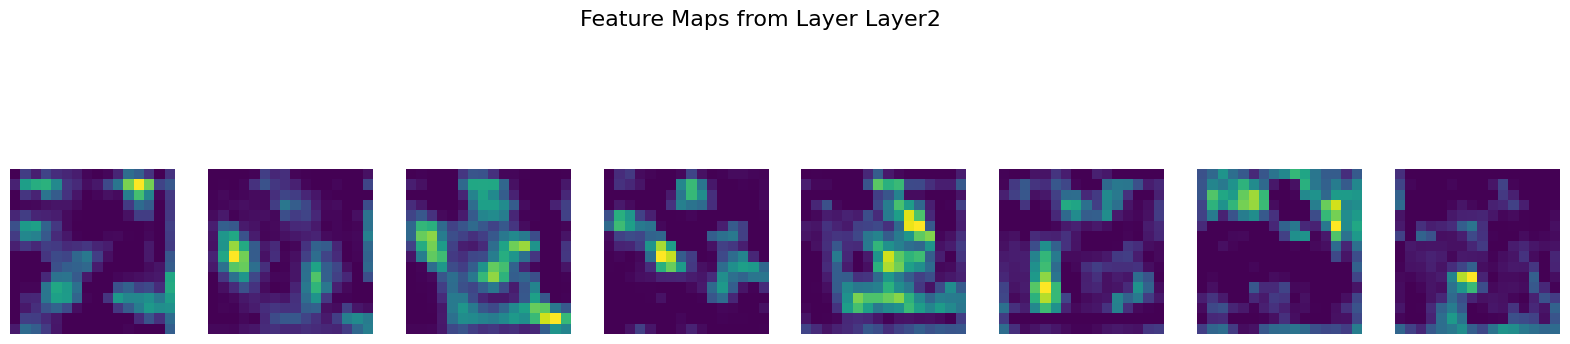

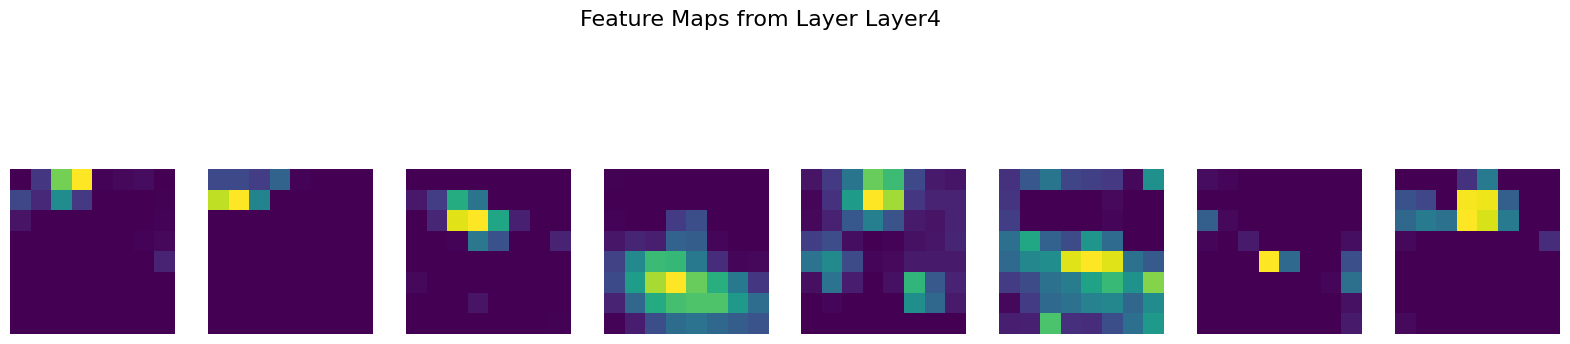

0.0004
Epoch 46/70
Iteración 15875 - Lote 35/352 - Pérdida de Entrenamiento: 0.3451, Precisión de Entrenamiento: 0.8768
Iteración 15910 - Lote 70/352 - Pérdida de Entrenamiento: 0.3563, Precisión de Entrenamiento: 0.8748
Iteración 15945 - Lote 105/352 - Pérdida de Entrenamiento: 0.3546, Precisión de Entrenamiento: 0.8743
Iteración 15980 - Lote 140/352 - Pérdida de Entrenamiento: 0.3528, Precisión de Entrenamiento: 0.8755
Iteración 16015 - Lote 175/352 - Pérdida de Entrenamiento: 0.3511, Precisión de Entrenamiento: 0.8770
Iteración 16050 - Lote 210/352 - Pérdida de Entrenamiento: 0.3509, Precisión de Entrenamiento: 0.8774
Iteración 16085 - Lote 245/352 - Pérdida de Entrenamiento: 0.3505, Precisión de Entrenamiento: 0.8779
Iteración 16120 - Lote 280/352 - Pérdida de Entrenamiento: 0.3513, Precisión de Entrenamiento: 0.8781
Iteración 16155 - Lote 315/352 - Pérdida de Entrenamiento: 0.3502, Precisión de Entrenamiento: 0.8786
Iteración 16190 - Lote 350/352 - Pérdida de Entrenamiento: 0.3526

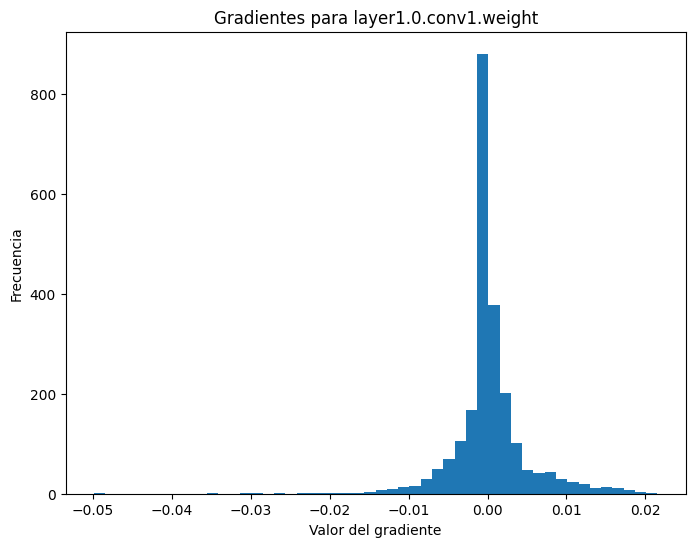

Gradientes para layer1.0.bn1.weight: min=-0.0460430309176445, max=0.022854845970869064, mean=0.0028256424702703953, std=0.018140949308872223


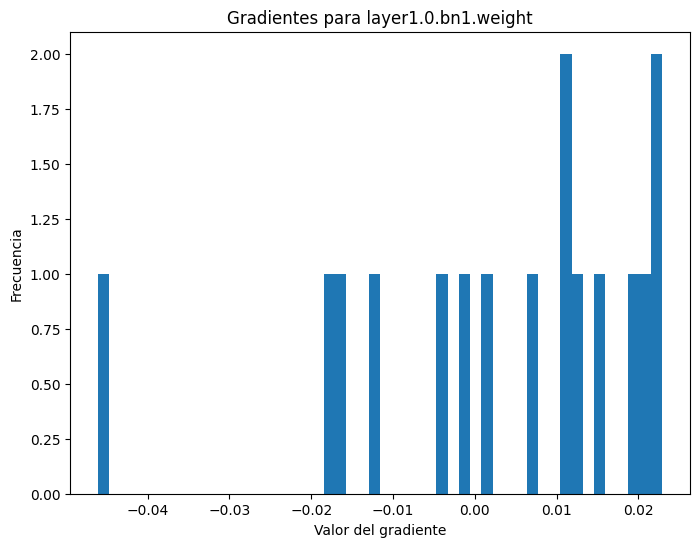

Gradientes para layer1.0.bn1.bias: min=-0.03408347815275192, max=0.02961713634431362, mean=0.0039026751182973385, std=0.016427481546998024


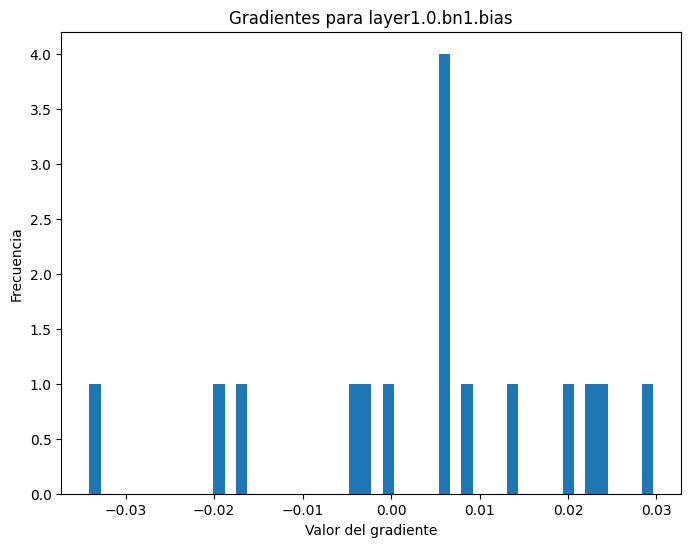

Gradientes para linear.weight: min=-0.0664464682340622, max=0.06919052451848984, mean=9.313225746154785e-10, std=0.015393618494272232


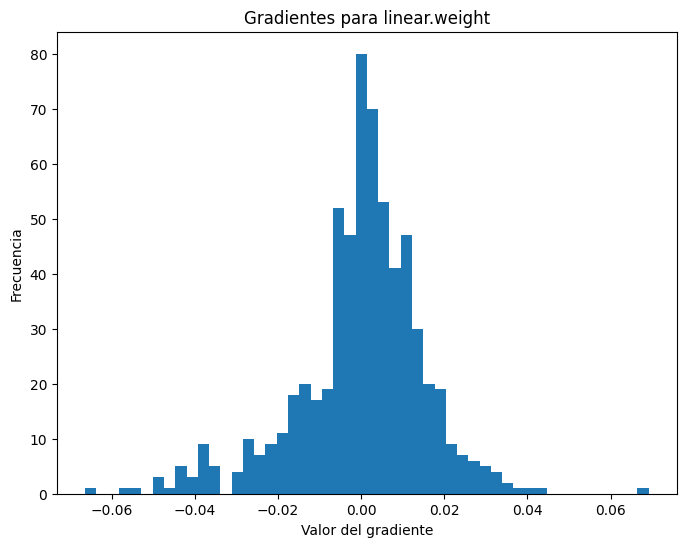

Gradientes para linear.bias: min=-0.04272491857409477, max=0.024518616497516632, mean=2.1420418772066796e-09, std=0.018440233543515205


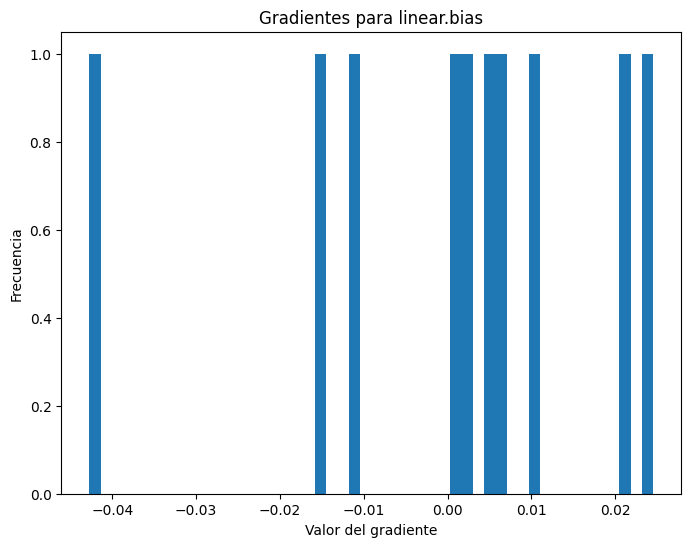

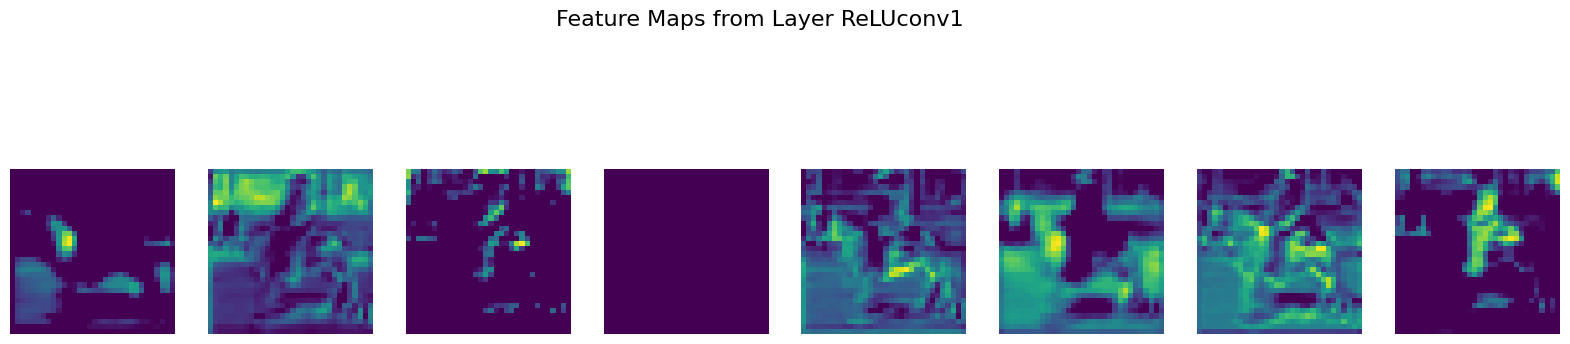

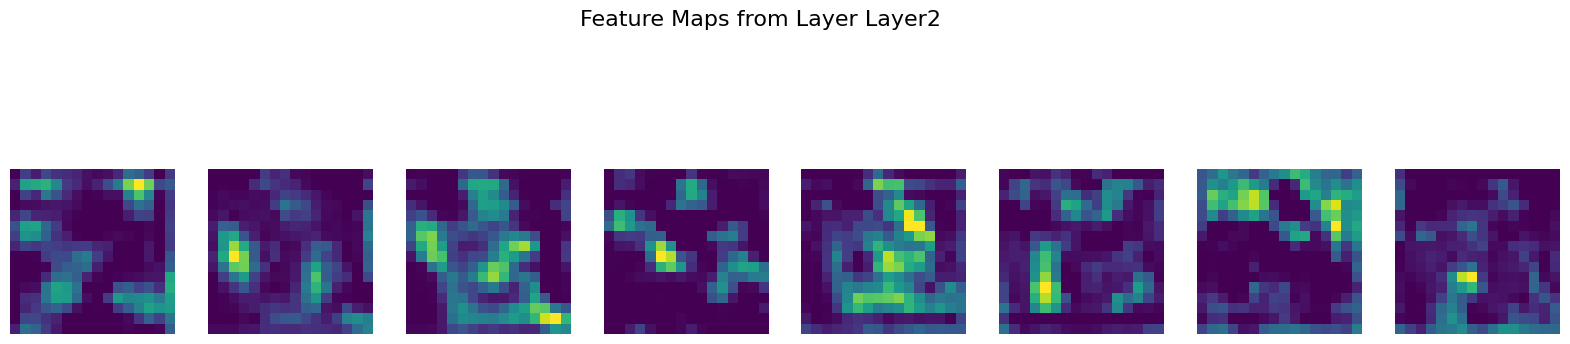

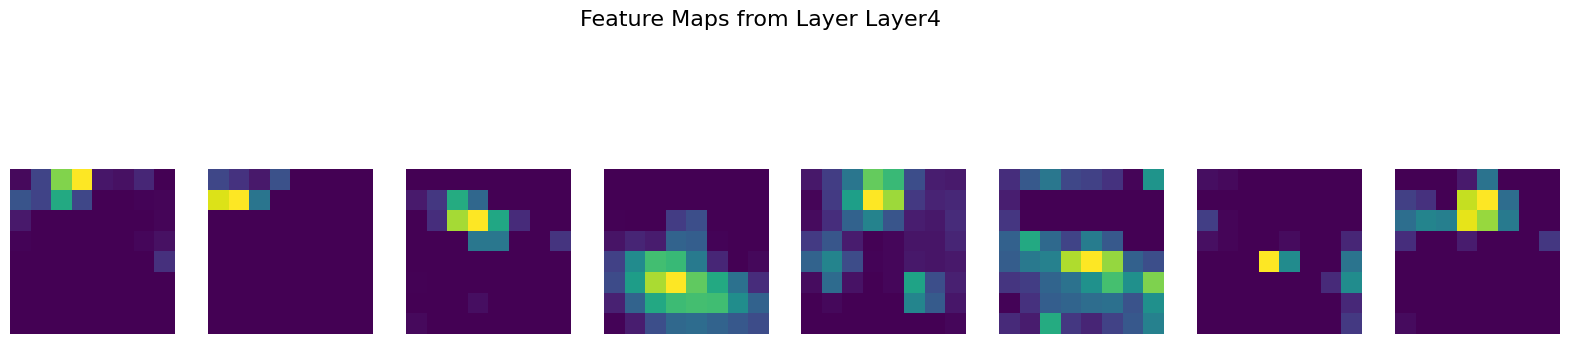

0.0004
Epoch 51/70
Iteración 17635 - Lote 35/352 - Pérdida de Entrenamiento: 0.3618, Precisión de Entrenamiento: 0.8690
Iteración 17670 - Lote 70/352 - Pérdida de Entrenamiento: 0.3552, Precisión de Entrenamiento: 0.8766
Iteración 17705 - Lote 105/352 - Pérdida de Entrenamiento: 0.3457, Precisión de Entrenamiento: 0.8802
Iteración 17740 - Lote 140/352 - Pérdida de Entrenamiento: 0.3452, Precisión de Entrenamiento: 0.8802
Iteración 17775 - Lote 175/352 - Pérdida de Entrenamiento: 0.3497, Precisión de Entrenamiento: 0.8778
Iteración 17810 - Lote 210/352 - Pérdida de Entrenamiento: 0.3515, Precisión de Entrenamiento: 0.8781
Iteración 17845 - Lote 245/352 - Pérdida de Entrenamiento: 0.3539, Precisión de Entrenamiento: 0.8773
Iteración 17880 - Lote 280/352 - Pérdida de Entrenamiento: 0.3521, Precisión de Entrenamiento: 0.8780
Iteración 17915 - Lote 315/352 - Pérdida de Entrenamiento: 0.3486, Precisión de Entrenamiento: 0.8793
Iteración 17950 - Lote 350/352 - Pérdida de Entrenamiento: 0.3498

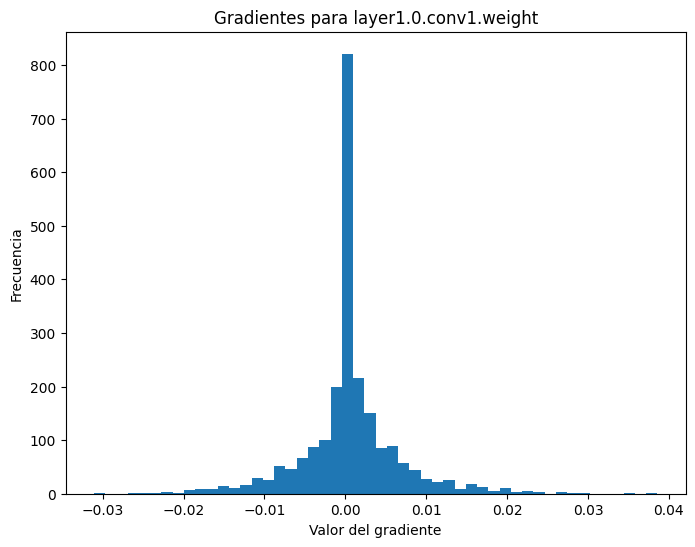

Gradientes para layer1.0.bn1.weight: min=-0.0464133583009243, max=0.06433138996362686, mean=-0.00304359826259315, std=0.02763945236802101


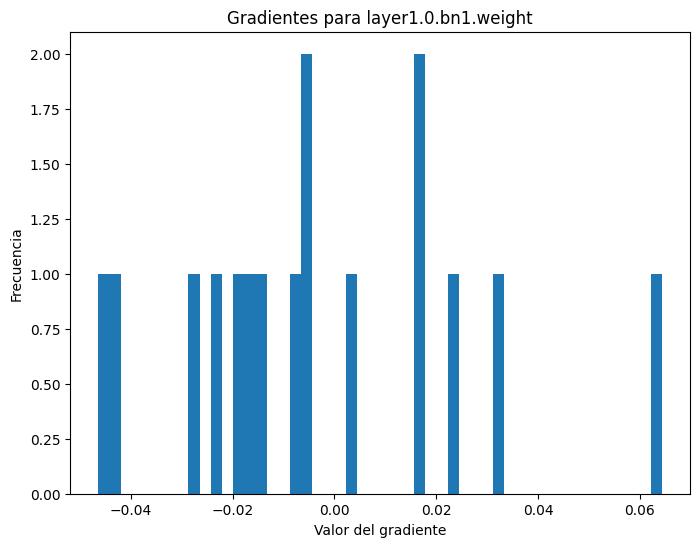

Gradientes para layer1.0.bn1.bias: min=-0.02924666553735733, max=0.018017124384641647, mean=-0.007877391763031483, std=0.014424844644963741


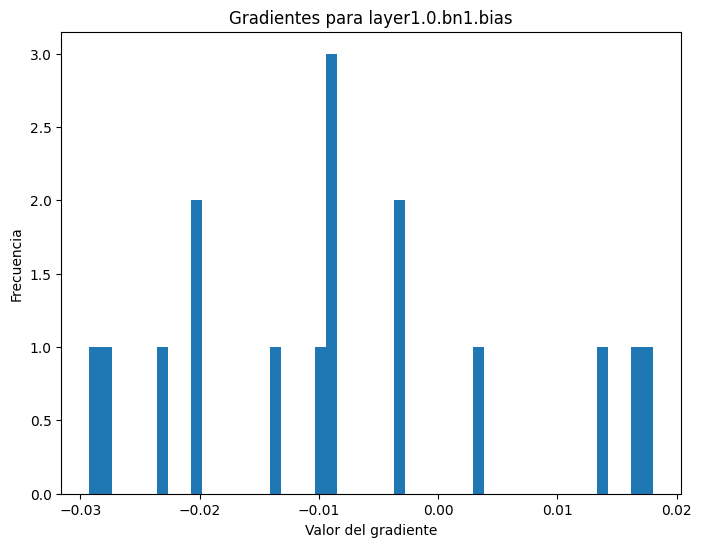

Gradientes para layer2.8.conv1.weight: min=-0.01640368066728115, max=0.022413188591599464, mean=-7.033425208646804e-05, std=0.003263054648414254


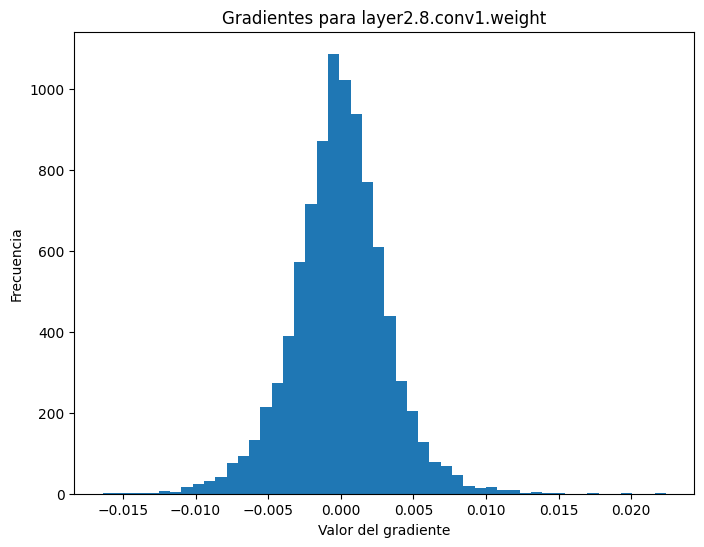

Gradientes para layer2.8.bn1.weight: min=-0.029218794777989388, max=0.018614720553159714, mean=-0.00011374535097274929, std=0.009220477193593979


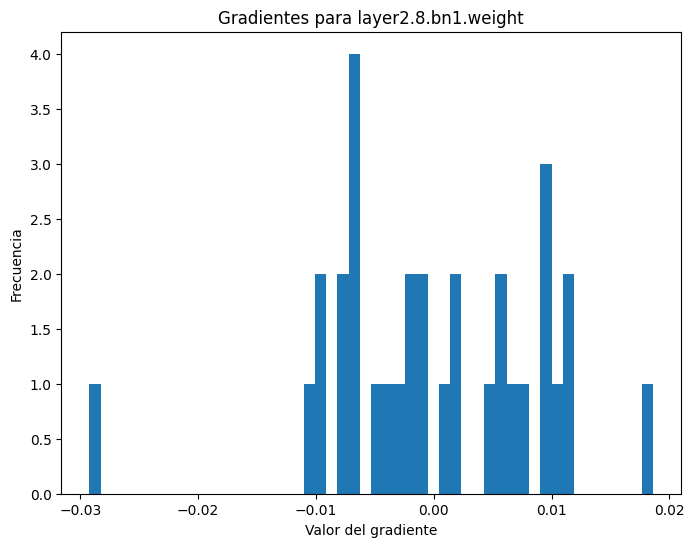

Gradientes para layer2.8.bn1.bias: min=-0.01927637681365013, max=0.013277353718876839, mean=1.5372701454907656e-05, std=0.007427943870425224


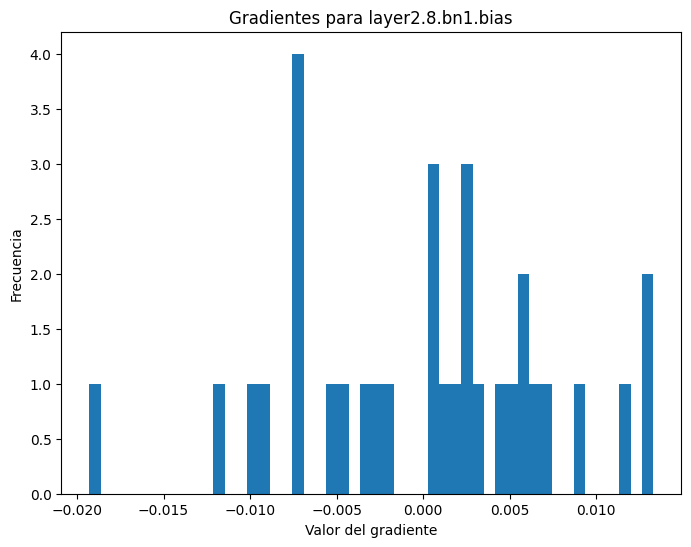

Gradientes para linear.weight: min=-0.05017262324690819, max=0.040886279195547104, mean=4.656612873077393e-10, std=0.012319821864366531


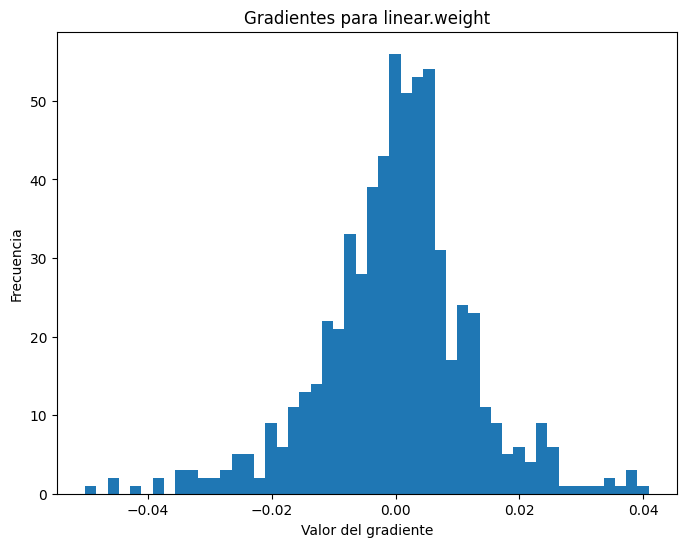

Gradientes para linear.bias: min=-0.020483316853642464, max=0.021257266402244568, mean=1.0244548542814869e-09, std=0.01086049061268568


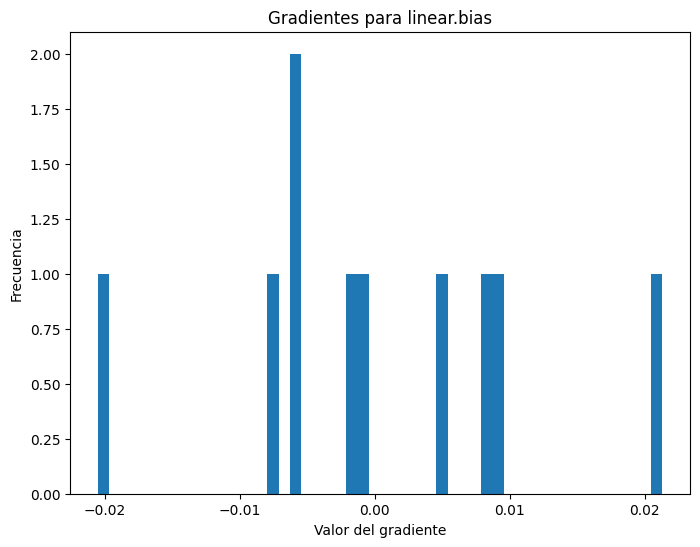

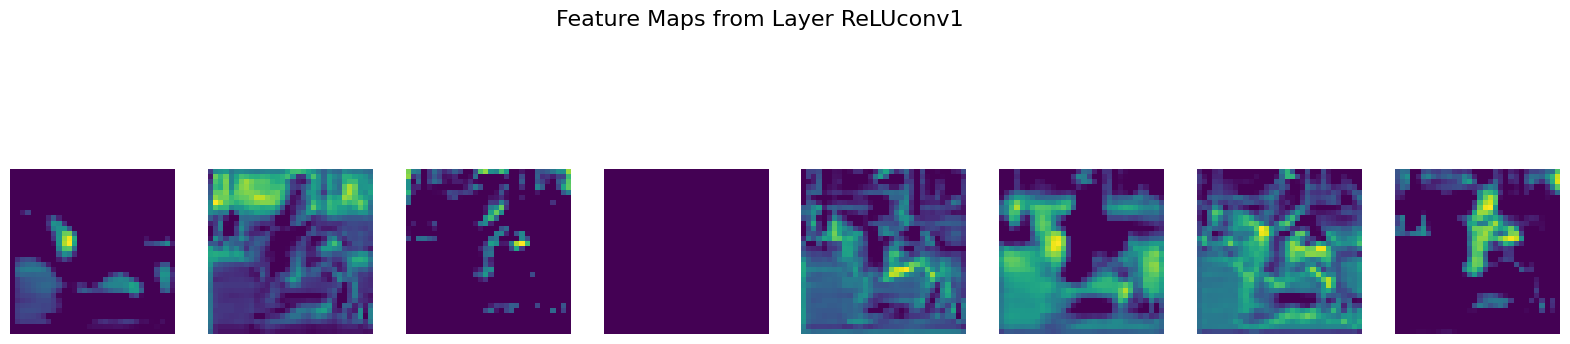

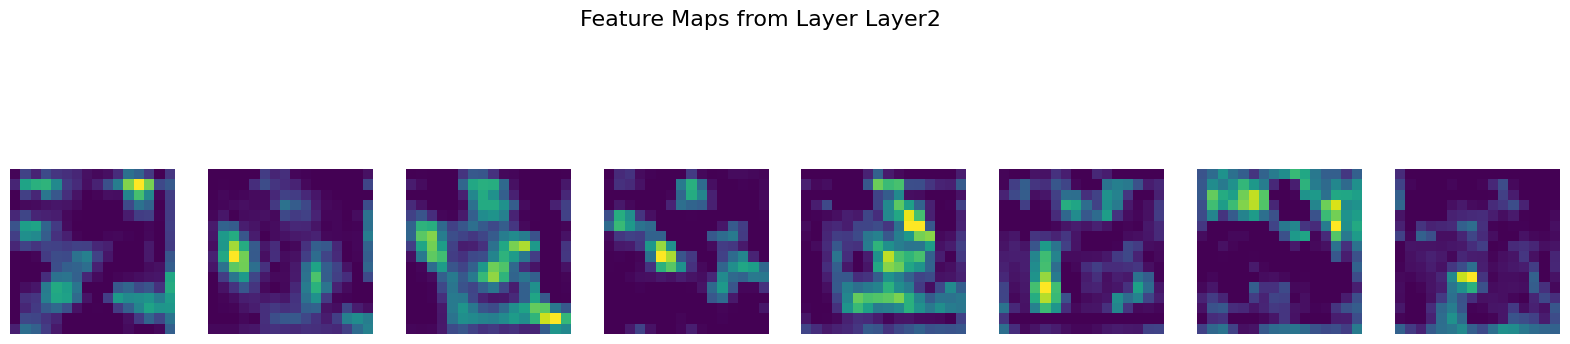

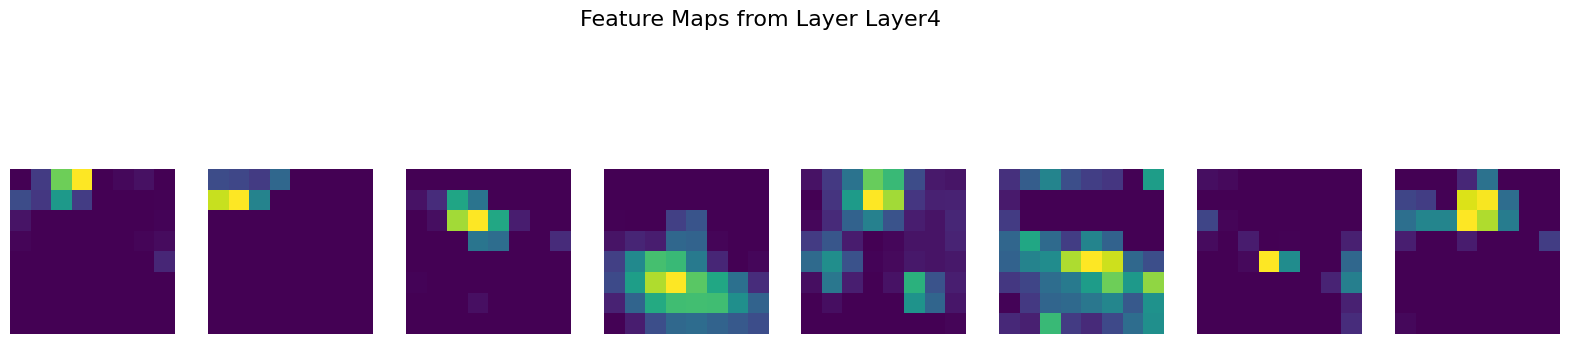

4e-05
Epoch 56/70
Iteración 19395 - Lote 35/352 - Pérdida de Entrenamiento: 0.3488, Precisión de Entrenamiento: 0.8770
Iteración 19430 - Lote 70/352 - Pérdida de Entrenamiento: 0.3437, Precisión de Entrenamiento: 0.8796
Iteración 19465 - Lote 105/352 - Pérdida de Entrenamiento: 0.3365, Precisión de Entrenamiento: 0.8812
Iteración 19500 - Lote 140/352 - Pérdida de Entrenamiento: 0.3440, Precisión de Entrenamiento: 0.8805
Iteración 19535 - Lote 175/352 - Pérdida de Entrenamiento: 0.3446, Precisión de Entrenamiento: 0.8796
Iteración 19570 - Lote 210/352 - Pérdida de Entrenamiento: 0.3457, Precisión de Entrenamiento: 0.8797
Iteración 19605 - Lote 245/352 - Pérdida de Entrenamiento: 0.3455, Precisión de Entrenamiento: 0.8797
Iteración 19640 - Lote 280/352 - Pérdida de Entrenamiento: 0.3459, Precisión de Entrenamiento: 0.8796
Iteración 19675 - Lote 315/352 - Pérdida de Entrenamiento: 0.3461, Precisión de Entrenamiento: 0.8801
Iteración 19710 - Lote 350/352 - Pérdida de Entrenamiento: 0.3439,

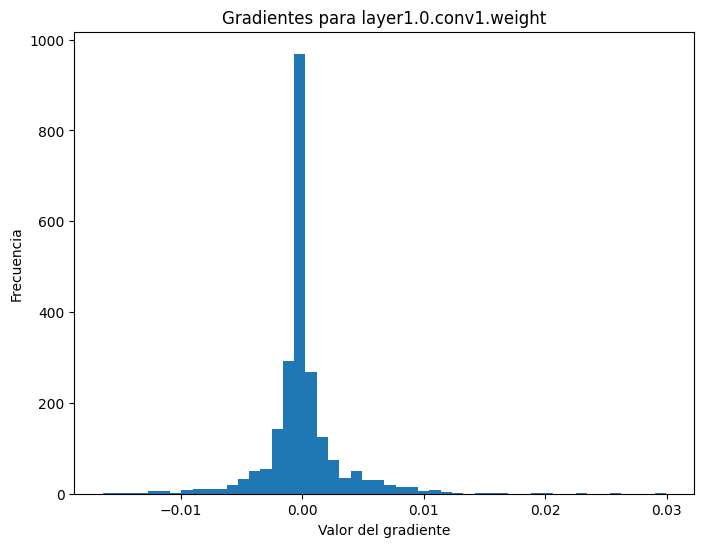

Gradientes para layer1.0.bn1.weight: min=-0.029710715636610985, max=0.013074375689029694, mean=-0.00012720469385385513, std=0.010229312814772129


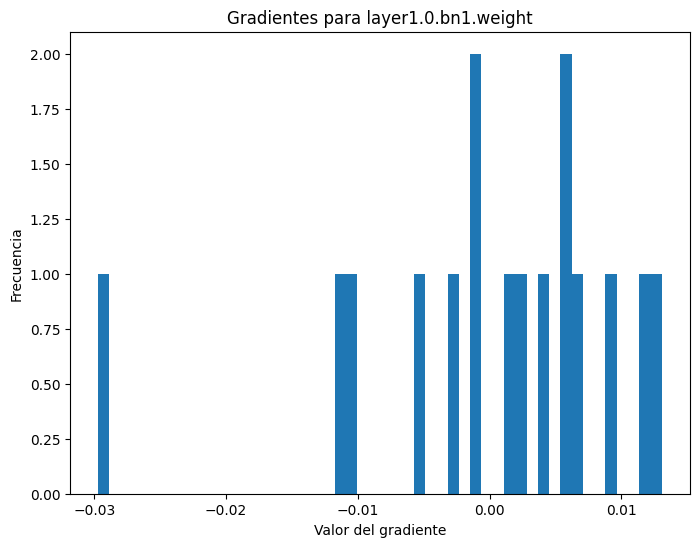

Gradientes para layer1.0.bn1.bias: min=-0.013299360871315002, max=0.012045754119753838, mean=-0.0015538756269961596, std=0.0074391476809978485


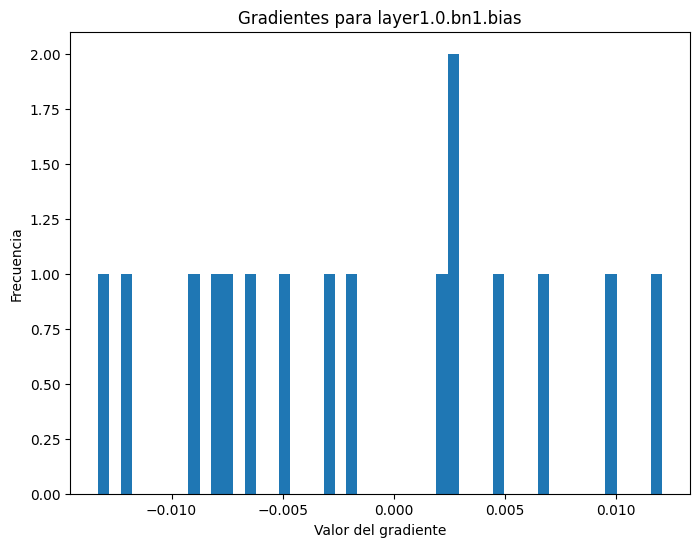

Gradientes para layer2.8.conv1.weight: min=-0.012082118541002274, max=0.013274408876895905, mean=3.928612932213582e-05, std=0.001983929891139269


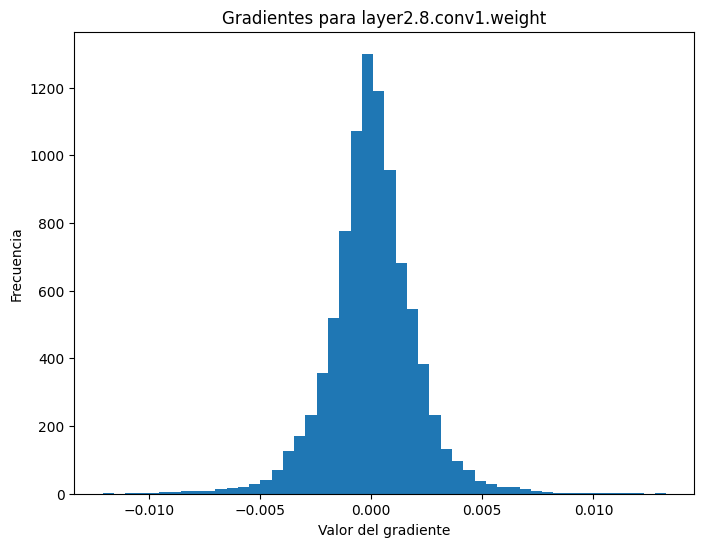

Gradientes para layer2.8.bn1.weight: min=-0.013143387623131275, max=0.012483732774853706, mean=3.944092895835638e-06, std=0.004790604114532471


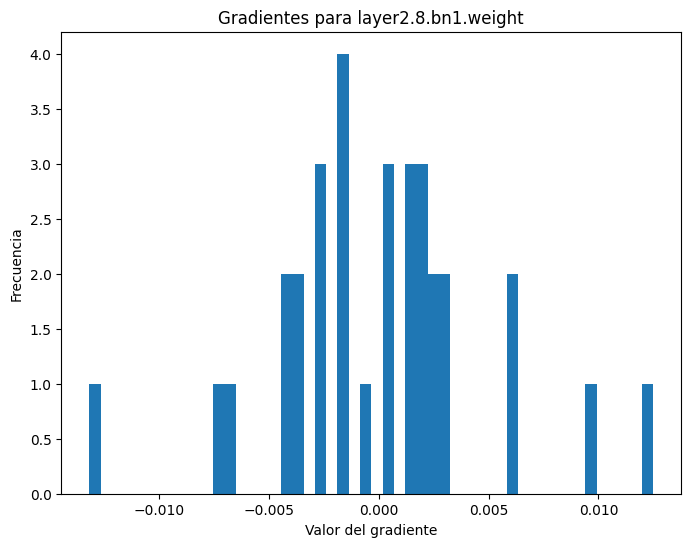

Gradientes para layer2.8.bn1.bias: min=-0.014206469058990479, max=0.007959429174661636, mean=-0.0004172801855020225, std=0.00455055758357048


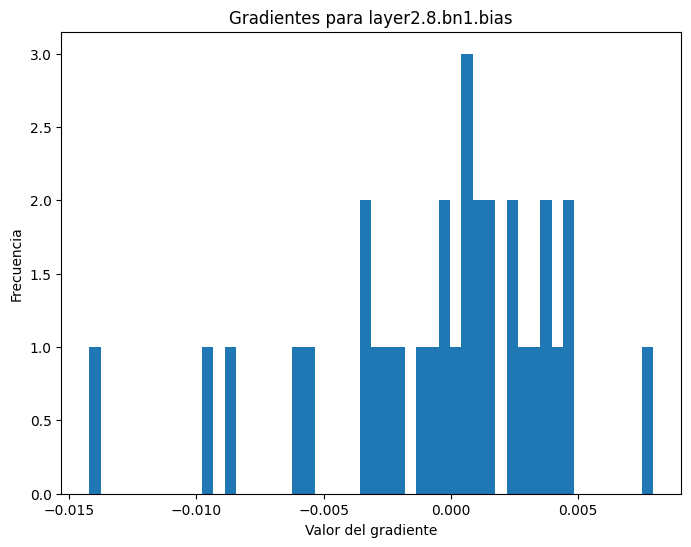

Gradientes para linear.weight: min=-0.030751198530197144, max=0.030115950852632523, mean=1.4435499462450707e-09, std=0.007155638188123703


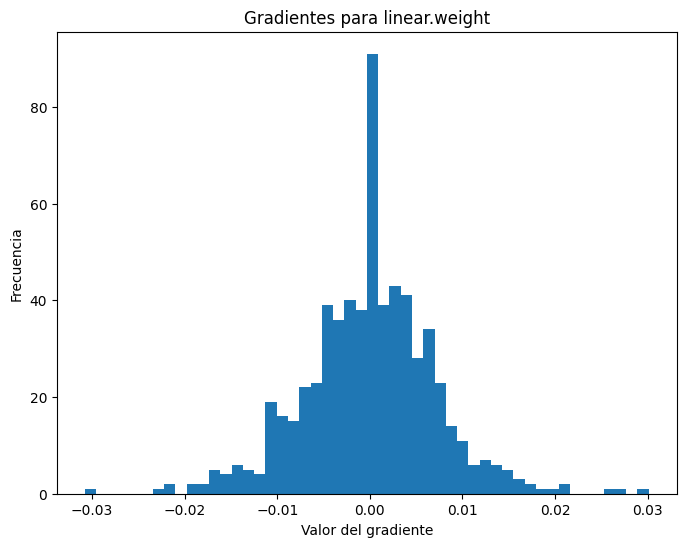

Gradientes para linear.bias: min=-0.010971884243190289, max=0.014246020466089249, mean=1.7695128695649487e-09, std=0.008005470968782902


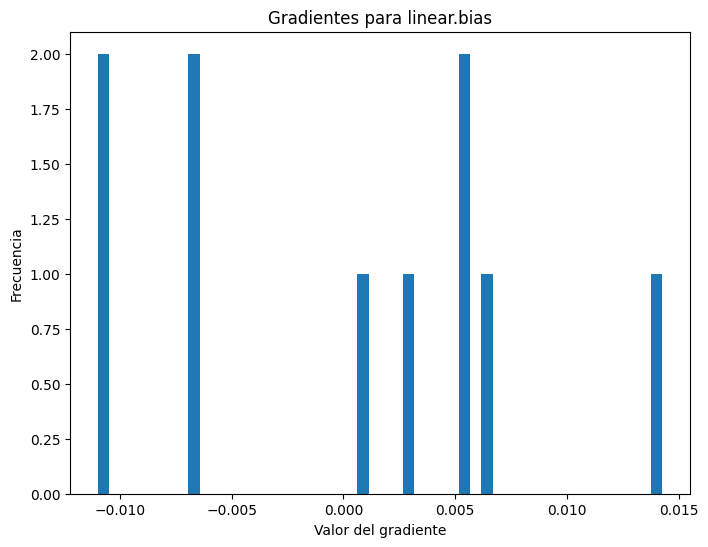

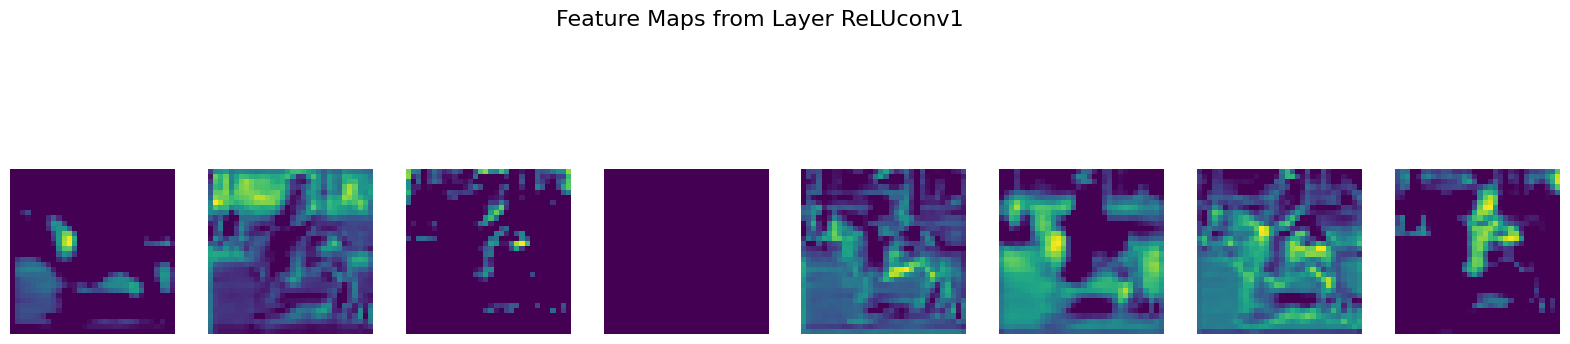

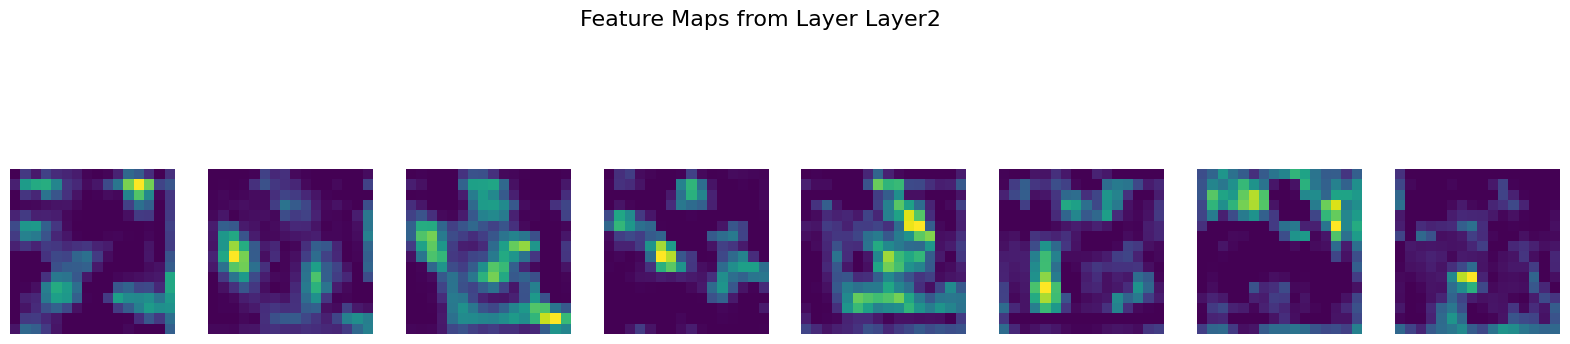

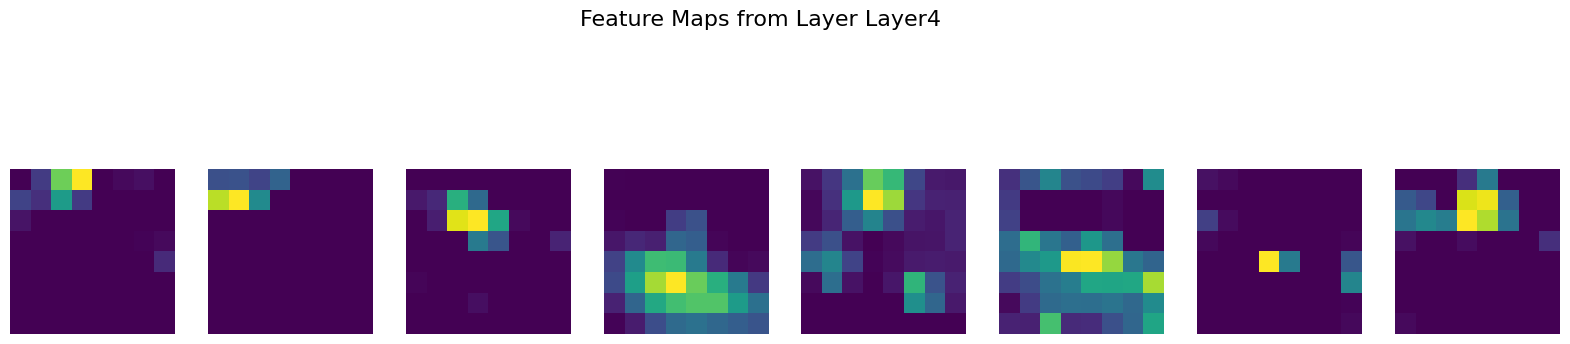

4.000000000000001e-07
Epoch 61/70
Iteración 21155 - Lote 35/352 - Pérdida de Entrenamiento: 0.3462, Precisión de Entrenamiento: 0.8808
Iteración 21190 - Lote 70/352 - Pérdida de Entrenamiento: 0.3391, Precisión de Entrenamiento: 0.8815
Iteración 21225 - Lote 105/352 - Pérdida de Entrenamiento: 0.3440, Precisión de Entrenamiento: 0.8821
Iteración 21260 - Lote 140/352 - Pérdida de Entrenamiento: 0.3462, Precisión de Entrenamiento: 0.8807
Iteración 21295 - Lote 175/352 - Pérdida de Entrenamiento: 0.3467, Precisión de Entrenamiento: 0.8800
Iteración 21330 - Lote 210/352 - Pérdida de Entrenamiento: 0.3473, Precisión de Entrenamiento: 0.8803
Iteración 21365 - Lote 245/352 - Pérdida de Entrenamiento: 0.3494, Precisión de Entrenamiento: 0.8789
Iteración 21400 - Lote 280/352 - Pérdida de Entrenamiento: 0.3482, Precisión de Entrenamiento: 0.8795
Iteración 21435 - Lote 315/352 - Pérdida de Entrenamiento: 0.3477, Precisión de Entrenamiento: 0.8796
Iteración 21470 - Lote 350/352 - Pérdida de Entren

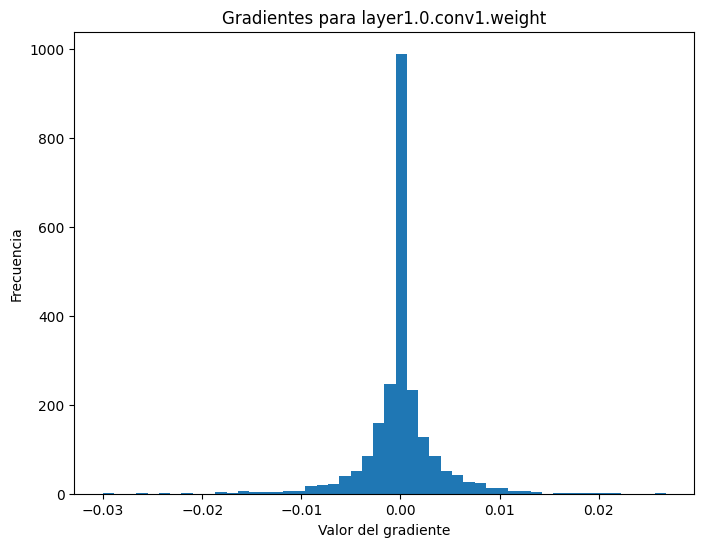

Gradientes para layer1.0.bn1.weight: min=-0.024917911738157272, max=0.018167071044445038, mean=0.0017453463515266776, std=0.011890098452568054


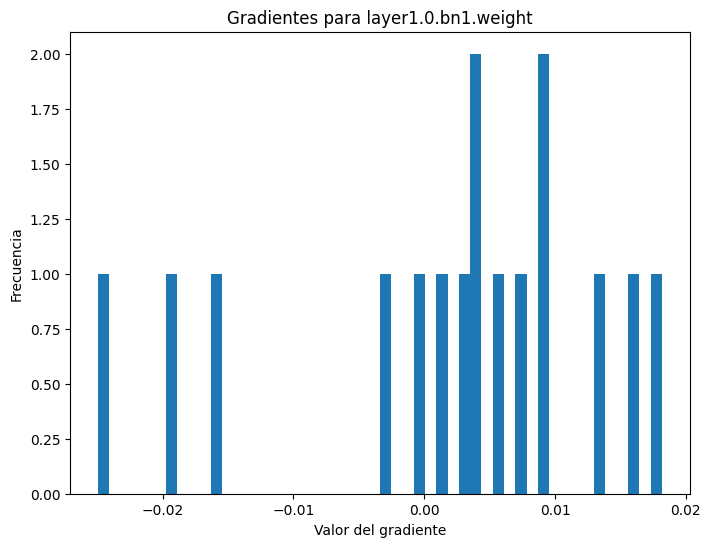

Gradientes para layer1.0.bn1.bias: min=-0.024632325395941734, max=0.01903998851776123, mean=0.002562891226261854, std=0.010807879269123077


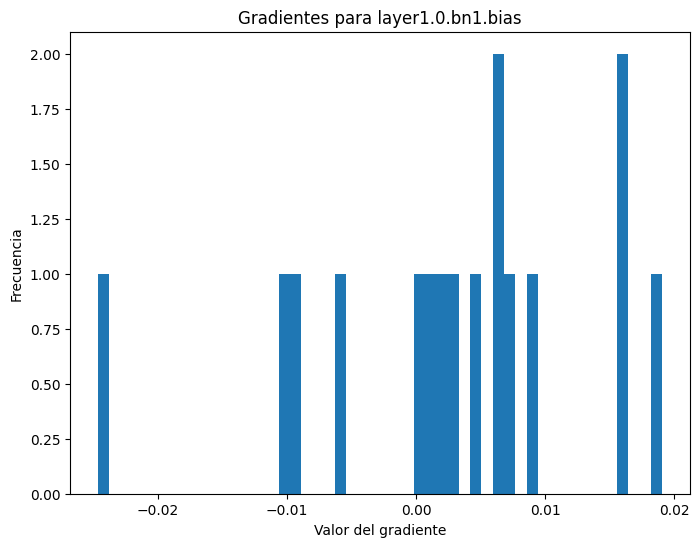

Gradientes para layer2.8.conv1.weight: min=-0.008818996138870716, max=0.008992696180939674, mean=3.00558876915602e-05, std=0.0019138713832944632


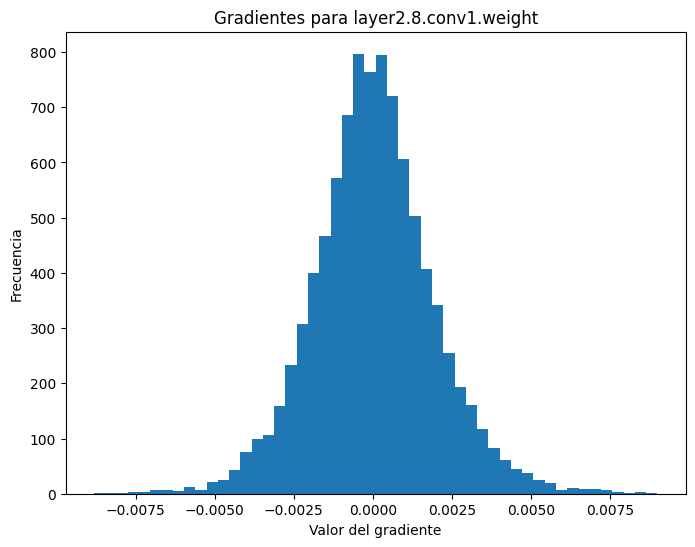

Gradientes para layer2.8.bn1.weight: min=-0.006253188941627741, max=0.007048577535897493, mean=-0.0001005256490316242, std=0.003987802192568779


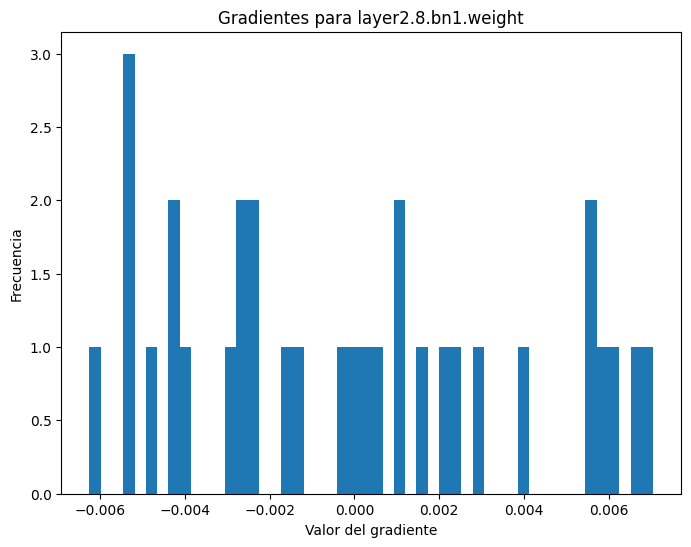

Gradientes para layer2.8.bn1.bias: min=-0.005986897274851799, max=0.006360043305903673, mean=-0.00028214609483256936, std=0.0033375993371009827


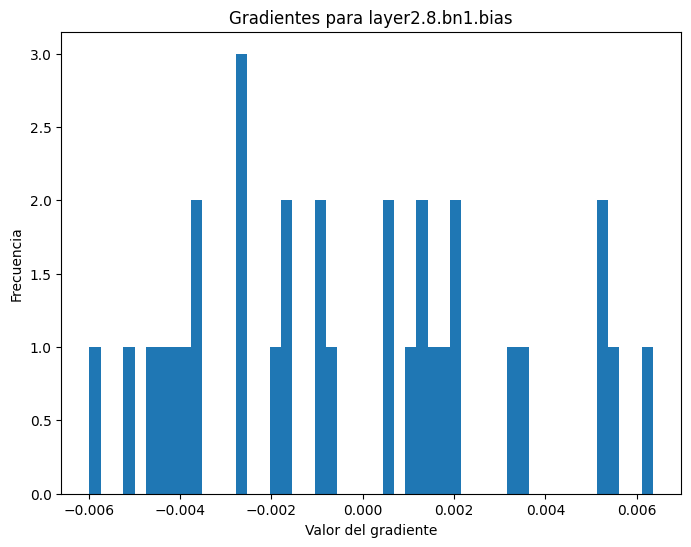

Gradientes para linear.weight: min=-0.07485878467559814, max=0.06728550046682358, mean=9.313225746154785e-10, std=0.018518833443522453


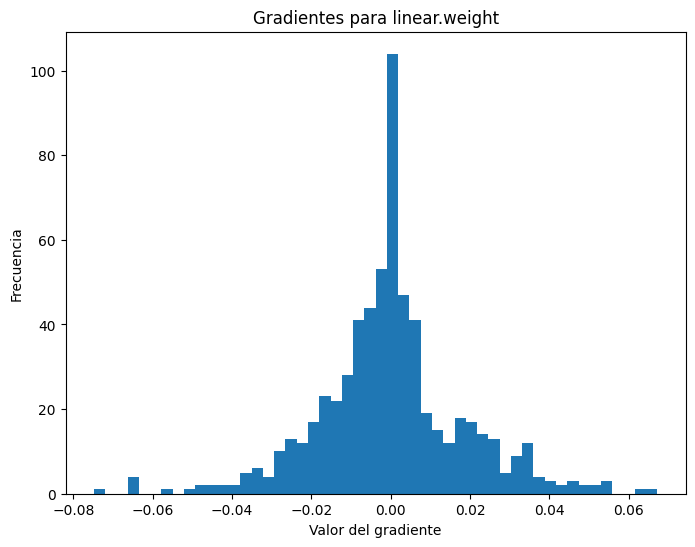

Gradientes para linear.bias: min=-0.0364743210375309, max=0.03275841847062111, mean=1.3969838619232178e-09, std=0.020170822739601135


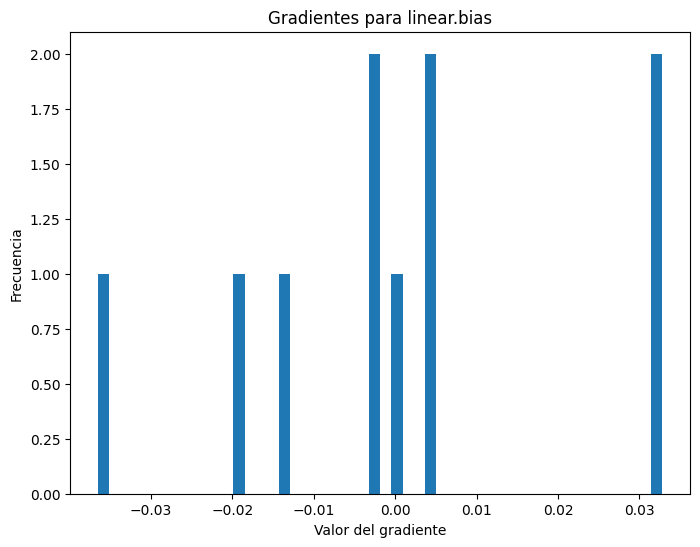

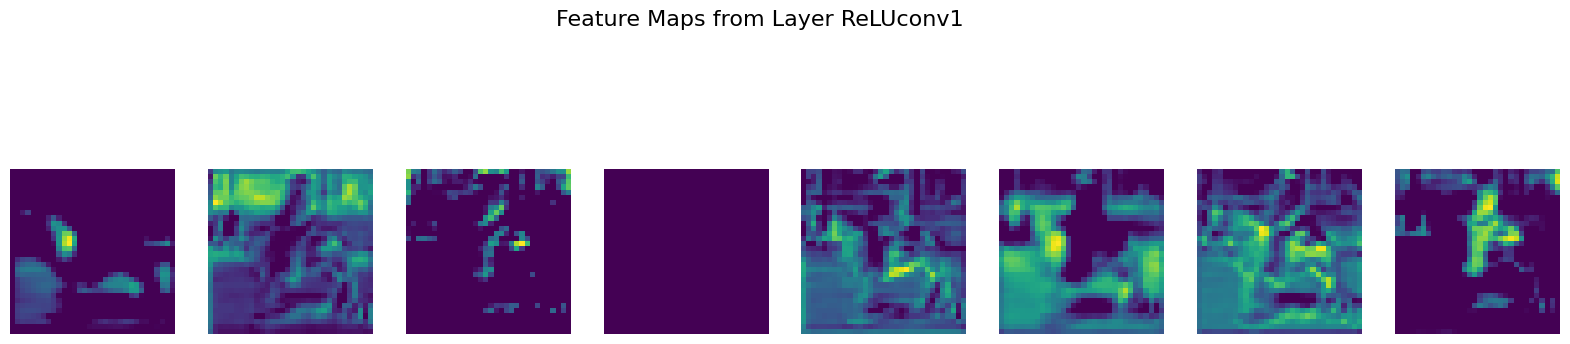

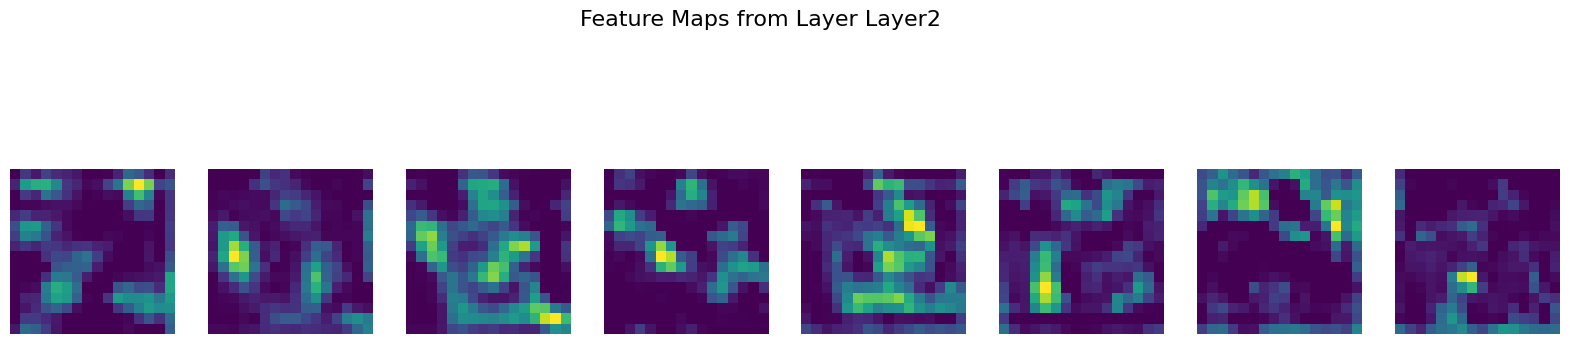

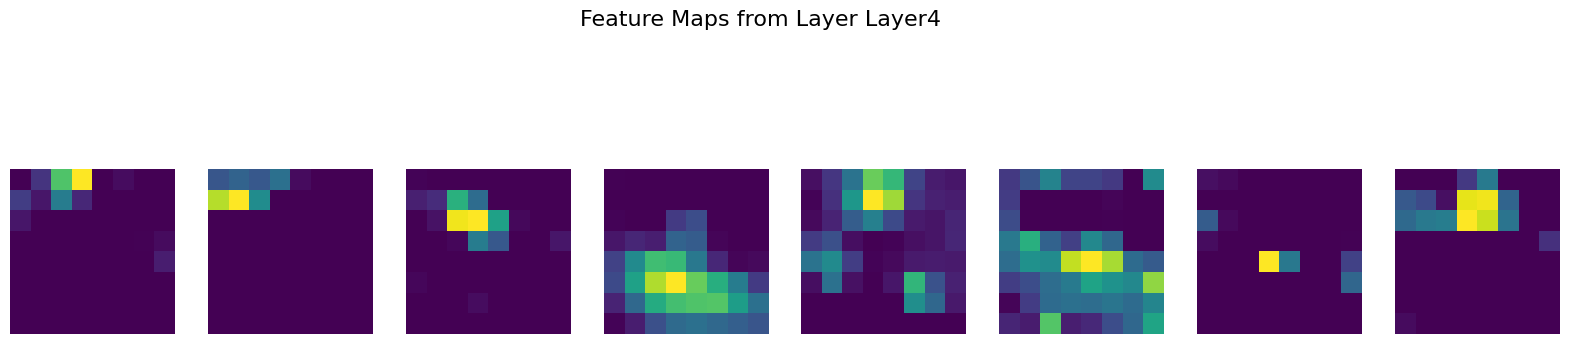

Early stopping at epoch 63

Tiempo total de entrenamiento: 3368.25 segundos


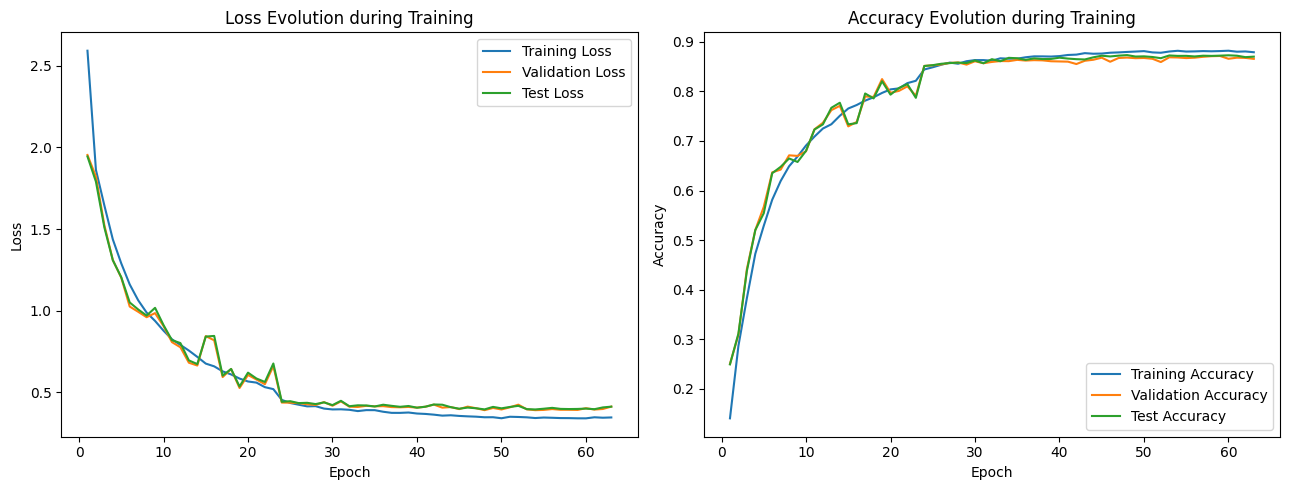

In [ ]:

# Transformaciones para entrenamiento y validación
train_transform = torchvision.transforms.Compose([
    torchvision.transforms.RandomCrop(32, padding=4),  # Recorte aleatorio después del padding
    torchvision.transforms.RandomHorizontalFlip(),      # Volteo horizontal aleatorio
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
])

val_test_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
])

# Cargar datasets CIFAR-10 con transformaciones
train_cifar10 = torchvision.datasets.CIFAR10(
    root="./cifar10",
    train=True,
    download=True,
    transform=train_transform  # Se aplica data augmentation aquí
)

test_cifar10 = torchvision.datasets.CIFAR10(
    root="./cifar10",
    train=False,
    download=True,
    transform=val_test_transform  # Solo normalización para testing
)

# Dividir dataset de entrenamiento y validación
train_cifar10, _ = torch.utils.data.random_split(train_cifar10, [45000, 5000], generator=torch.Generator().manual_seed(42))
_, val_cifar10 = torch.utils.data.random_split(
    torchvision.datasets.CIFAR10(root="./cifar10", train=True, transform=val_test_transform),
    [45000, 5000], generator=torch.Generator().manual_seed(42)
)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

"""# ResNet con Profundidad Estocástica"""

__all__ = ['resnet110']


def _weights_init(m):
    """
        Initialization of CNN weights
    """
    classname = m.__class__.__name__
    if isinstance(m, nn.Linear) or isinstance(m, nn.Conv2d):
        init.kaiming_normal_(m.weight)

class LambdaLayer(nn.Module):
    """
      Identity mapping between ResNet blocks with different size feature map
    """
    def __init__(self, lambd):
        super(LambdaLayer, self).__init__()
        self.lambd = lambd

    def forward(self, x):
        return self.lambd(x)


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1, survival_prob=1.0, option='A'):
        super(BasicBlock, self).__init__()
        self.survival_prob = survival_prob  # Probabilidad de supervivencia

        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)

        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        # Conexión de atajo
        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != planes:
            if option == 'A':
                """
                For CIFAR10 experiment, ResNet paper uses option A.
                """
                self.shortcut = LambdaLayer(lambda x:
                                            F.pad(x[:, :, ::2, ::2],
                                                  (0, 0, 0, 0, planes // 4, planes // 4),
                                                  "constant", 0))
            elif option == 'B':
                self.shortcut = nn.Sequential(
                    nn.Conv2d(in_planes, planes * self.expansion, kernel_size=1, stride=stride, bias=False),
                    nn.BatchNorm2d(planes * self.expansion)
                )

    def forward(self, x):
        if self.training and torch.rand(1).item() > self.survival_prob:
            # Si el bloque es "saltado", usa solo la conexión de atajo
            return self.shortcut(x)
        else:
            # Si el bloque no es saltado, aplica la función residual
            out = self.relu(self.bn1(self.conv1(x)))
            out = self.bn2(self.conv2(out))
            if not self.training:
                out = out * self.survival_prob  # Escala la rama residual
            out += self.shortcut(x)
            out = self.relu(out)
            return out



class ResNet110_SD(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10, survival_prob=0.5):
        super(ResNet110_SD, self).__init__()
        self.in_planes = 16
        self.survival_prob = survival_prob
        self.num_blocks = sum(num_blocks)  # Número total de bloques
        self.current_block = 0  # Contador de bloques para calcular survival_prob

        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)

        # Capas residuales con decaimiento lineal de probabilidad
        self.layer1 = self._make_layer(block, 16, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 32, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 64, num_blocks[2], stride=2)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.linear = nn.Linear(64 * block.expansion, num_classes)

        self.apply(_weights_init)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for s in strides:
            # Calcula survival_prob lineal para cada bloque
            block_survival_prob = 1 - (self.current_block / self.num_blocks) * (1 - self.survival_prob)
            self.current_block += 1
            layers.append(block(self.in_planes, planes, s, survival_prob=block_survival_prob))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        # Convolución inicial
        out = self.relu(self.bn1(self.conv1(x)))
        feature_maps['ReLUconv1'] = out
        out = self.layer1(out)
        out = self.layer2(out)
        feature_maps['Layer2'] = out
        out = self.layer3(out)
        feature_maps['Layer4'] = out
        out = self.avgpool(out)
        out = torch.flatten(out, 1)
        # Capa completamente conectada
        out = self.linear(out)
        return out

def resnet110_SD(survival_prob=0.5):
    return ResNet110_SD(BasicBlock, [18, 18, 18], survival_prob=survival_prob)

# Instancia del modelo para verificar
model = resnet110_SD(survival_prob=0.5)
print(model)



# Función para mostrar los gradientes (opcional)
def show_gradients_ResNet_110(model):
    layers_to_show = ['layer1.0.conv1', 'layer1.0.bn1', 'layer2.8.conv1', 'layer2.8.bn1', 'linear']  # Capas inicial, intermedia y final
    for name, param in model.named_parameters():
        if any(layer in name for layer in layers_to_show) and param.requires_grad and param.grad is not None:
            grad = param.grad.cpu().numpy()
            print(f"Gradientes para {name}: min={grad.min()}, max={grad.max()}, mean={grad.mean()}, std={grad.std()}")
            plt.figure(figsize=(8, 6))
            plt.hist(grad.flatten(), bins=50)
            plt.title(f'Gradientes para {name}')
            plt.xlabel('Valor del gradiente')
            plt.ylabel('Frecuencia')
            plt.show()

def show_curves(curves):
    fig, ax = plt.subplots(1, 2, figsize=(13, 5))
    fig.set_facecolor('white')

    epochs = np.arange(len(curves["val_loss"])) + 1

    # Pérdida
    ax[0].plot(epochs, np.array(curves['train_loss']), label='Training Loss')
    ax[0].plot(epochs, np.array(curves['val_loss']), label='Validation Loss')
    ax[0].plot(epochs, np.array(curves['test_loss']), label='Test Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].set_title('Loss Evolution during Training')
    ax[0].legend()

    # Precisión
    ax[1].plot(epochs, np.array(curves['train_acc']), label='Training Accuracy')
    ax[1].plot(epochs, np.array(curves['val_acc']), label='Validation Accuracy')
    ax[1].plot(epochs, np.array(curves['test_acc']), label='Test Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_title('Accuracy Evolution during Training')
    ax[1].legend()

    plt.tight_layout()
    plt.savefig('training_curves.png')
    plt.show()

# Visualizar mapas de características (opcional)
def show_feature_maps(feature_maps):
    for layer_name, feature_map in feature_maps.items():
        fmap = feature_map[0].cpu().numpy()  # Convert to CPU and NumPy for visualization
        num_feature_maps = fmap.shape[0]

        # Plot a grid of feature maps (first 8 feature maps)
        fig, axes = plt.subplots(1, min(8, num_feature_maps), figsize=(20, 5))
        fig.suptitle(f"Feature Maps from Layer {layer_name}", fontsize=16)

        for i in range(min(8, num_feature_maps)):
            axes[i].imshow(fmap[i], cmap='viridis')
            axes[i].axis('off')

        plt.show()

# Training step function
def train_step(x_batch, y_batch, model, optimizer, criterion, device):
    x_batch, y_batch = x_batch.to(device), y_batch.to(device)
    y_predicted = model(x_batch)
    loss = criterion(y_predicted, y_batch)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    return y_predicted, loss

# Funciones para guardar y cargar checkpoints (opcional)
def checkpoint_save(model, optimizer, epoch, filename):
    checkpoint_data = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
    }
    torch.save(checkpoint_data, os.path.join(checkpoint_dir, filename))
    print(f"Checkpoint guardado en {os.path.join(checkpoint_dir, filename)}")

def checkpoint_resume(model, optimizer, filename):
    checkpoint_path = os.path.join(checkpoint_dir, filename)
    if os.path.isfile(checkpoint_path):
        checkpoint_data = torch.load(checkpoint_path)
        model.load_state_dict(checkpoint_data['model_state_dict'])
        optimizer.load_state_dict(checkpoint_data['optimizer_state_dict'])
        epoch = checkpoint_data['epoch']
        print(f"Checkpoint cargado desde '{checkpoint_path}' (época {epoch})")
        return epoch
    else:
        print(f"No se encontró ningún checkpoint en '{checkpoint_path}'")
        return None

# Evaluation function
def evaluate(val_loader, model, criterion, device):
    model.eval()
    cumulative_loss = 0
    cumulative_corrects = 0
    data_count = 0
    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            final_output = model(imgs)
            loss = criterion(final_output, labels)
            cumulative_loss += loss.item() * len(labels)
            data_count += len(labels)
            _, pred_class = final_output.max(1)
            cumulative_corrects += (pred_class == labels).sum().item()
    val_acc = cumulative_corrects / data_count
    val_loss = cumulative_loss / data_count
    return val_acc, val_loss


# Función de entrenamiento
def train_model(
    model,
    train_dataset,
    val_dataset,
    epochs,
    max_iterations,
    criterion,
    batch_size,
    lr,
    weight_decay,
    n_evaluations_per_epoch,
    early_stop_thresh,
    show_gradients,
    patience,
    use_gpu=True,
    data_augmentation=False,
    resume_checkpoint=None
):
    original_transform = torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
    ])

    if data_augmentation:
        train_dataset.dataset.transform = torchvision.transforms.Compose([
            torchvision.transforms.RandomCrop(32, padding=4),
            torchvision.transforms.RandomHorizontalFlip(),
            torchvision.transforms.ToTensor(),
            torchvision.transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
        ])
    else:
        train_dataset.dataset.transform = original_transform

    print(f"Using train transform: {train_dataset.dataset.transform}")
    print(f"Using validation transform: {val_dataset.dataset.transform}")

    # Usar GPU si está disponible
    device = torch.device('cuda' if use_gpu else 'cpu')
    model = model.to(device)

    # DataLoaders
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=use_gpu)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=4, pin_memory=use_gpu)
    test_loader = torch.utils.data.DataLoader(test_cifar10, batch_size=128, shuffle=False, num_workers=4, pin_memory=use_gpu)

    optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=weight_decay)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=patience, threshold=0.0001, threshold_mode='abs')
    scaler = torch.amp.GradScaler()
    # Inicializar curvas incluyendo las del conjunto de prueba
    curves = {"train_acc": [], "val_acc": [], "test_acc": [],
              "train_loss": [], "val_loss": [], "test_loss": [],
              "epoch_times": []}
    t0 = time.perf_counter()
    iteration = 0
    n_batches = len(train_loader)
    start_epoch = 0
    if resume_checkpoint is not None:
        start_epoch = checkpoint_resume(model, optimizer, resume_checkpoint)
        print(f"Reanudando desde la época {start_epoch}")

    best_val_loss = float('inf')
    best_epoch = -1
    early_stop_counter = 0

    for epoch in range(start_epoch, epochs):
        print(optimizer.param_groups[0]["lr"])
        print(f"\rEpoch {epoch + 1}/{epochs}")
        cumulative_train_loss = 0
        cumulative_train_corrects = 0
        train_loss_count = 0
        train_acc_count = 0

        # Inicio de medición de tiempo por época
        epoch_start_time = time.perf_counter()

        model.train()
        for i, (x_batch, y_batch) in enumerate(train_loader):
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            y_predicted, loss = train_step(x_batch, y_batch, model, optimizer, criterion, device)

            cumulative_train_loss += loss.item()
            train_loss_count += 1
            train_acc_count += y_batch.shape[0]

            # Cálculo de precisión
            class_prediction = torch.argmax(y_predicted, axis=1).long()
            cumulative_train_corrects += (y_batch == class_prediction).sum().item()

            # Registro de métricas
            if (i + 1) % (n_batches // n_evaluations_per_epoch) == 0:
                train_loss = cumulative_train_loss / train_loss_count
                train_acc = cumulative_train_corrects / train_acc_count

                print(
                    f"Iteración {iteration + 1} - Lote {i + 1}/{n_batches} - "
                    f"Pérdida de Entrenamiento: {train_loss:.4f}, Precisión de Entrenamiento: {train_acc:.4f}"
                )

            iteration += 1
            if iteration >= max_iterations:
                print(f"Número máximo de iteraciones alcanzado: {max_iterations}")
                break

        # Fin de medición de tiempo por época
        epoch_end_time = time.perf_counter()
        epoch_duration = epoch_end_time - epoch_start_time
        curves["epoch_times"].append(epoch_duration)

        print(f"Tiempo de la época {epoch + 1}: {epoch_duration:.2f} segundos")

        # Evaluación en el conjunto de validación
        val_acc, val_loss = evaluate(val_loader, model, criterion, device)
        print(f"Val loss: {val_loss:.4f}, Val acc: {val_acc:.4f}")

        # **Evaluación en el conjunto de prueba**
        test_acc, test_loss = evaluate(test_loader, model, criterion, device)
        print(f"Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

        train_loss = cumulative_train_loss / train_loss_count
        train_acc = cumulative_train_corrects / train_acc_count

        curves["train_acc"].append(train_acc)
        curves["val_acc"].append(val_acc)
        curves["test_acc"].append(test_acc)
        curves["train_loss"].append(train_loss)
        curves["val_loss"].append(val_loss)
        curves["test_loss"].append(test_loss)
        scheduler.step(val_loss)

        # Checkpointing del mejor modelo basado en la pérdida de validación
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_epoch = epoch
            early_stop_counter = 0
            checkpoint_filename = f"best_checkpoint_epoch_{epoch + 1}.pth"
            checkpoint_save(model, optimizer, epoch, checkpoint_filename)
            print(f"Checkpoint del mejor modelo guardado en la época {epoch + 1}")
        else:
            early_stop_counter += 1

        if epoch + 1 == 1 or (epoch + 1) % 5 == 0 or early_stop_counter >= early_stop_thresh:
            show_gradients(model)
            show_feature_maps(feature_maps)

        if early_stop_counter >= early_stop_thresh:
            print(f"Early stopping at epoch {epoch + 1}")
            break

        if iteration >= max_iterations:
            break

    total_training_time = sum(curves["epoch_times"])
    print(f"\nTiempo total de entrenamiento: {total_training_time:.2f} segundos")

    # Asegurarse de que el modelo esté en CPU después del entrenamiento
    model.cpu()

    if data_augmentation:
        train_dataset.dataset.transform = original_transform

    return curves

# Configuraciones
use_gpu = torch.cuda.is_available()

# Directorio para guardar checkpoints (opcional)
checkpoint_dir = "/content/drive/MyDrive/CheckpointsResNet110_SD"
os.makedirs(checkpoint_dir, exist_ok=True)
feature_maps = {}
if __name__ == "__main__":
    # Hiperparámetros
    batch_size = 128
    epochs = 70
    max_iterations = 600000  # Ajusta según sea necesario
    learning_rate = 0.04
    n_evaluations_per_epoch = 10
    data_augmentation = True
    weight_decay = 1e-4
    early_stop_thresh = 15
    patience = 3
    survival_prob = 0.5  # Probabilidad de supervivencia para la profundidad estocástica

    # Inicializar el modelo con profundidad estocástica
    model = resnet110_SD(survival_prob=0.5)

    # Definir función de pérdida
    criterion = nn.CrossEntropyLoss()

    # Entrenar el modelo
    curves = train_model(
        model=model,
        train_dataset=train_cifar10,
        val_dataset=val_cifar10,
        epochs=epochs,
        max_iterations=max_iterations,
        criterion=criterion,
        batch_size=batch_size,
        lr=learning_rate,
        n_evaluations_per_epoch=n_evaluations_per_epoch,
        early_stop_thresh=early_stop_thresh,
        show_gradients=show_gradients_ResNet_110,
        patience=patience,
        use_gpu=use_gpu,
        data_augmentation=data_augmentation,
        resume_checkpoint=None,  # Establece a una cadena de caracteres para reanudar, por ejemplo, "best_checkpoint_epoch_10.pth"
        weight_decay=weight_decay
    )

    # Plotear curvas de entrenamiento
    show_curves(curves)



In [ ]:
__all__ = ['ResNet', 'resnet110_SD']

def test(net):
    total_params = 0

    for x in filter(lambda p: p.requires_grad, net.parameters()):
        total_params += np.prod(x.data.numpy().shape)
    print("Total number of params", total_params)
    print("Total layers", len(list(filter(lambda p: p.requires_grad and len(p.data.size())>1, net.parameters()))))


if __name__ == "__main__":
    for net_name in __all__:
        if net_name.startswith('resnet'):
            print(net_name)
            test(globals()[net_name]())
            print()

resnet110_SD
Total number of params 1727962
Total layers 110

